In [22]:
import numpy as np
import phase_est
import matplotlib.pyplot as plt
from tqdm import tqdm

#np.random.seed(10)

## Measurement probabilities for phase estimation

In [23]:
def prob_zero(omega, phi, t):
    return (np.cos((omega-phi)*t/2)) **2

def prob_one(omega, phi, t):
    return (np.sin((omega-phi)*t/2)) **2

## SMC phase estimation class

In [24]:
class phase_est_smc:

    def __init__(self, omega_star, t0):
        self.omega_star = omega_star
        self.t = t0

    def init_particles(self, num_particles):
        """
        Initializes the particles for SMC.

        Args:
            num_particles: number of particles in the SMC algorithm
        """
        self.num_particles = num_particles
        self.particle_pos = np.linspace(0, 2*np.pi, self.num_particles)
        self.particle_wgts = np.ones(num_particles) * 1/num_particles # uniform weight initialization

    def update(self, num_measurements=1, threshold=None):
        """
        Runs one time step of the SMC update until the threshold exceeded

        Args:
            num_measurements: number of measurements per update
            threshold: threshold for n_eff. defaults to self.num_particles/10

        Returns:
            array of particle positions and their corresponding weights
        """

        if threshold is None:
            threshold = self.num_particles/10

        n_eff = None # init None so it will be calculated on first iteration of while loop

        counter = 0 
        while n_eff is None or n_eff >= threshold:
            
            # get measurement
            phi_k = np.random.uniform() * 2 * np.pi
            measure_list = []
            for _ in range(num_measurements):
                r = np.random.uniform()
                if r <= prob_zero(self.omega_star, phi_k, self.t):
                    measure_list.append(0)
                else:
                    measure_list.append(1)

            particle_prob = np.ones(shape=self.num_particles)
            for i in range(num_measurements):
                if measure_list[i] == 0:
                    particle_prob = np.multiply(particle_prob, prob_zero(self.particle_pos, phi_k, self.t))
                else:
                    particle_prob = np.multiply(particle_prob, prob_zero(self.particle_pos, phi_k, self.t))

            # bayes update of weights
            self.particle_wgts = np.multiply(self.particle_wgts, particle_prob) # numerator
            norm = np.sum(self.particle_wgts) # denominator
            self.particle_wgts /= norm 
            
            # recalculate n_eff
            n_eff = 1/(np.sum(self.particle_wgts**2))

            counter += 1
            # if counter % 20 == 0:
            #     print("current iteration {:d}, n_eff = {:f} vs threshold {:f}".format(counter, n_eff, threshold))

        return self.particle_pos, self.particle_wgts

    def update_t(self, factor=9/8):
        """
        Updates time by given factor
        """
        self.t = self.t * factor

    def resample(self):
        """
        Simple bootstrap resampler
        """
        self.particle_pos = np.random.choice(self.particle_pos, size = self.num_particles, p=self.particle_wgts)
        self.particle_wgts = np.ones(self.num_particles) * 1/self.num_particles

## Define variables for storing data

In [25]:
num_particles = 1000
num_data = 10000
num_bins = 100

train_data = np.empty((0,num_bins), float)
train_edges = np.empty((0, num_bins+1), float)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

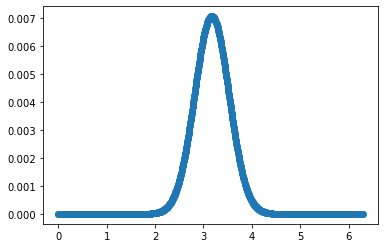

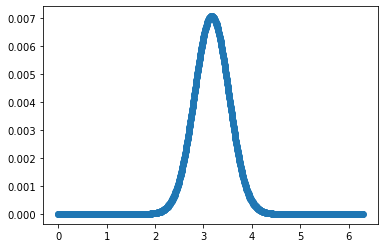

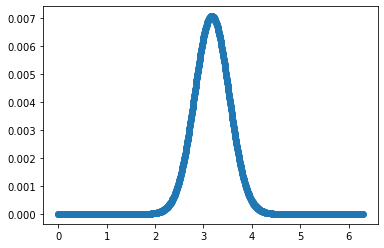

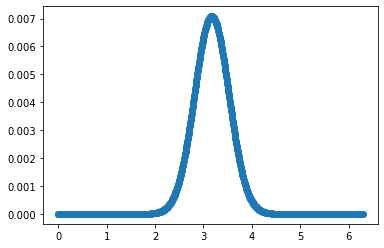

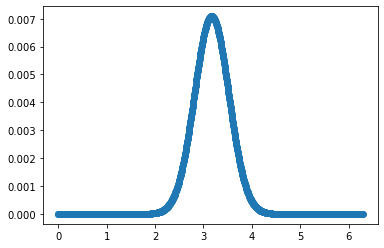

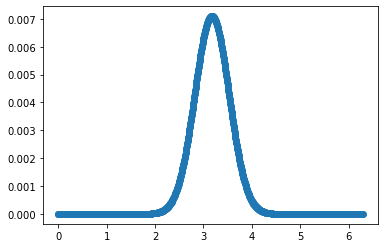

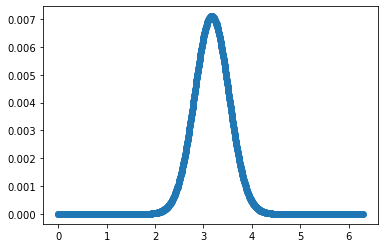

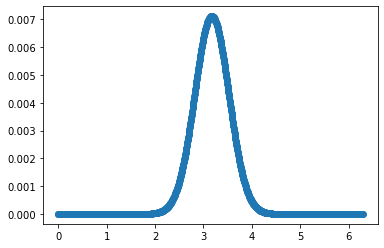

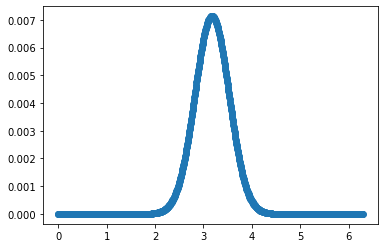

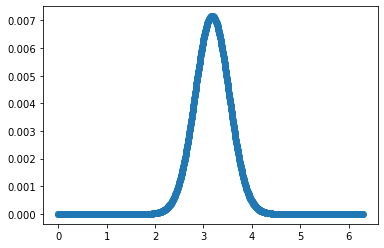

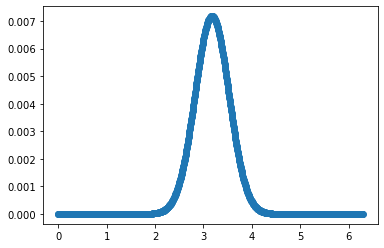

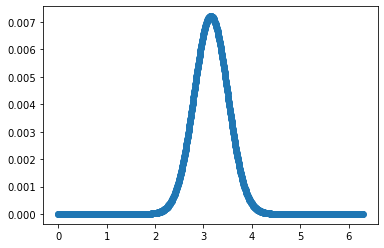

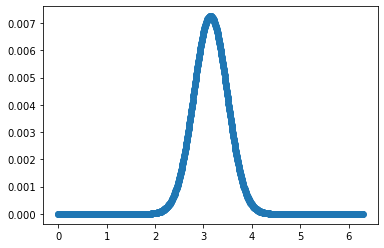

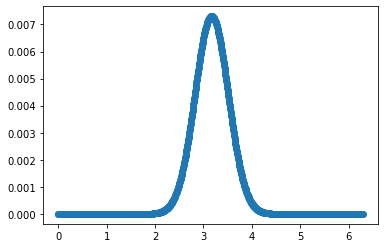

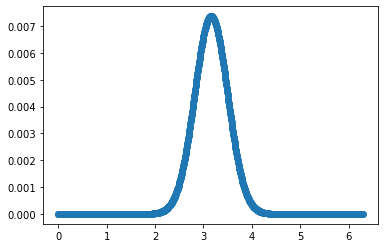

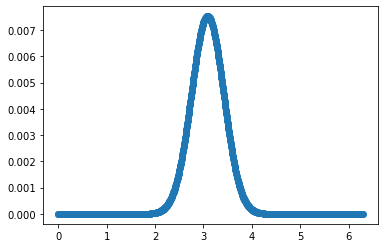

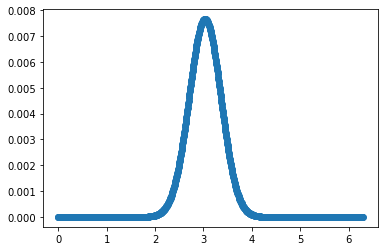

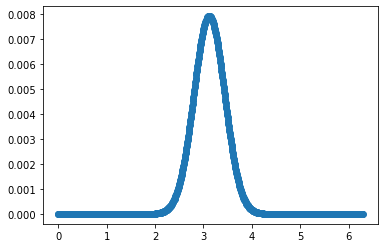

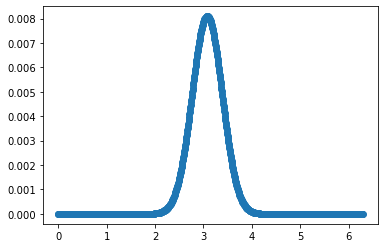

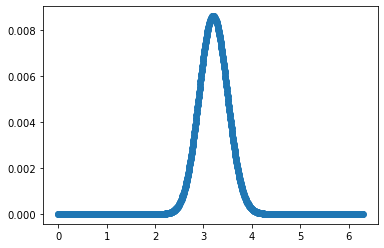

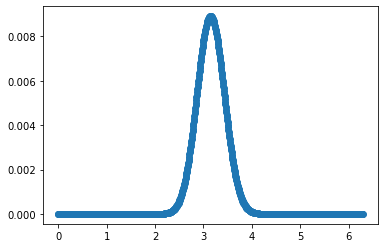

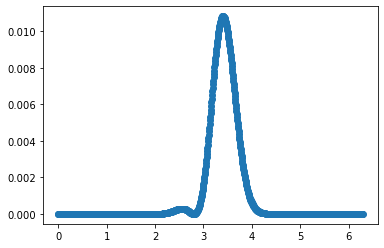

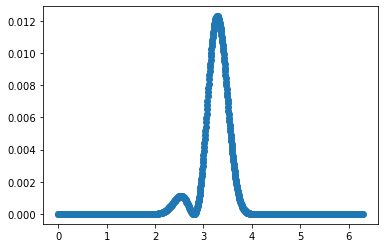

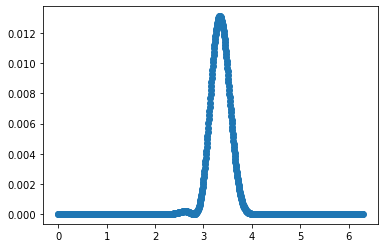

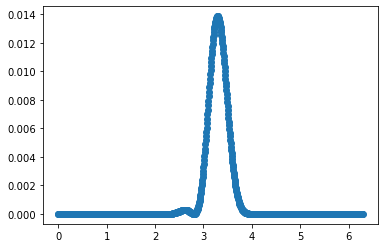

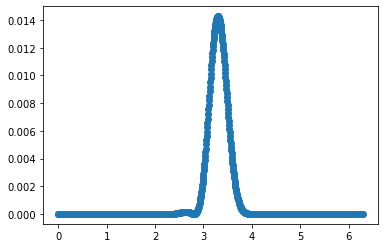

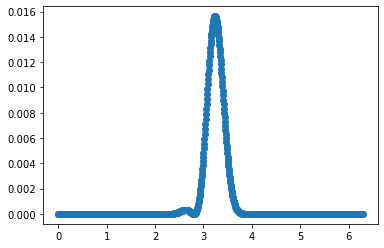

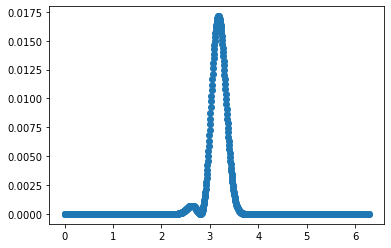

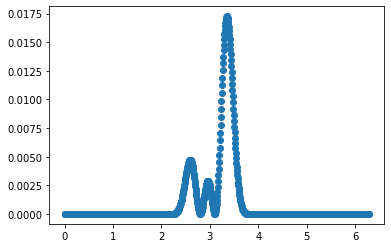

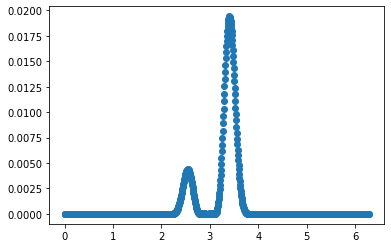

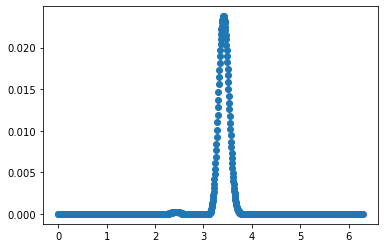

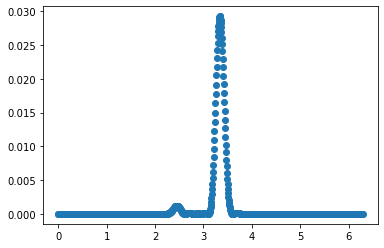

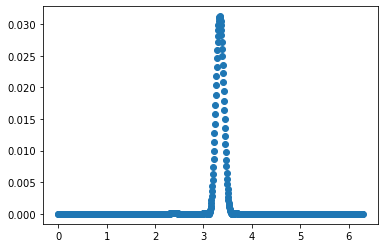

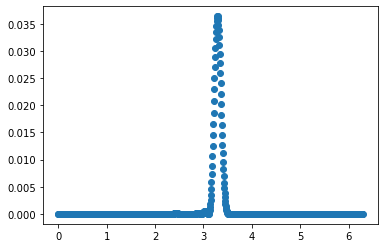

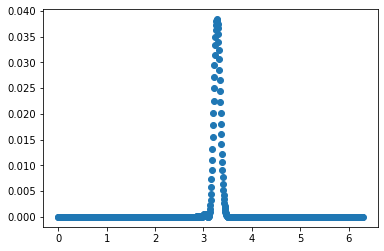

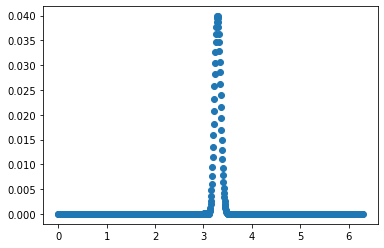

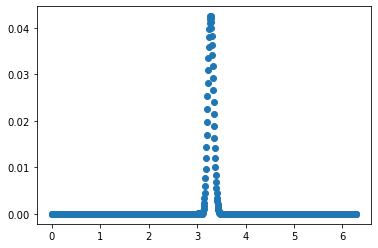

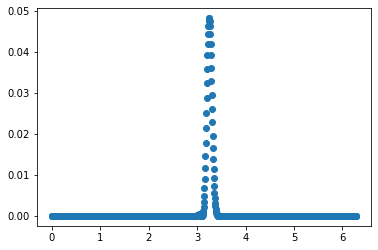

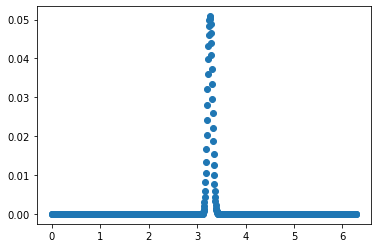

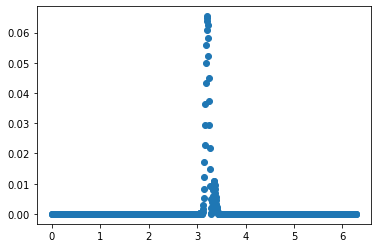

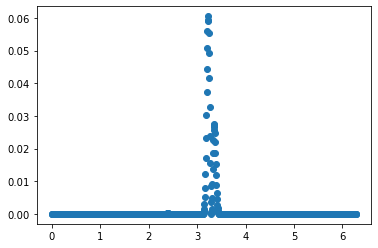

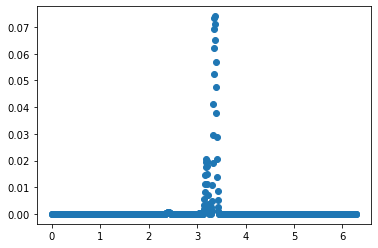

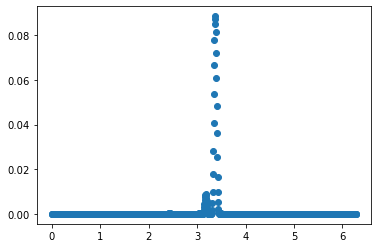

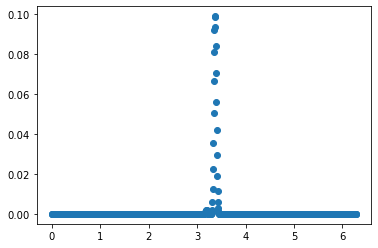

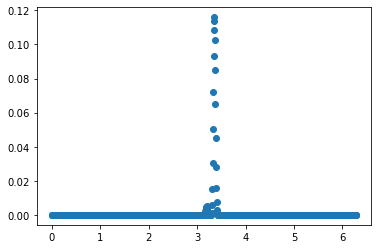

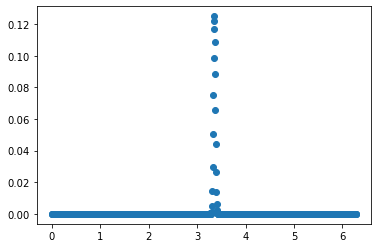

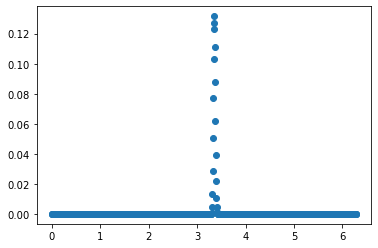

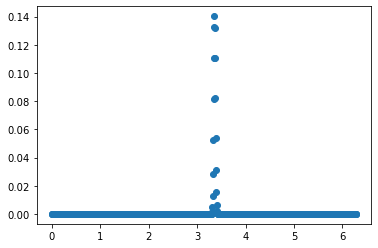

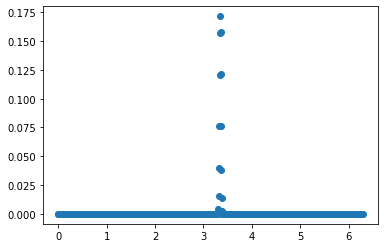

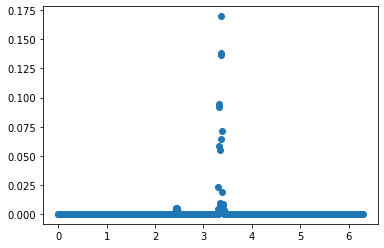

  5%|████▏                                                                              | 1/20 [00:06<01:57,  6.19s/it]

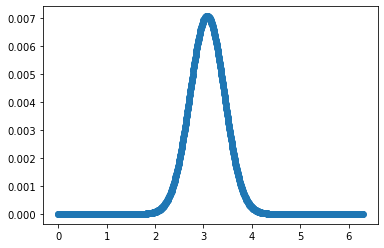

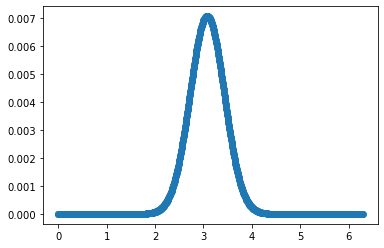

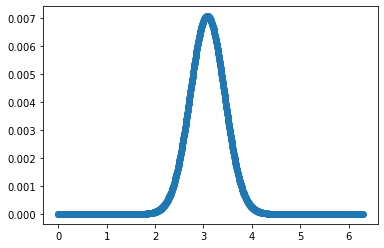

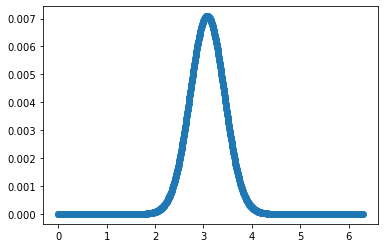

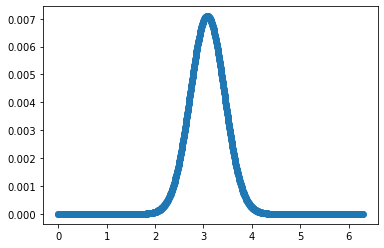

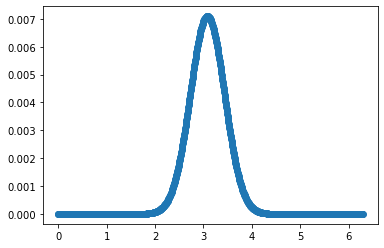

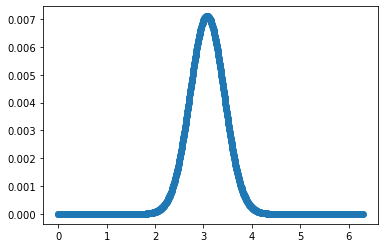

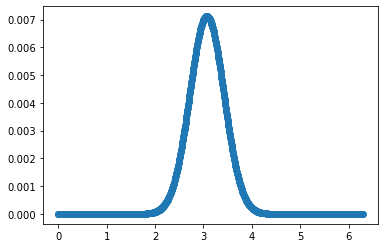

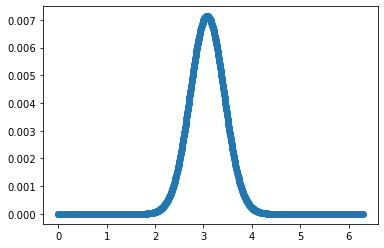

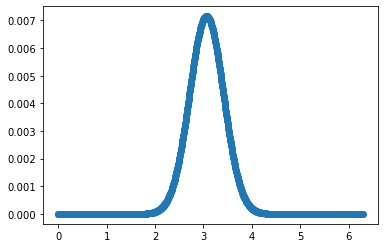

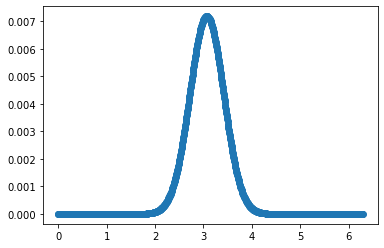

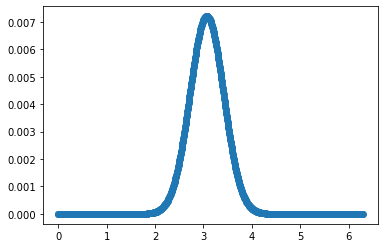

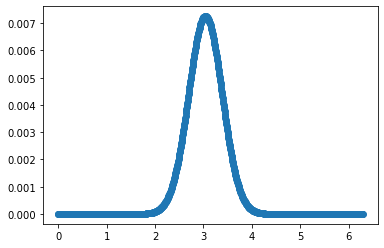

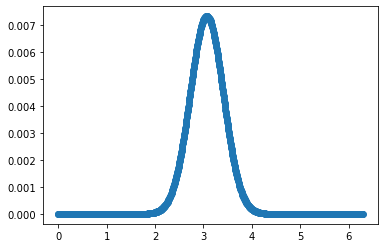

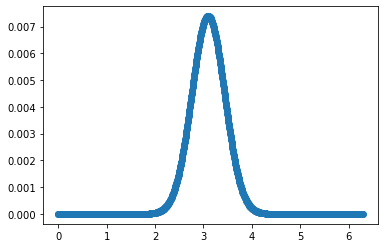

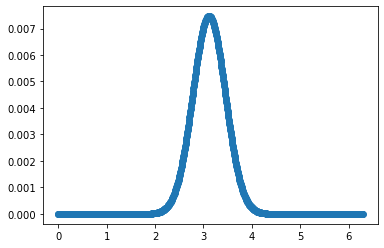

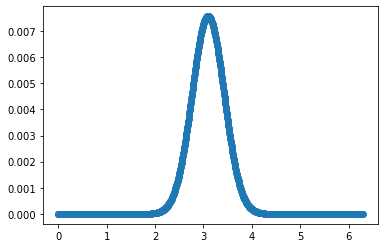

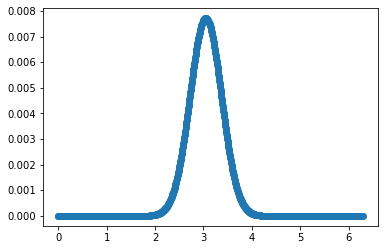

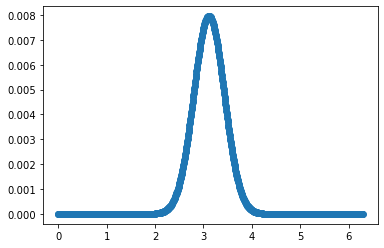

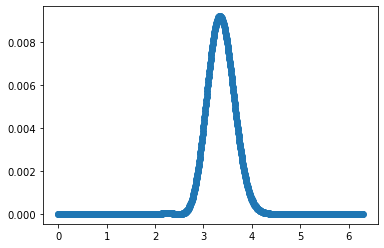

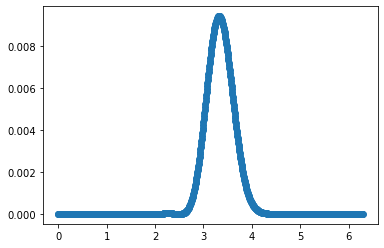

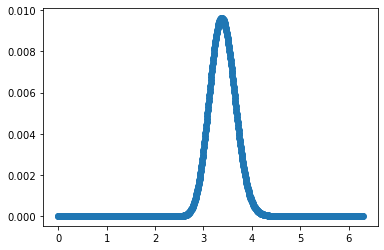

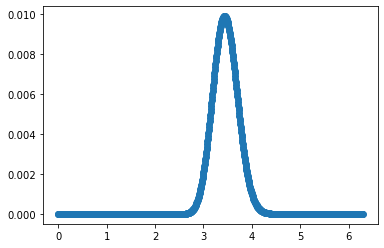

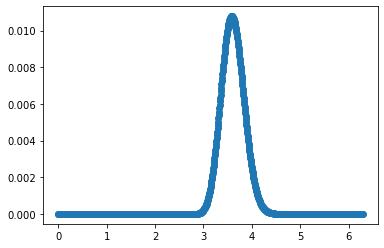

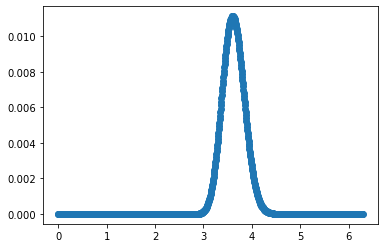

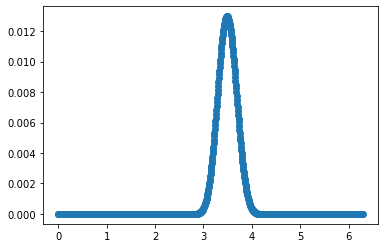

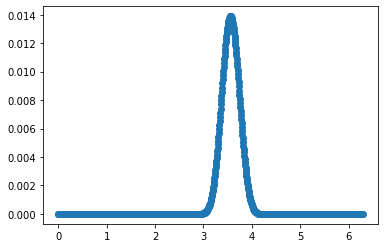

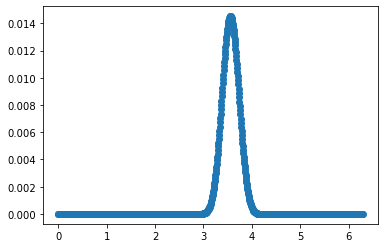

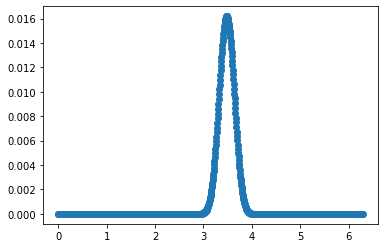

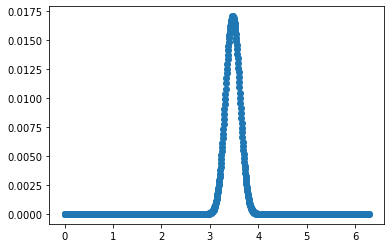

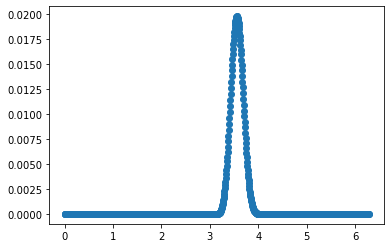

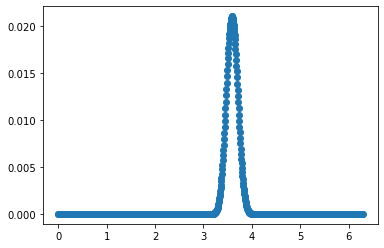

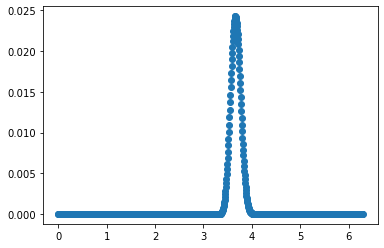

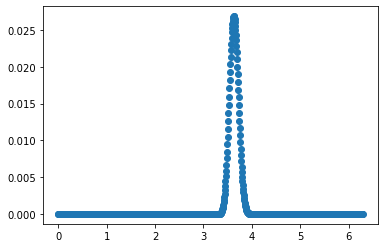

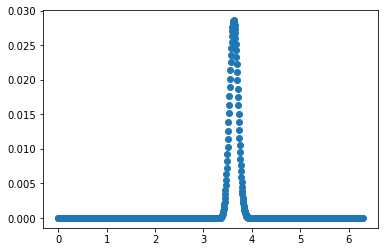

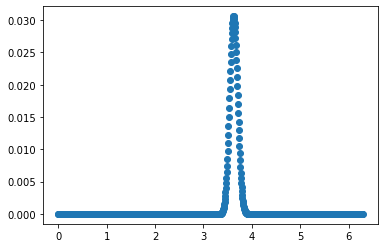

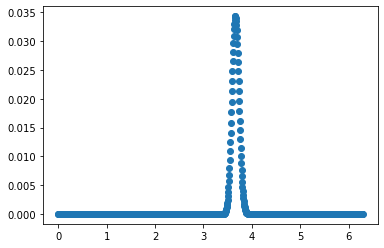

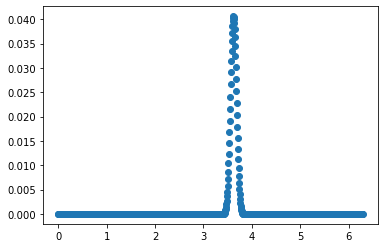

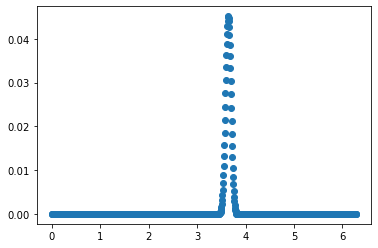

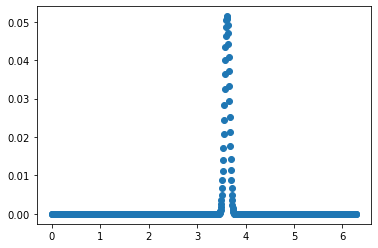

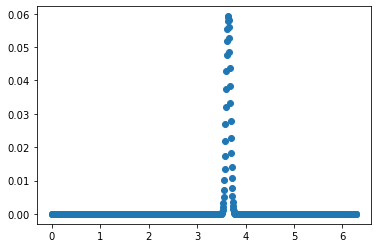

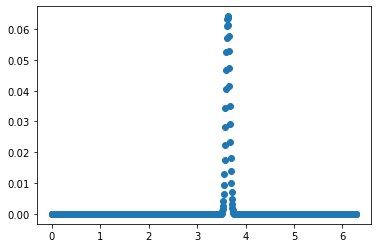

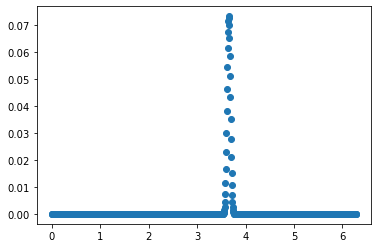

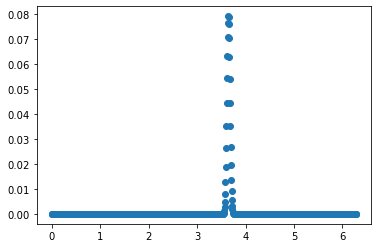

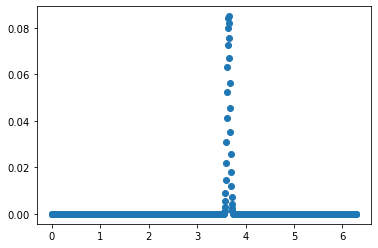

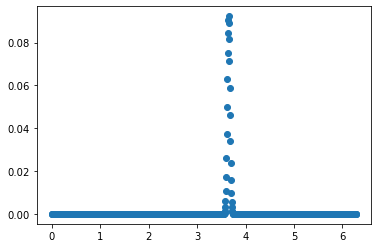

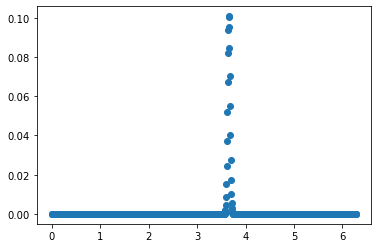

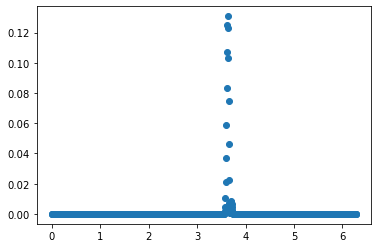

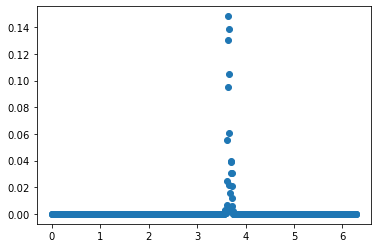

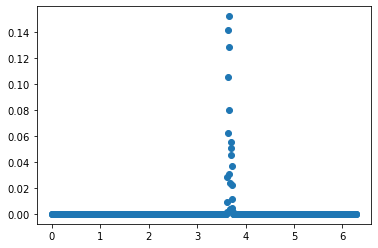

 10%|████████▎                                                                          | 2/20 [00:12<01:52,  6.22s/it]

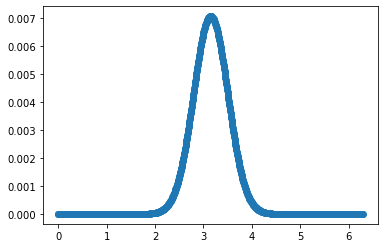

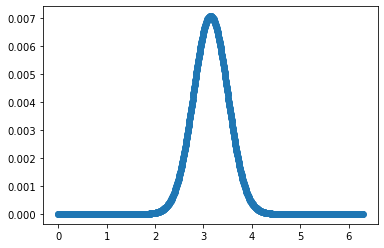

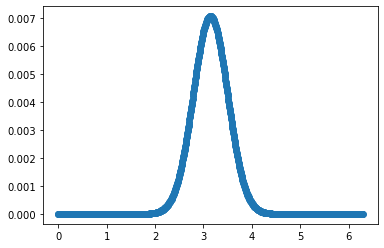

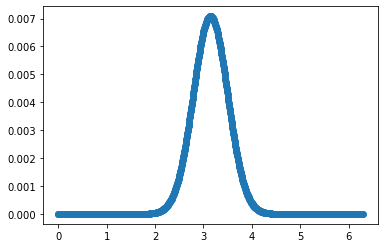

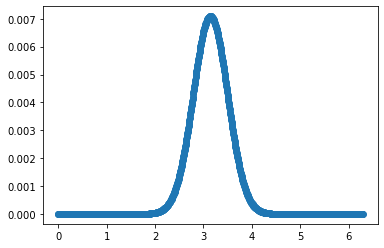

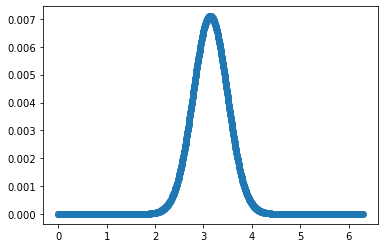

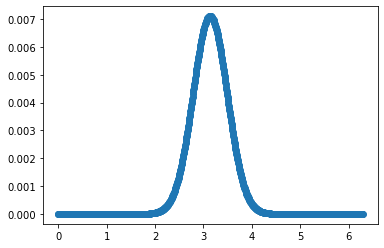

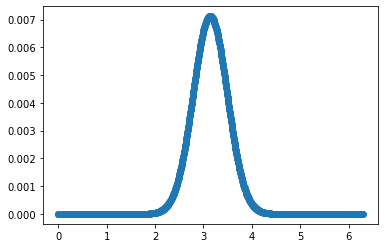

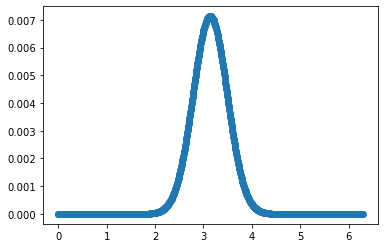

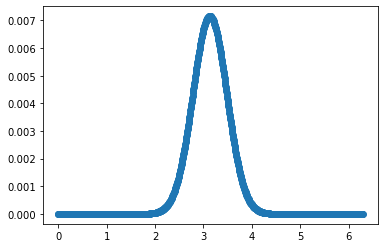

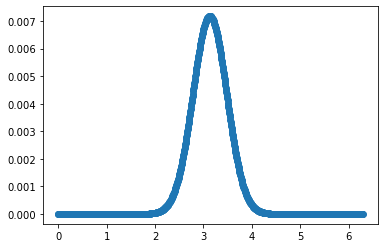

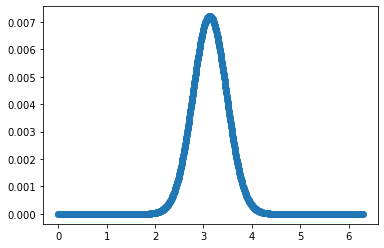

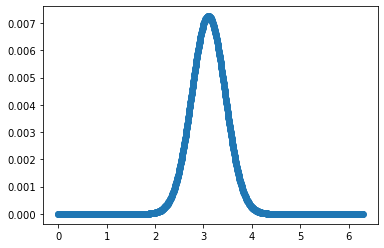

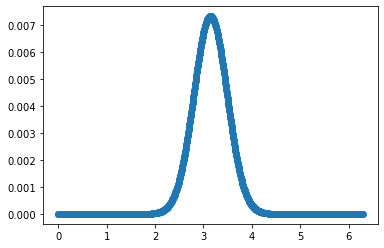

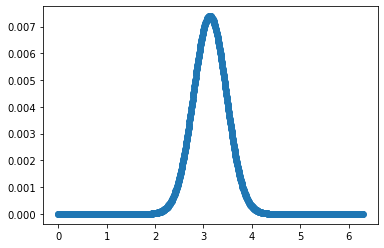

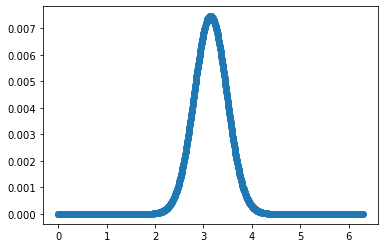

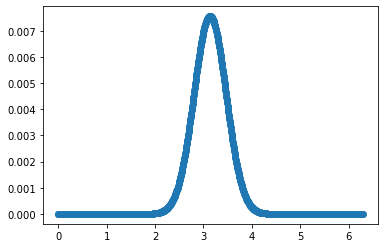

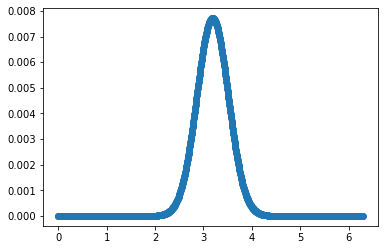

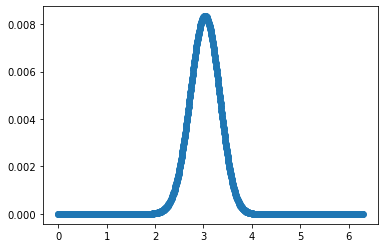

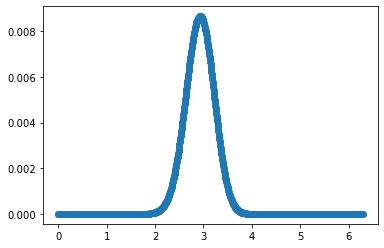

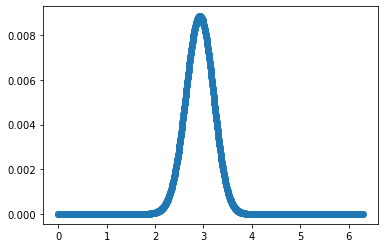

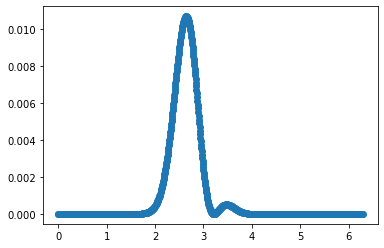

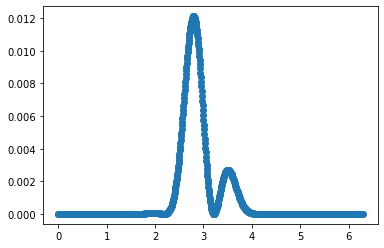

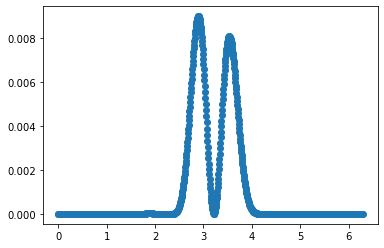

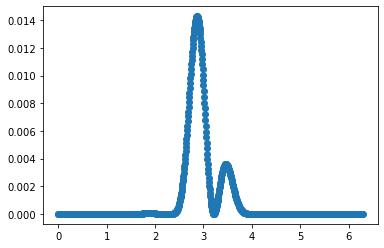

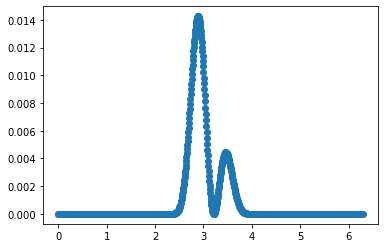

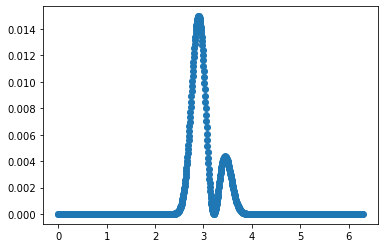

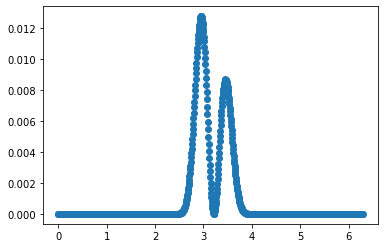

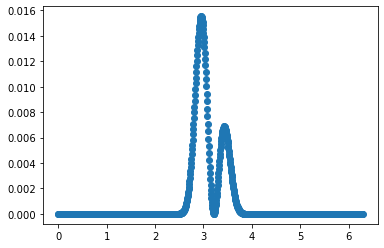

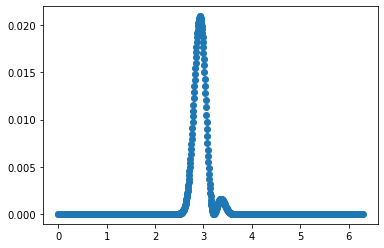

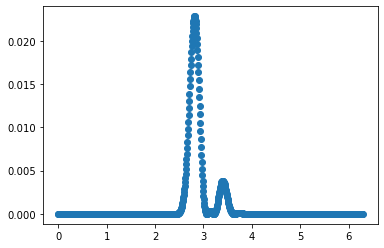

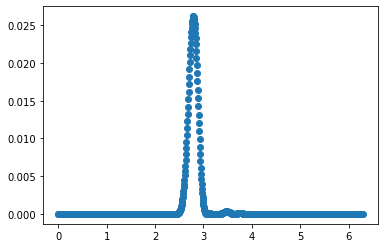

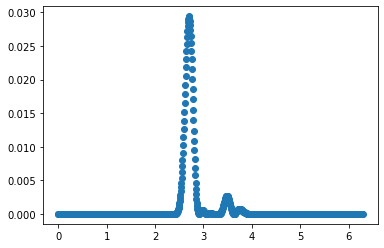

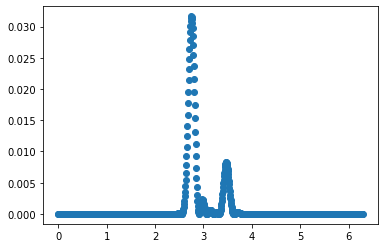

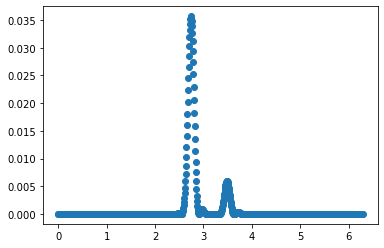

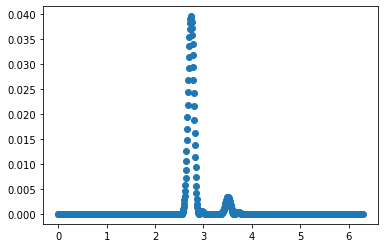

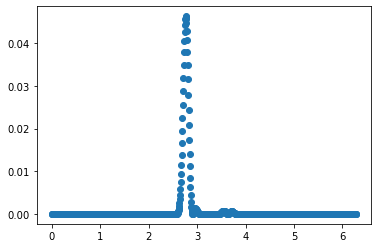

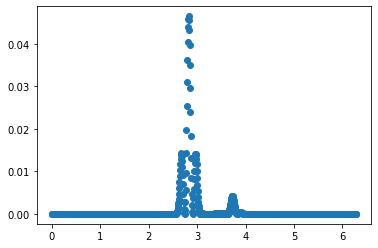

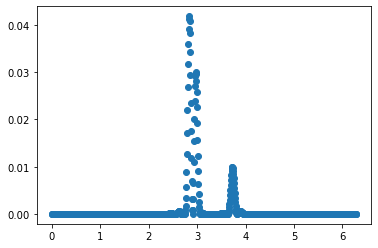

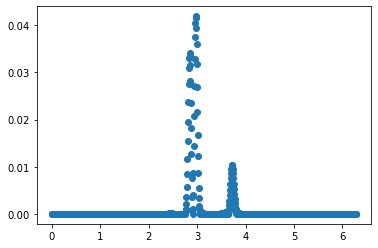

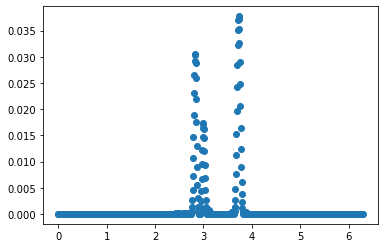

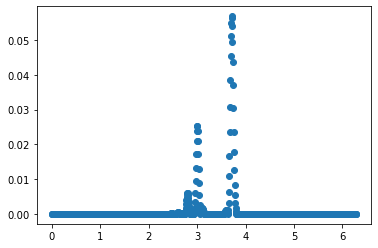

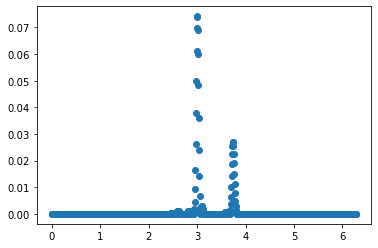

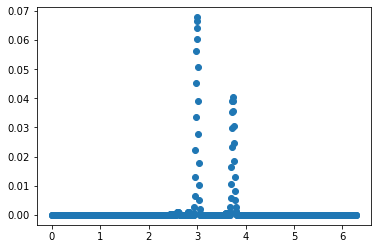

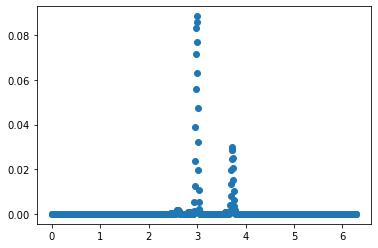

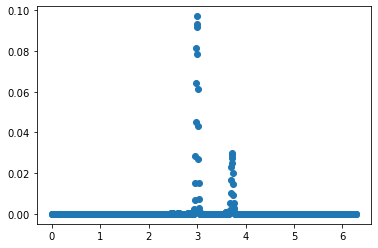

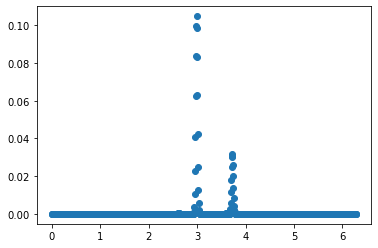

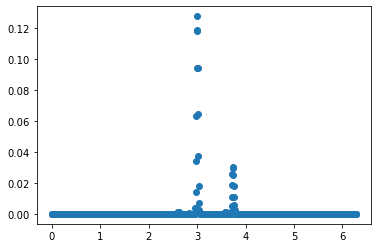

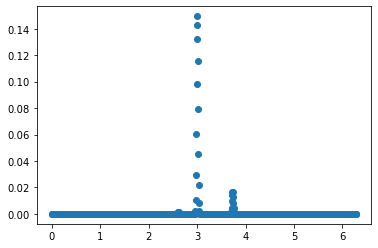

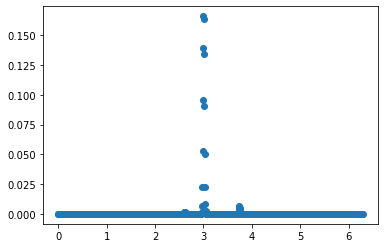

 15%|████████████▍                                                                      | 3/20 [00:18<01:45,  6.21s/it]

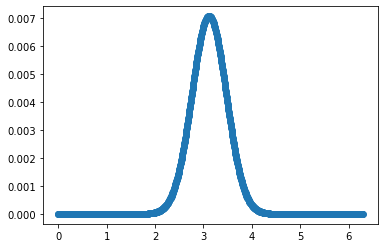

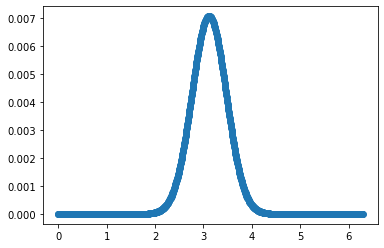

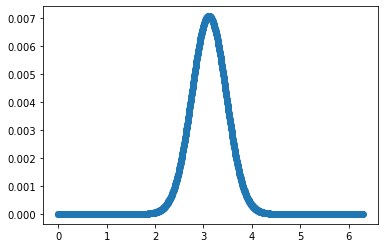

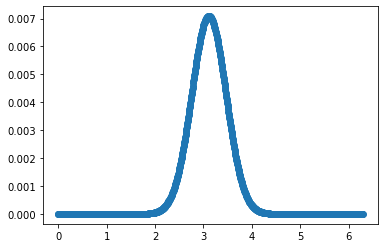

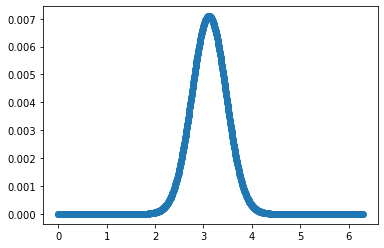

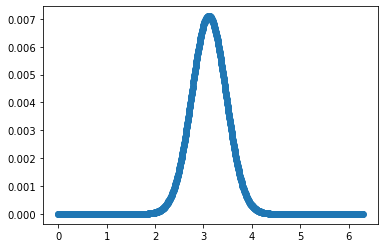

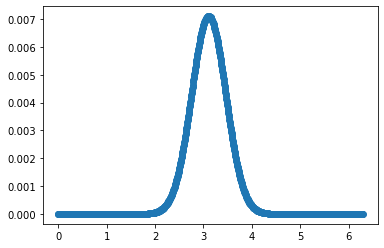

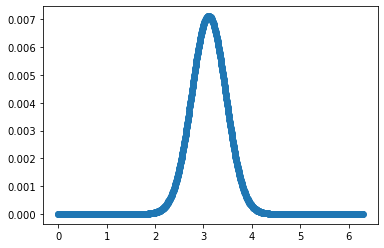

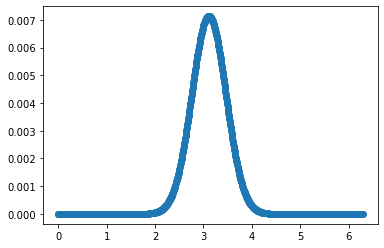

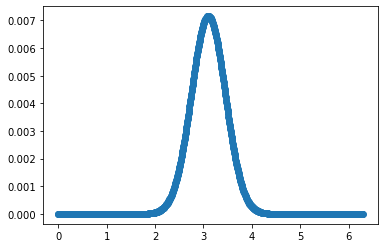

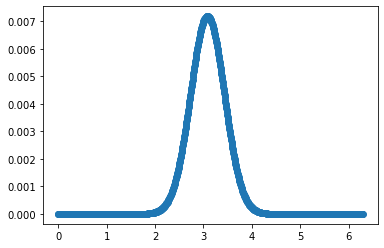

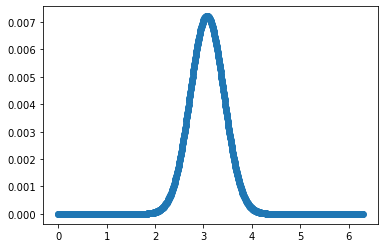

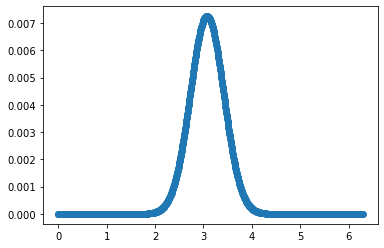

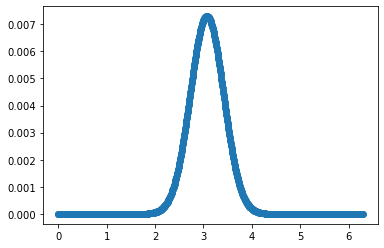

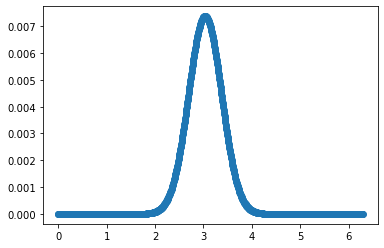

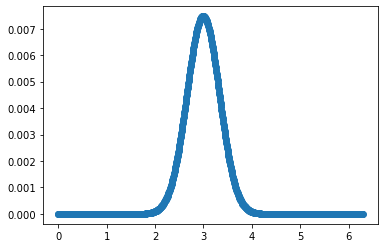

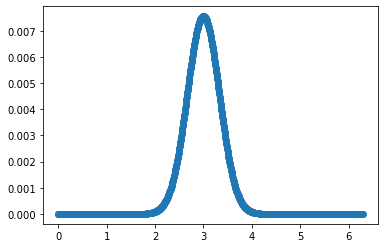

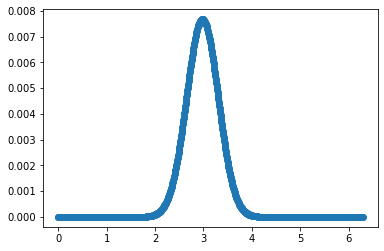

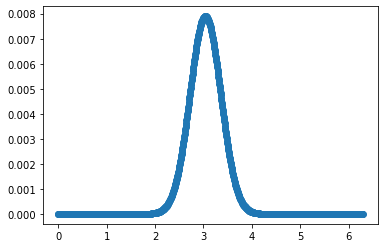

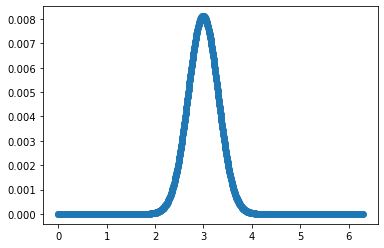

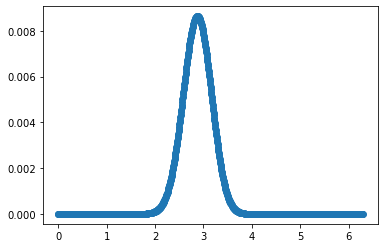

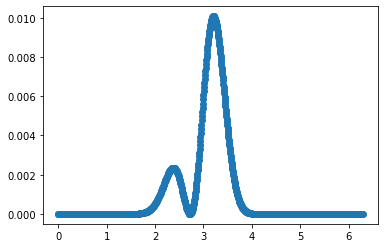

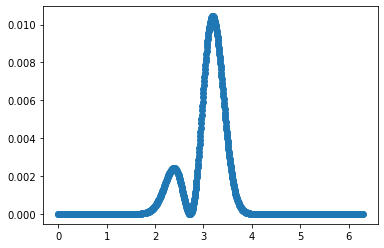

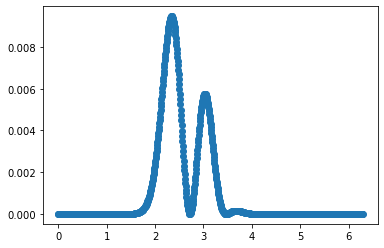

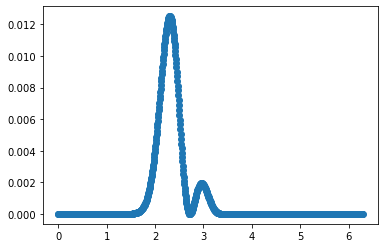

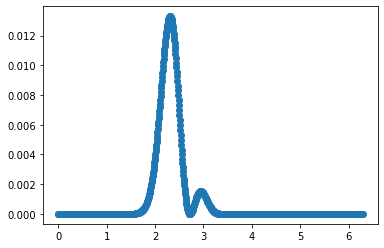

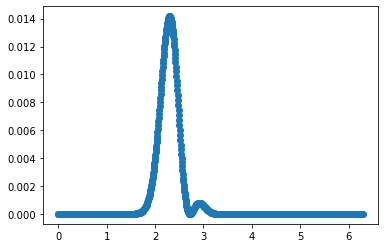

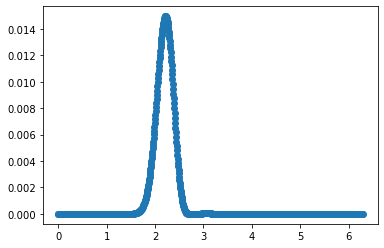

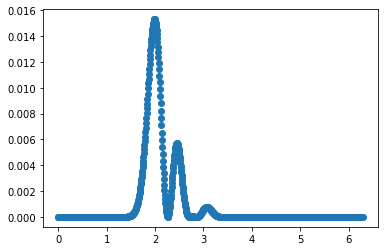

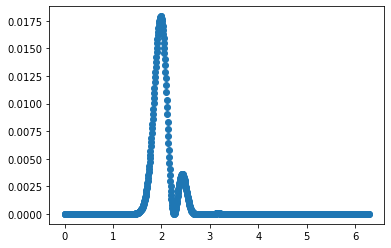

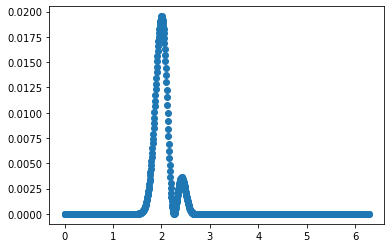

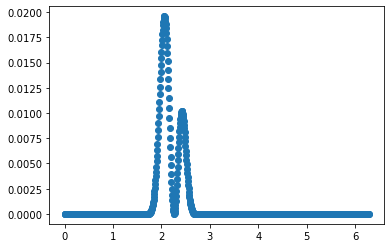

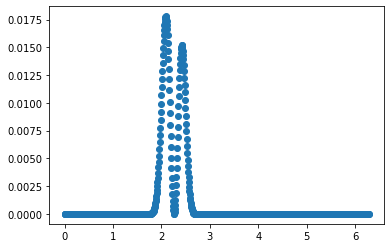

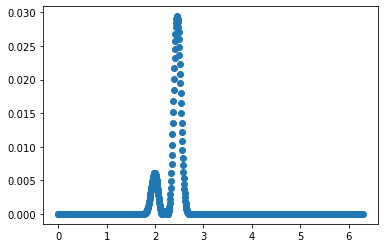

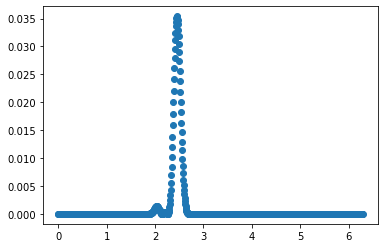

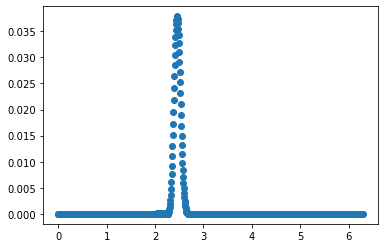

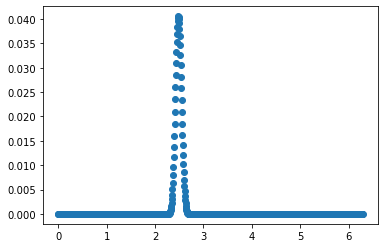

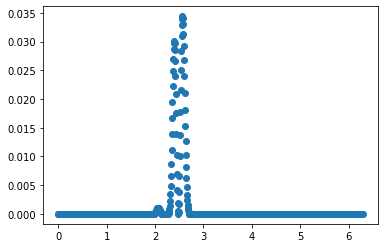

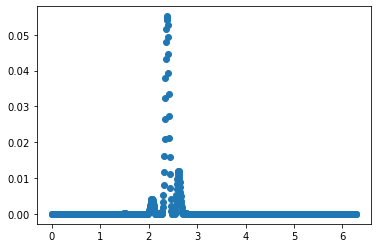

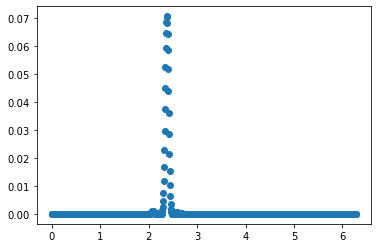

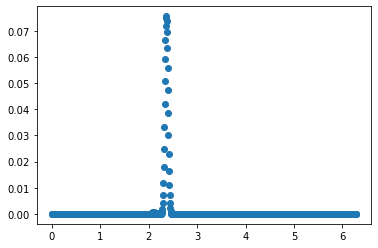

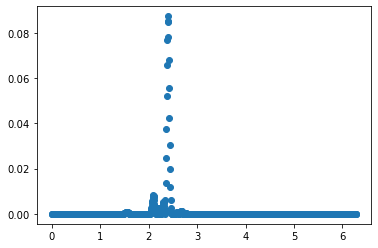

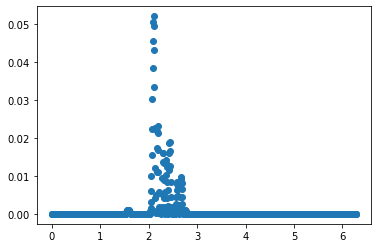

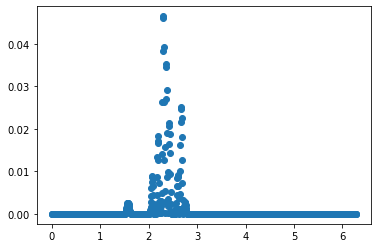

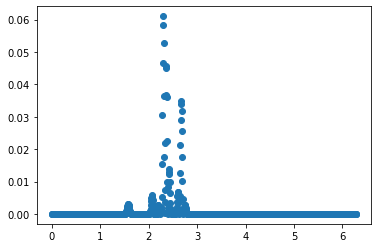

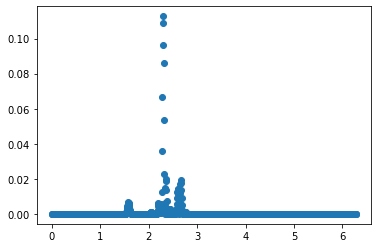

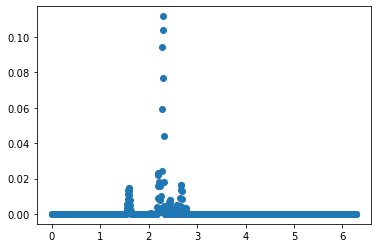

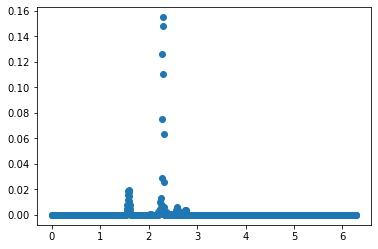

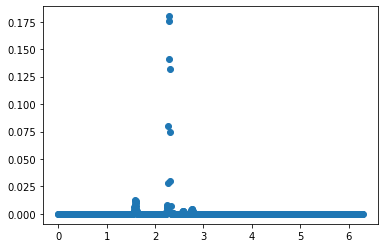

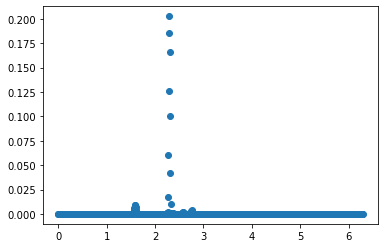

 20%|████████████████▌                                                                  | 4/20 [00:24<01:39,  6.22s/it]

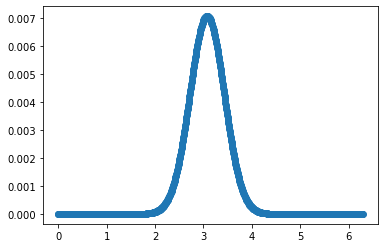

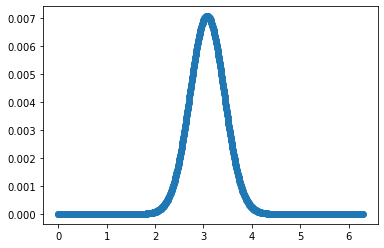

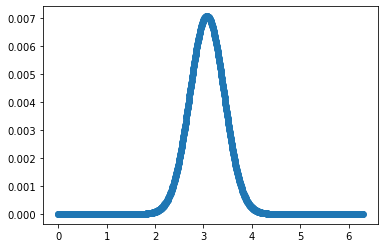

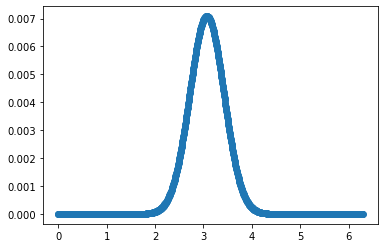

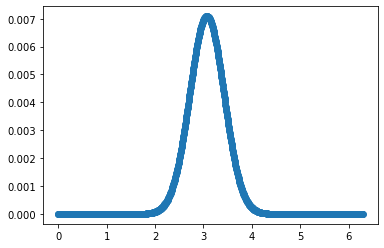

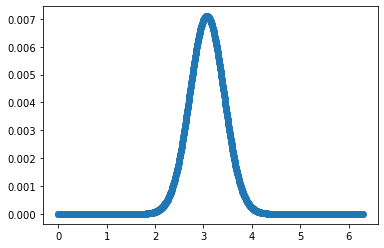

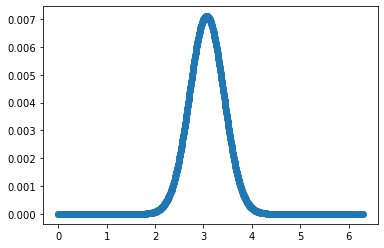

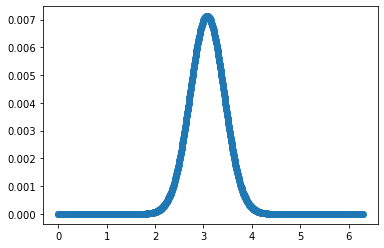

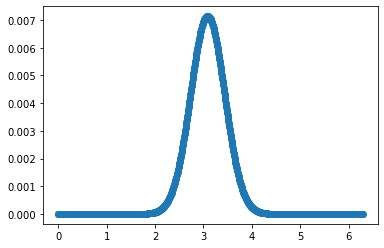

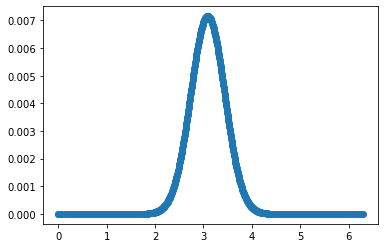

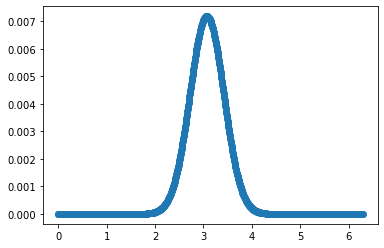

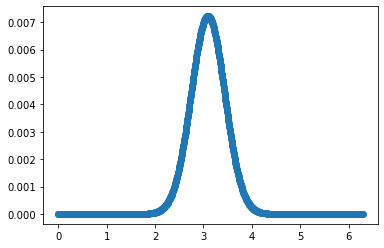

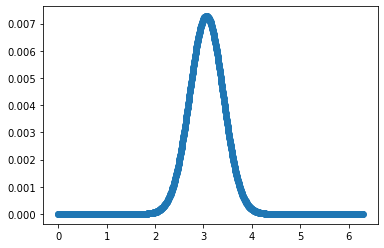

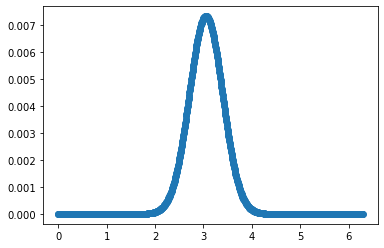

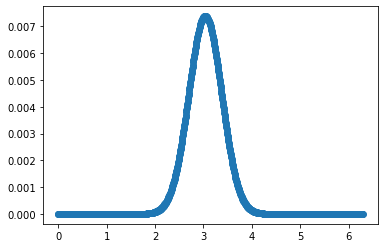

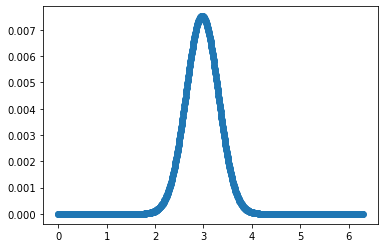

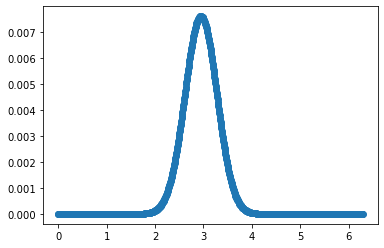

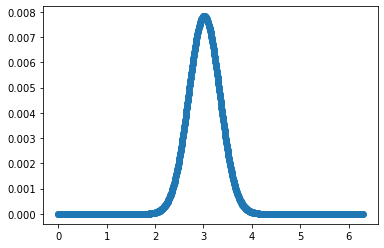

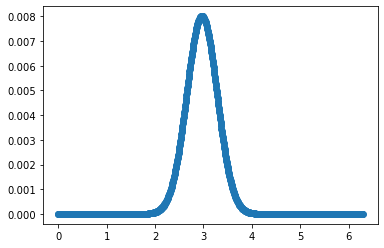

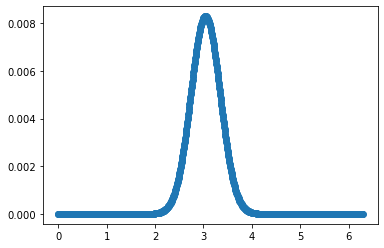

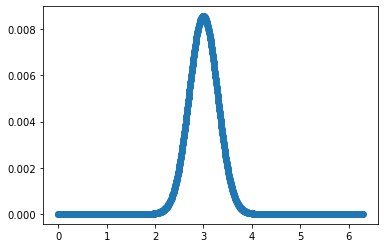

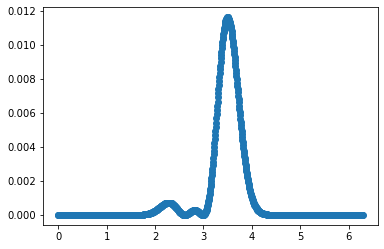

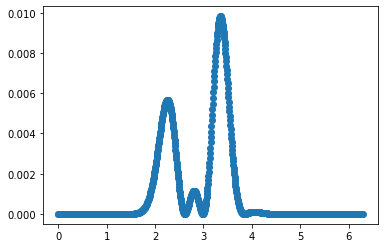

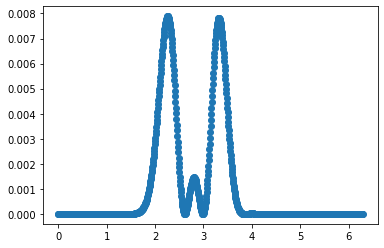

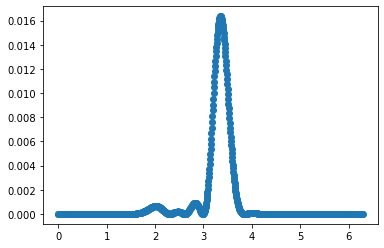

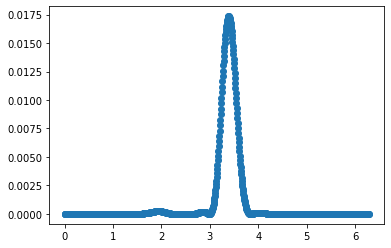

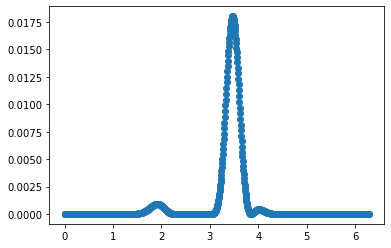

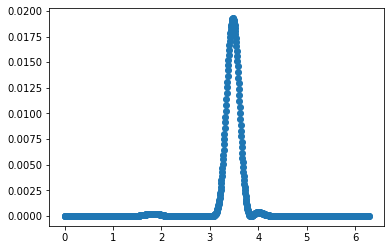

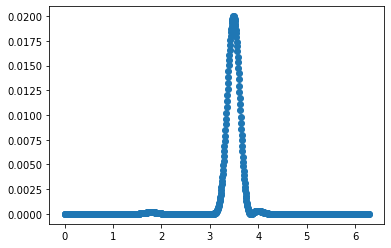

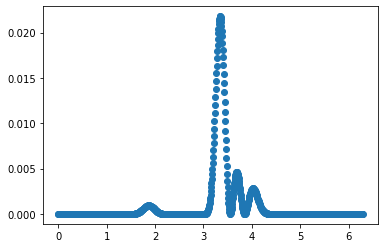

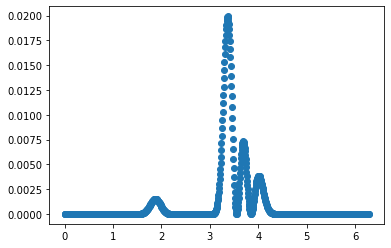

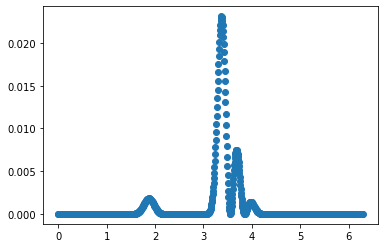

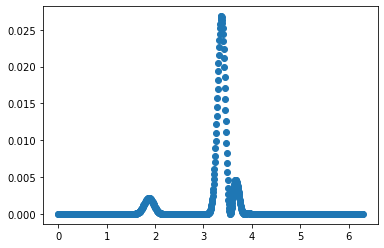

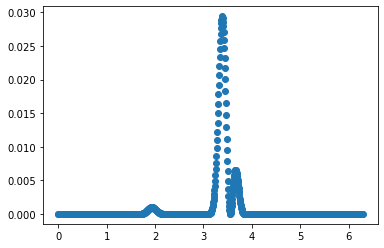

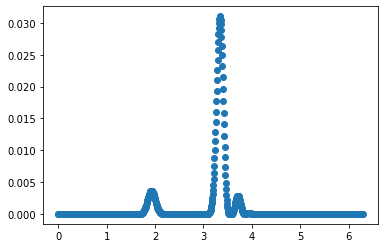

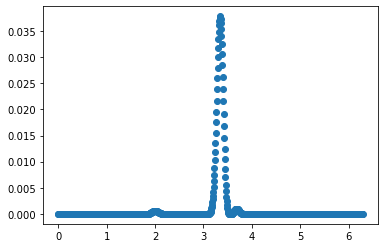

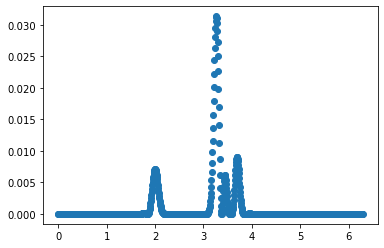

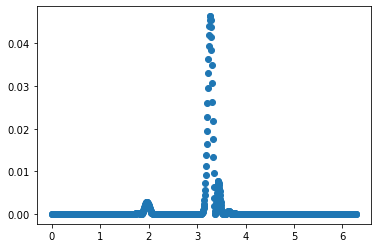

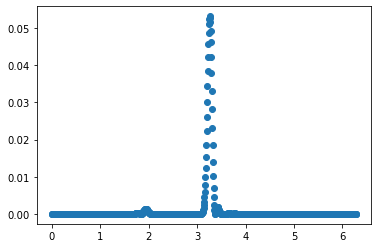

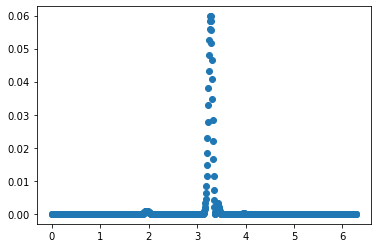

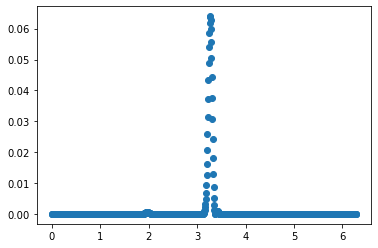

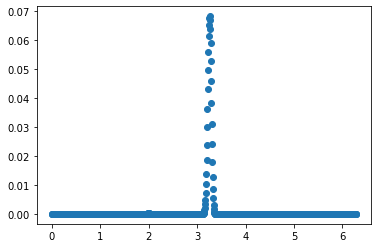

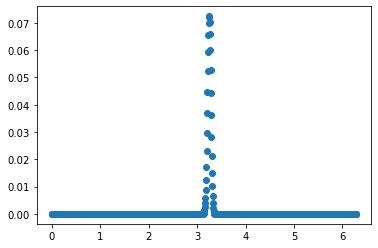

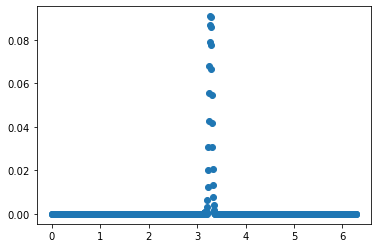

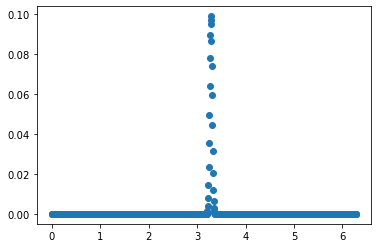

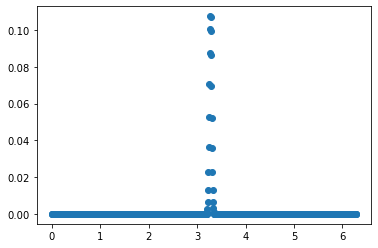

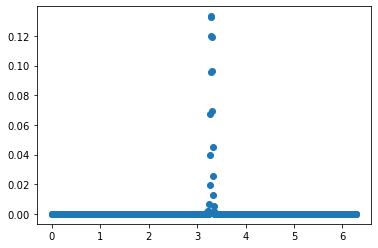

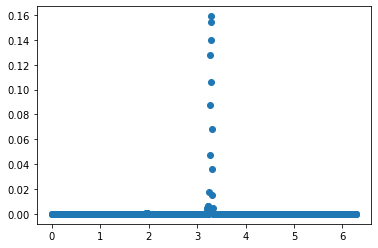

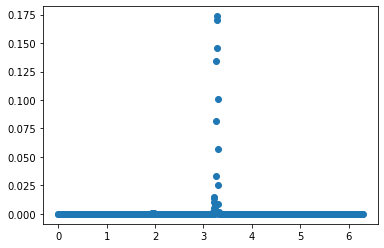

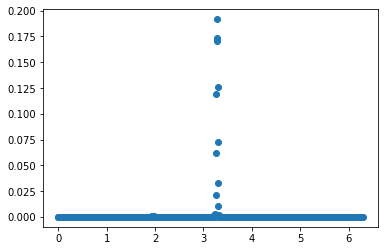

 25%|████████████████████▊                                                              | 5/20 [00:31<01:33,  6.25s/it]

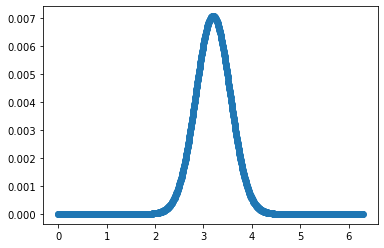

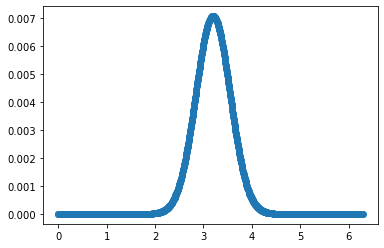

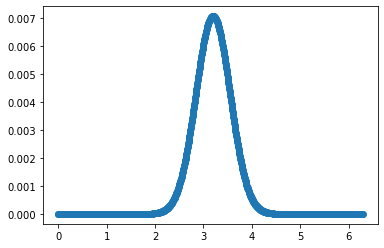

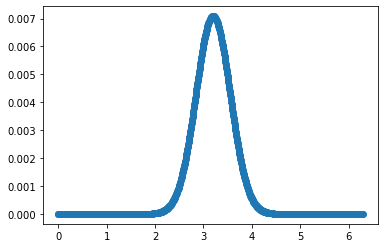

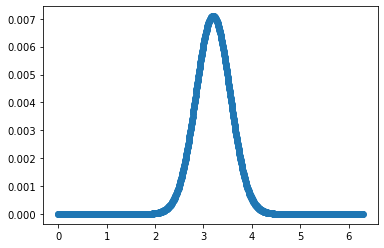

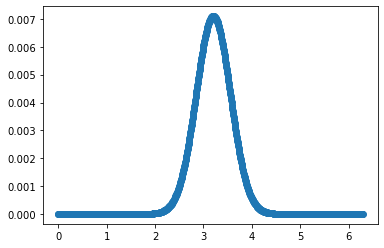

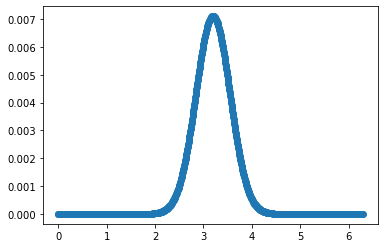

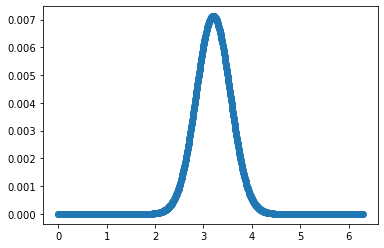

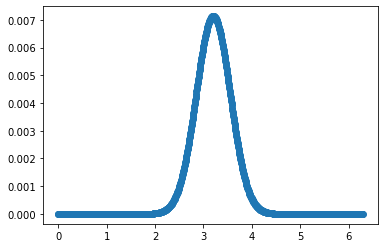

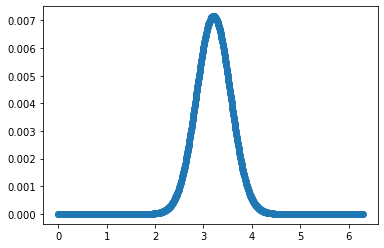

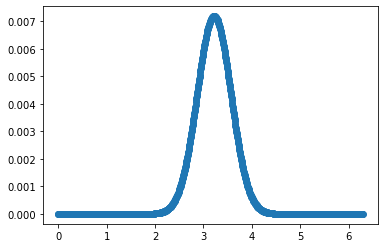

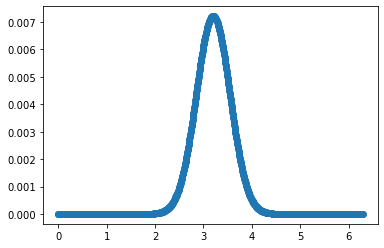

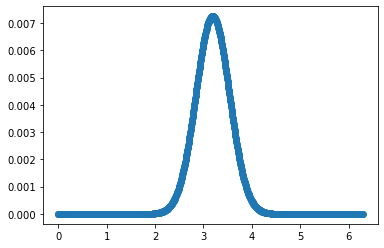

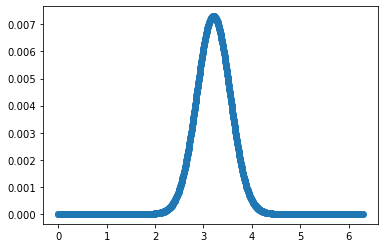

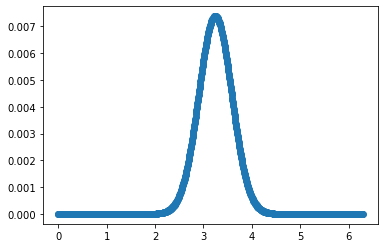

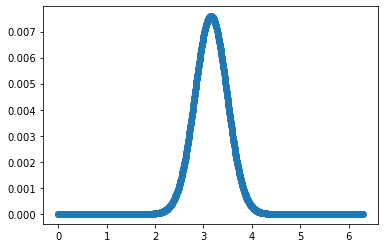

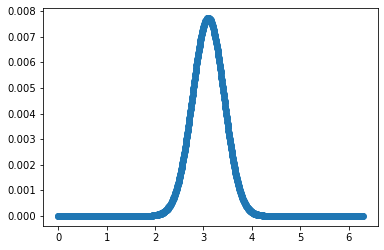

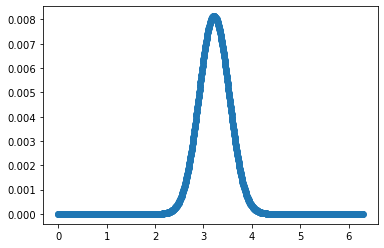

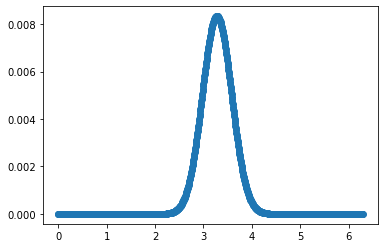

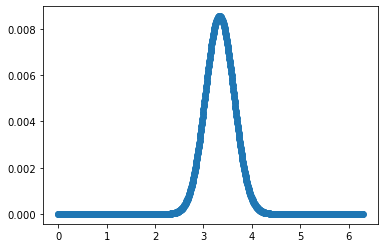

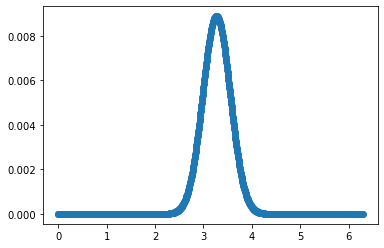

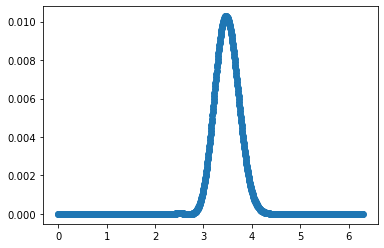

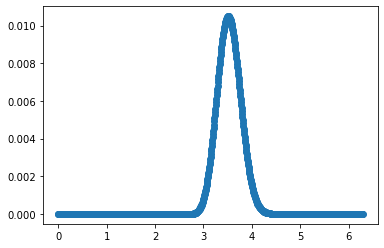

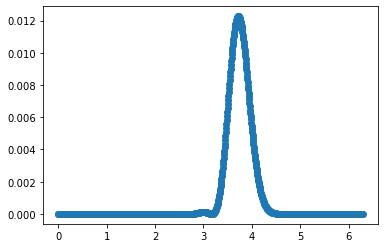

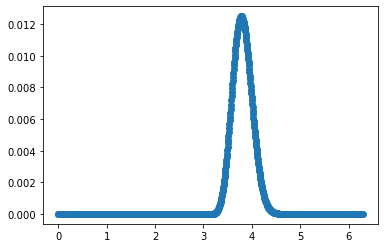

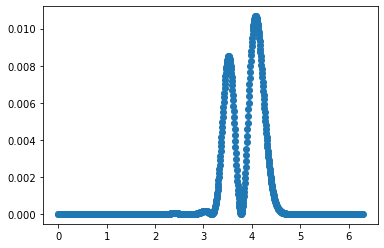

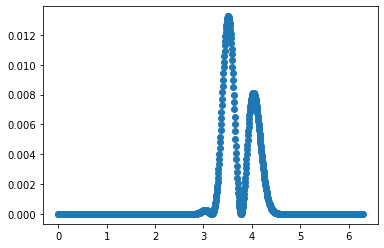

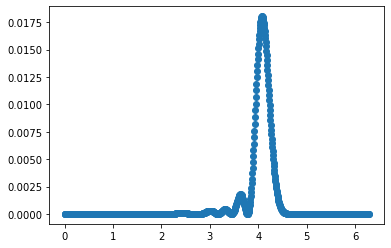

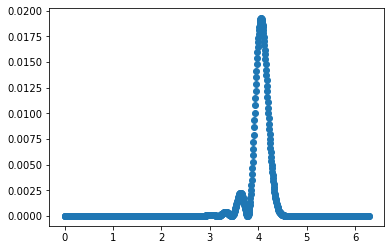

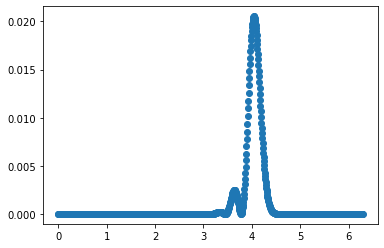

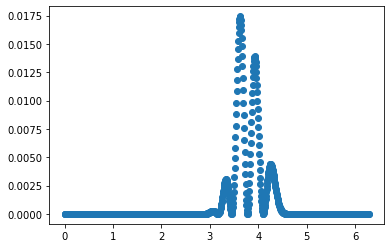

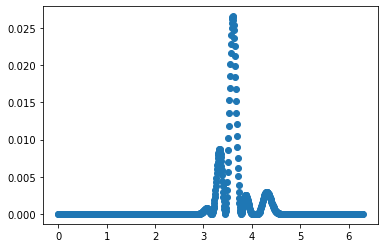

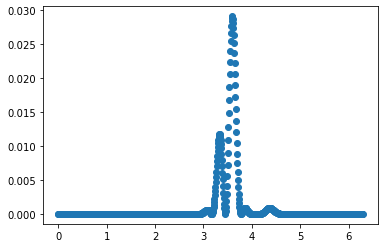

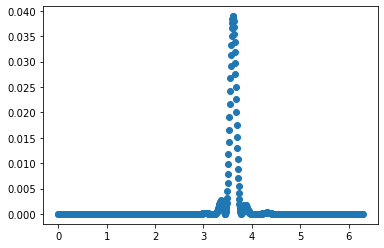

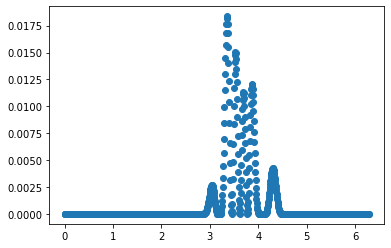

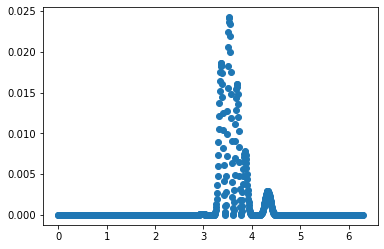

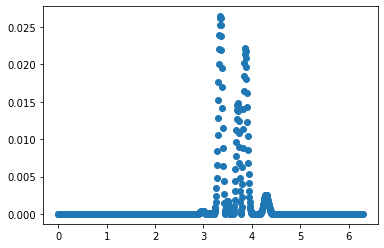

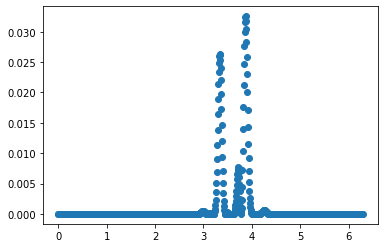

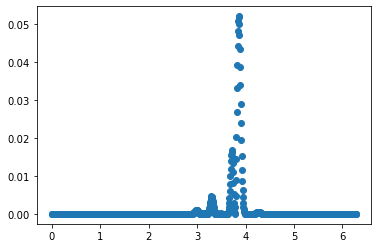

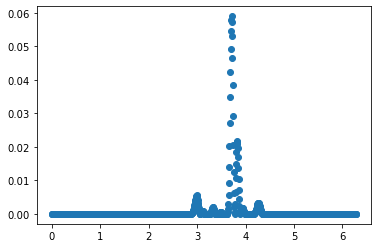

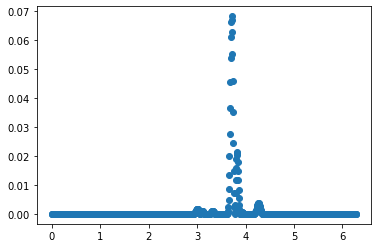

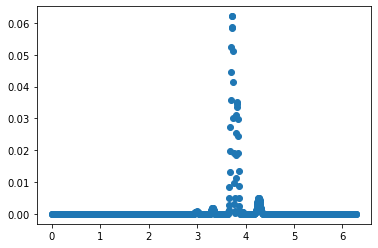

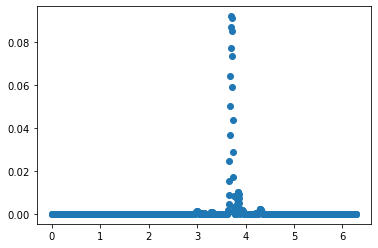

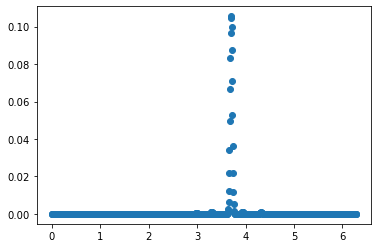

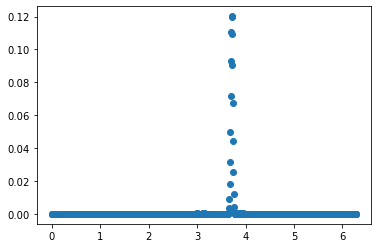

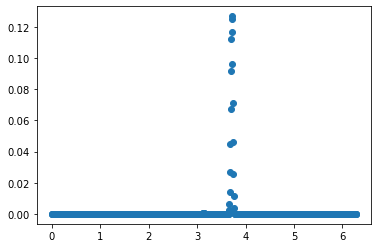

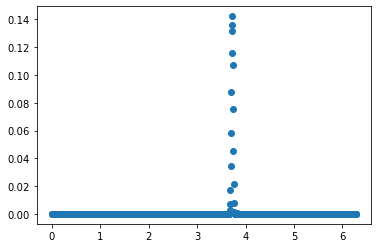

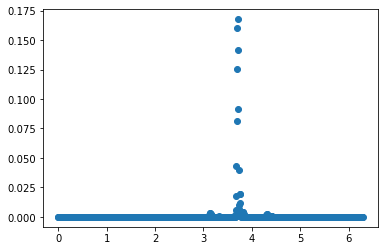

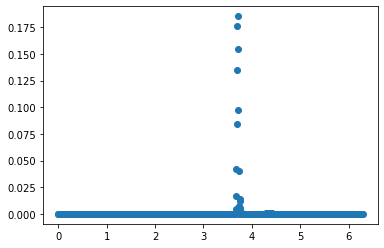

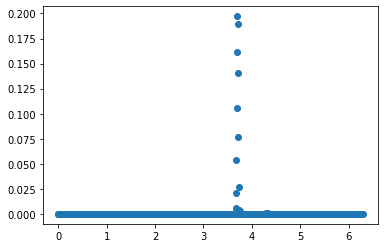

 30%|████████████████████████▉                                                          | 6/20 [00:37<01:27,  6.22s/it]

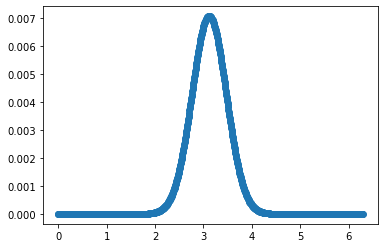

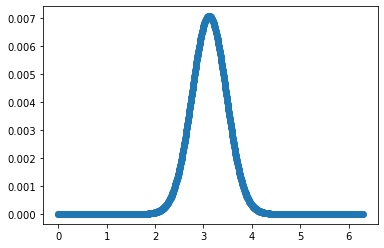

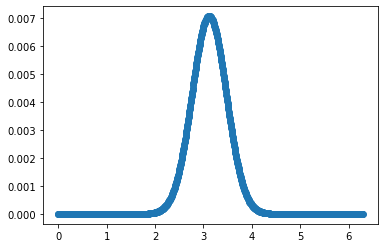

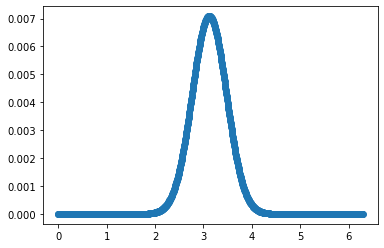

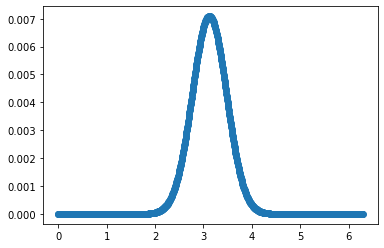

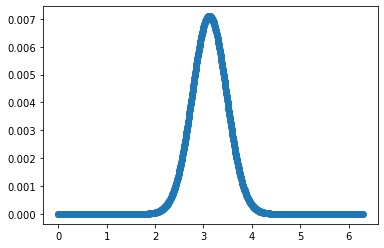

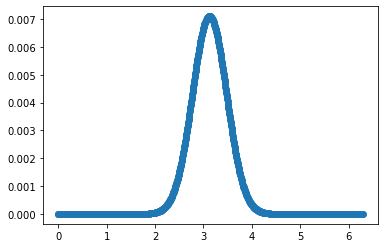

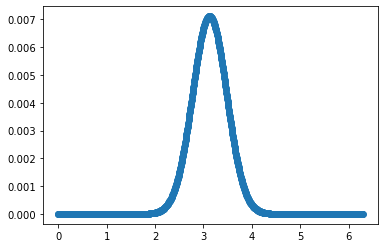

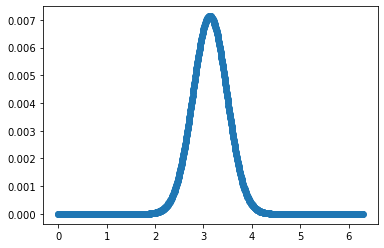

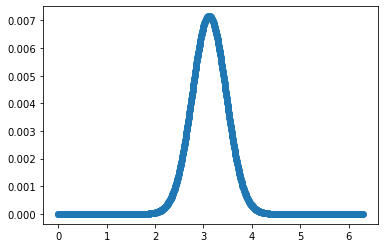

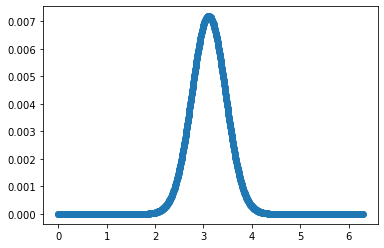

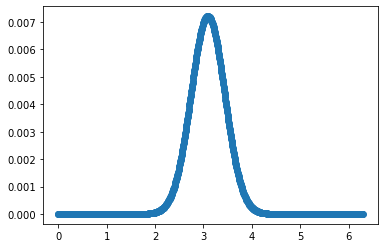

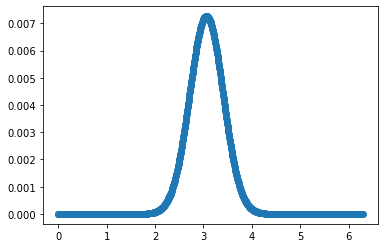

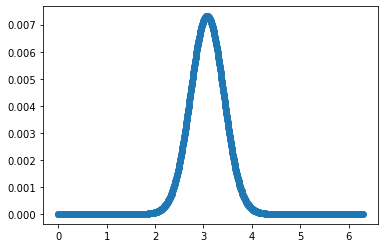

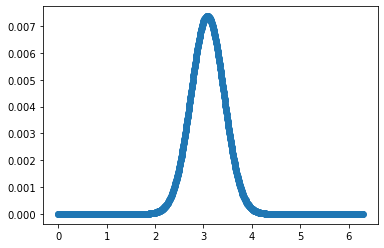

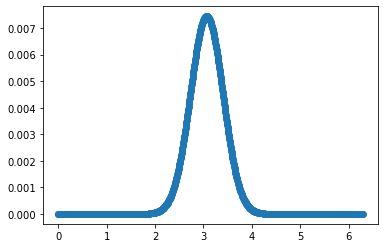

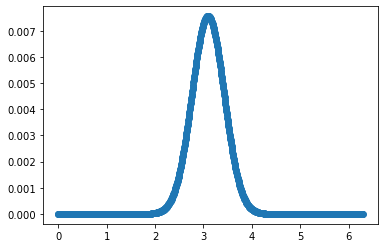

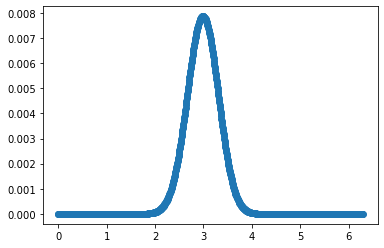

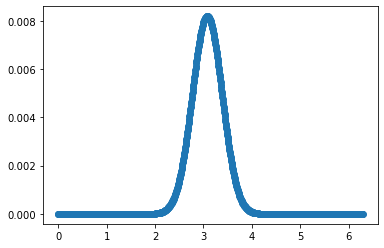

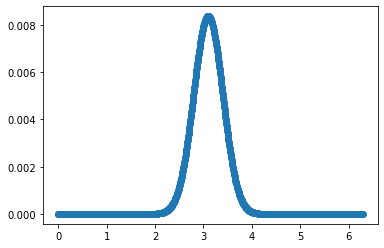

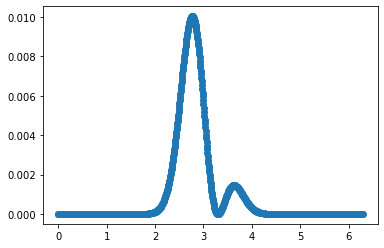

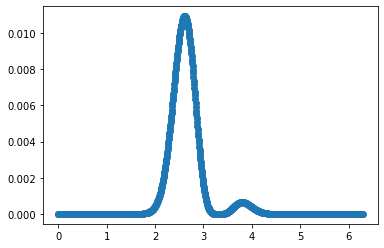

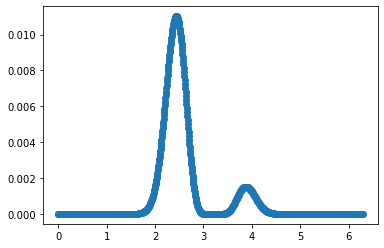

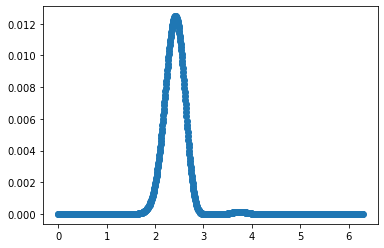

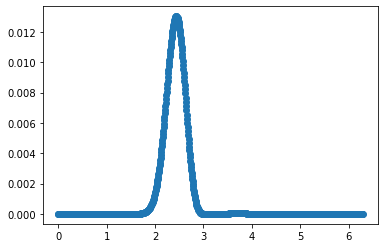

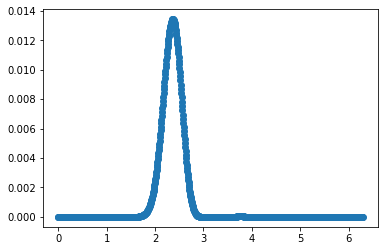

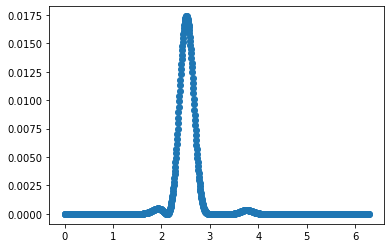

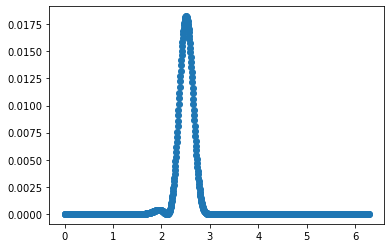

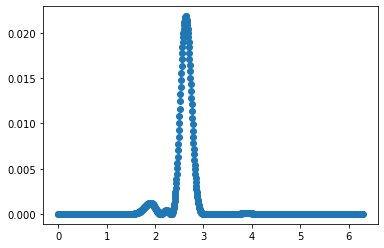

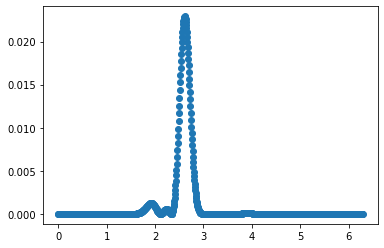

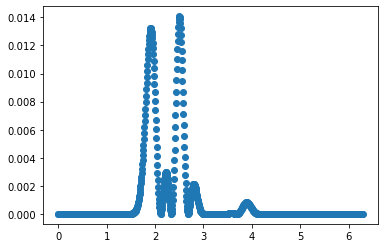

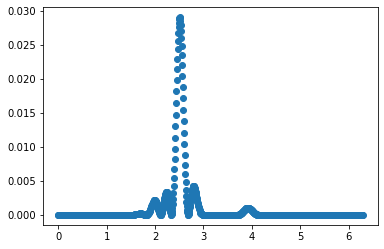

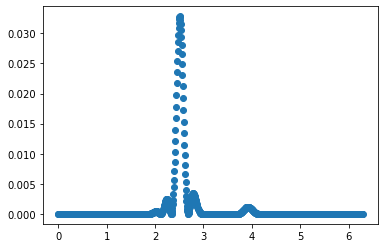

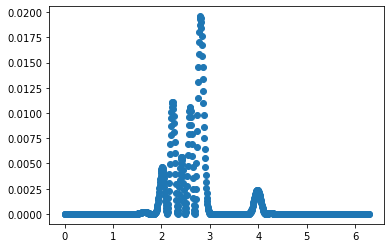

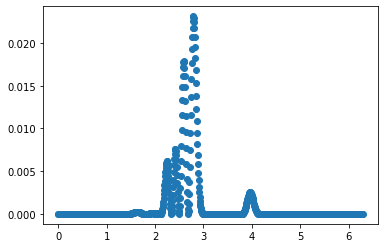

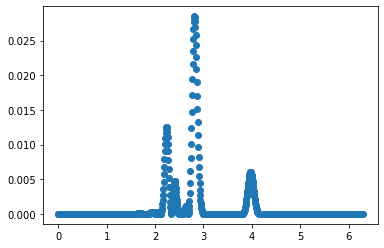

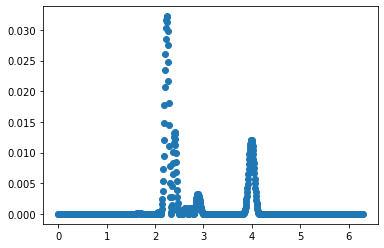

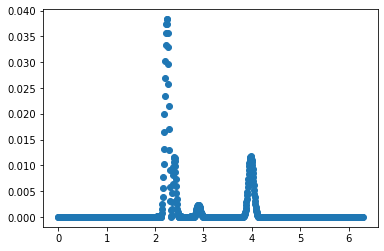

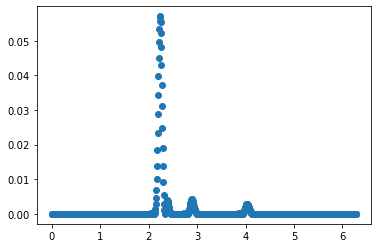

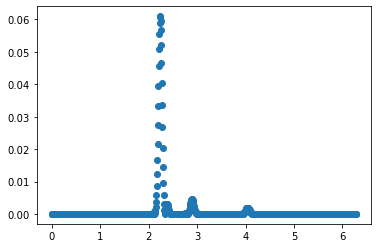

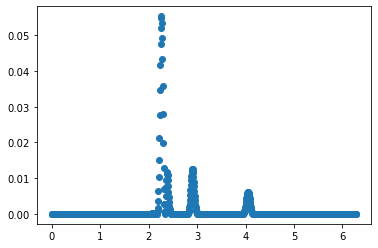

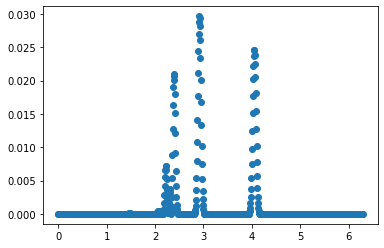

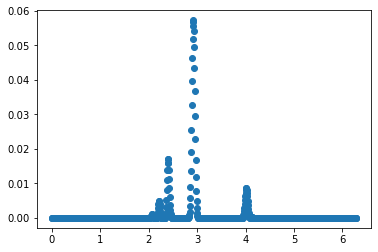

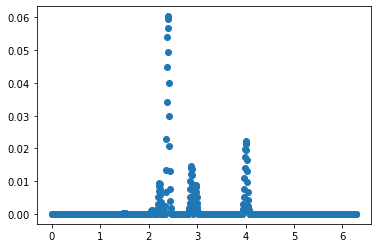

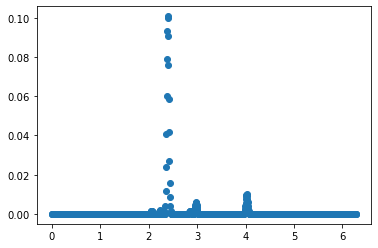

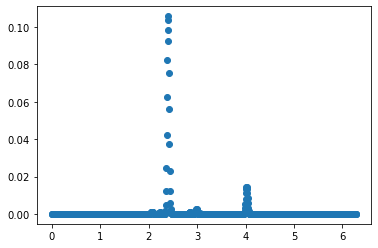

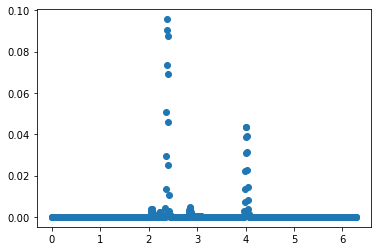

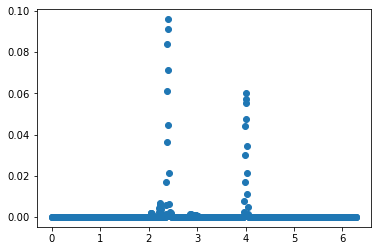

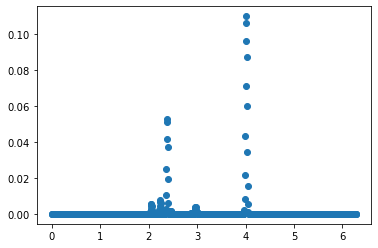

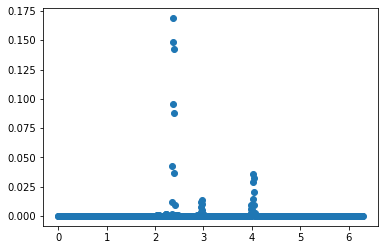

 35%|█████████████████████████████                                                      | 7/20 [00:43<01:19,  6.15s/it]

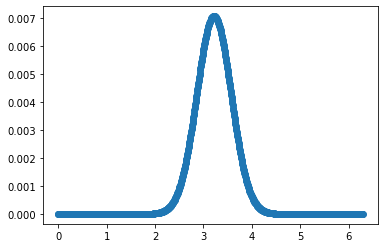

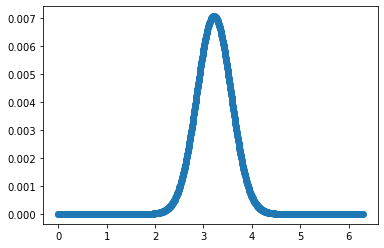

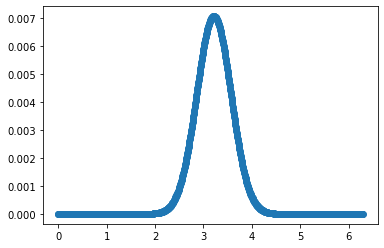

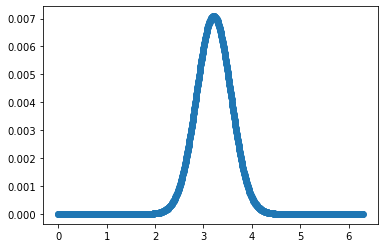

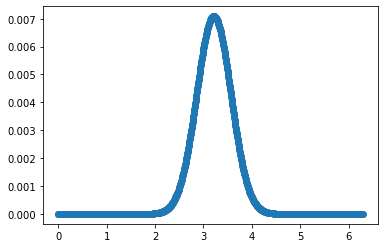

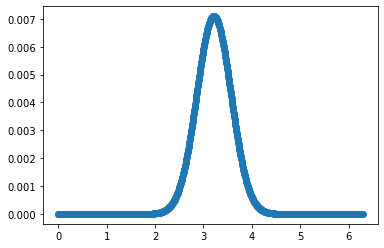

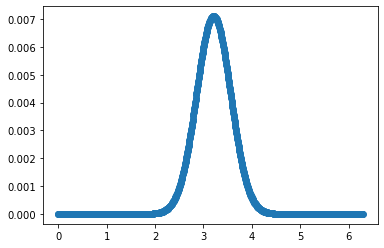

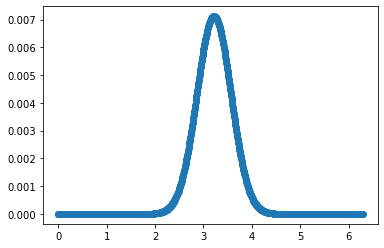

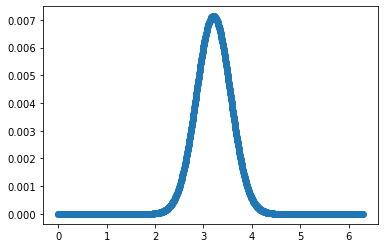

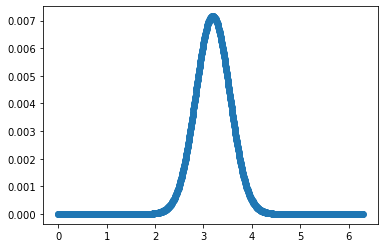

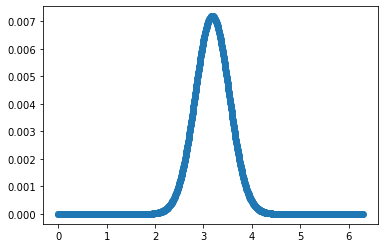

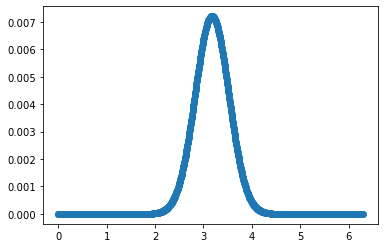

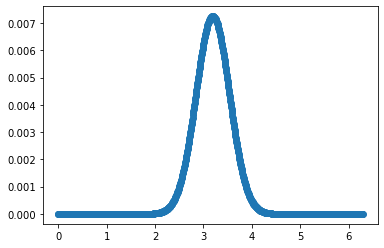

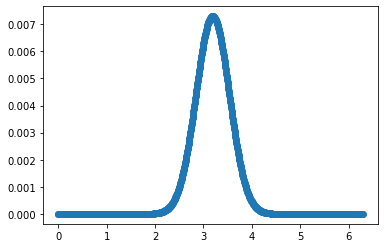

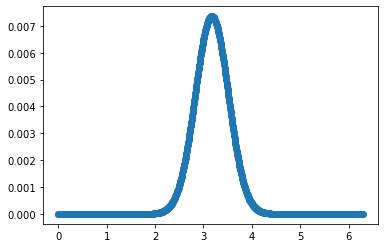

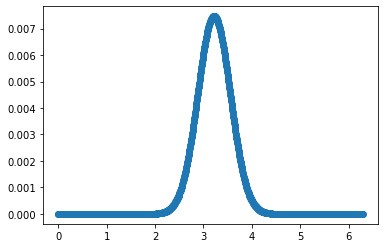

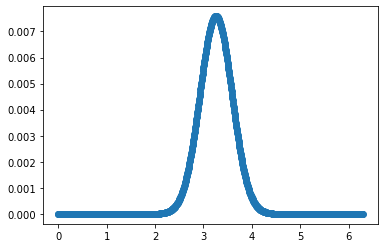

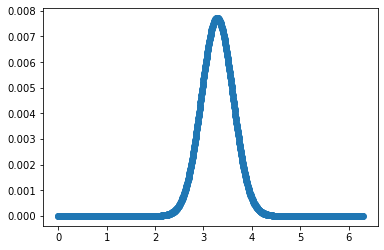

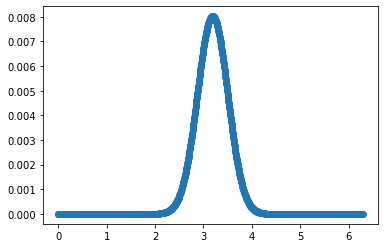

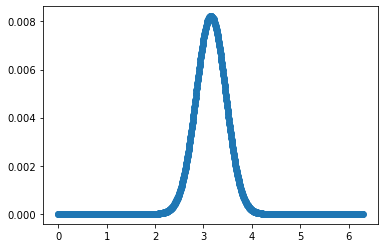

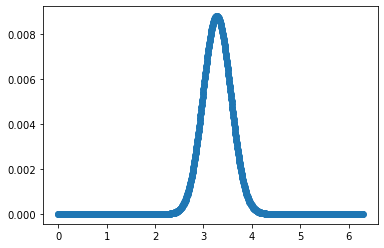

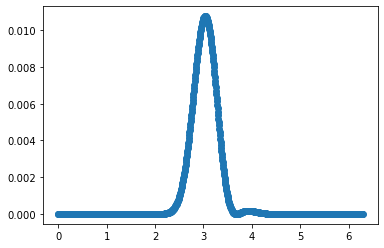

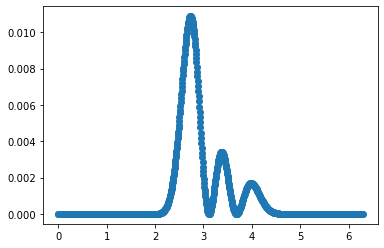

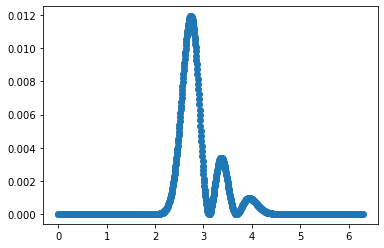

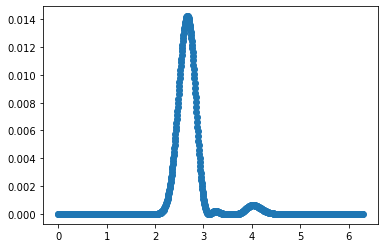

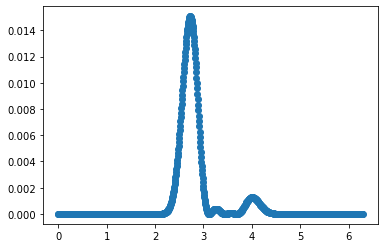

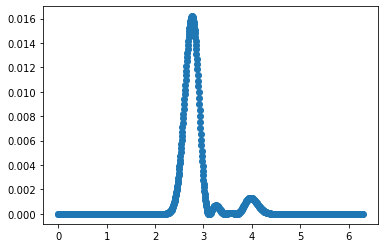

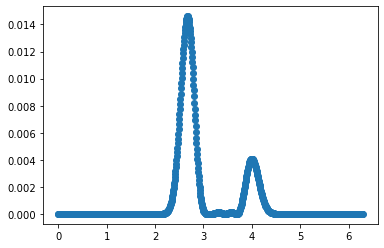

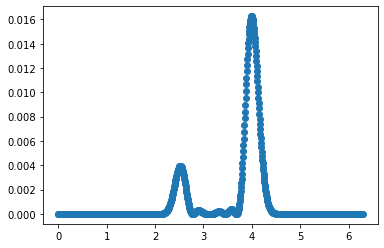

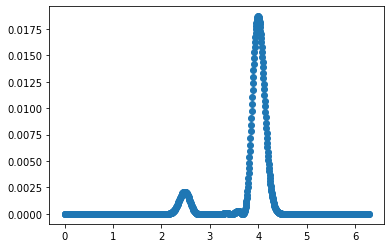

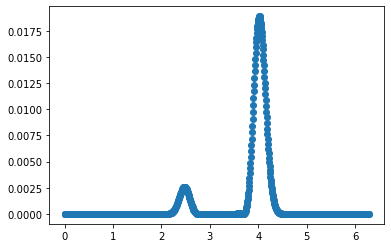

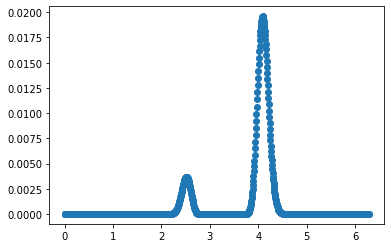

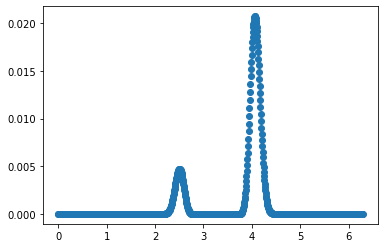

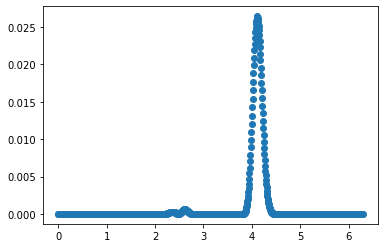

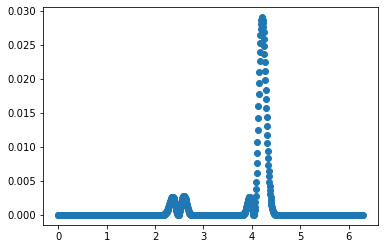

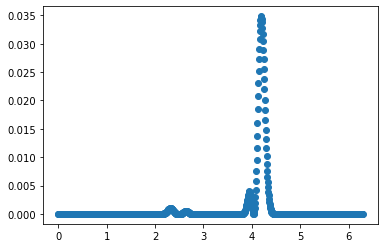

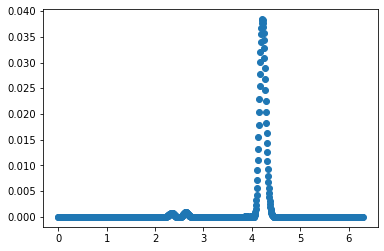

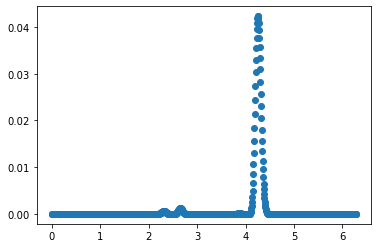

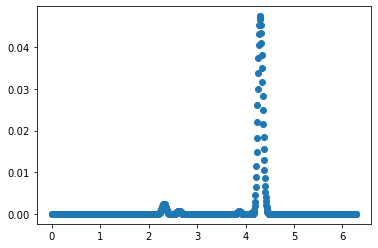

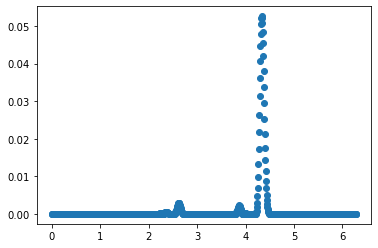

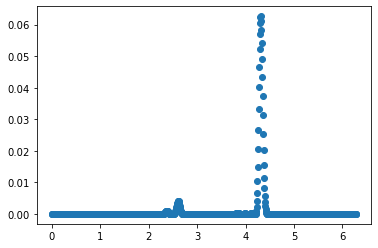

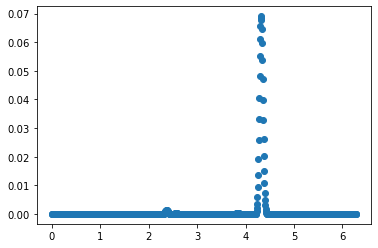

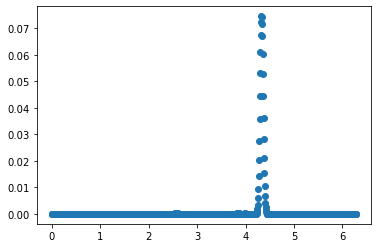

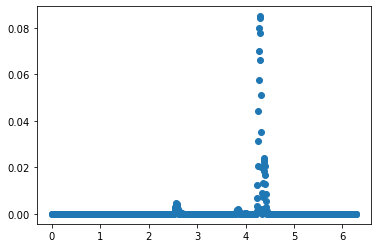

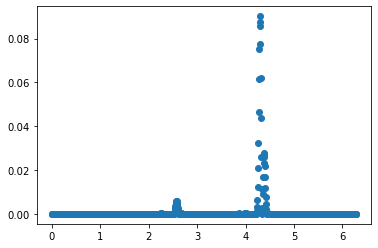

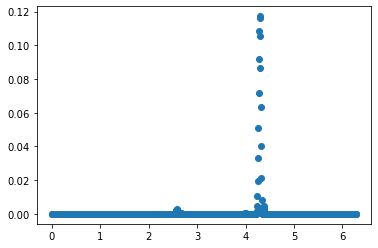

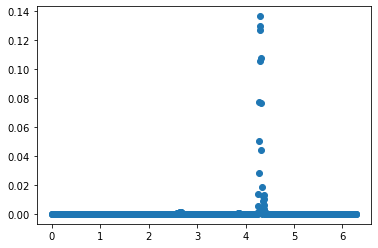

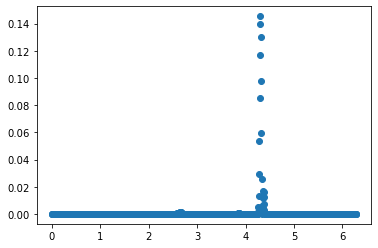

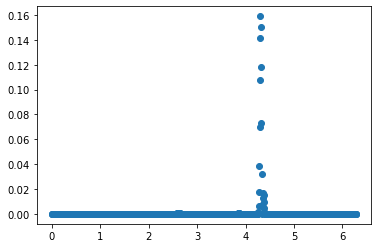

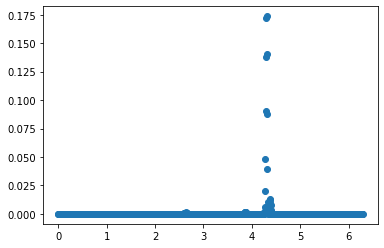

 40%|█████████████████████████████████▏                                                 | 8/20 [00:49<01:13,  6.12s/it]

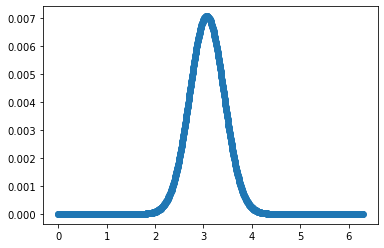

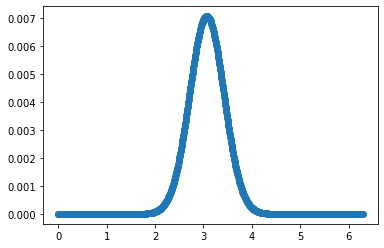

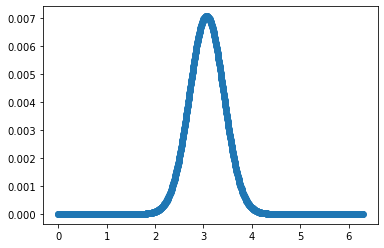

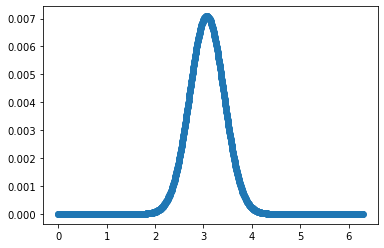

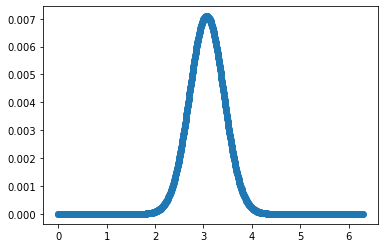

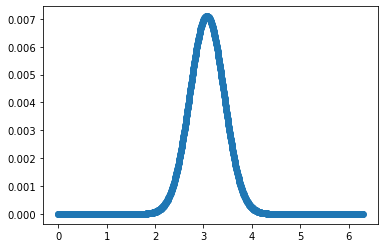

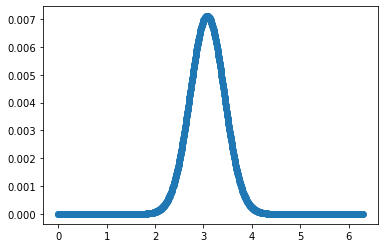

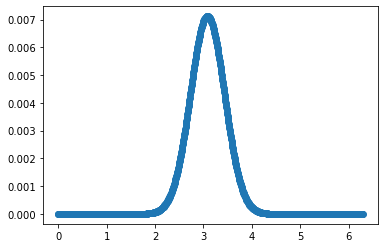

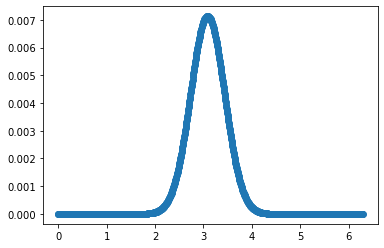

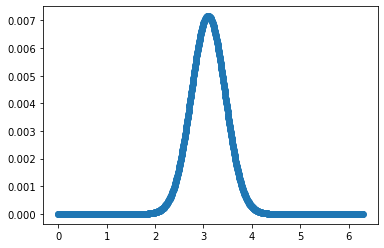

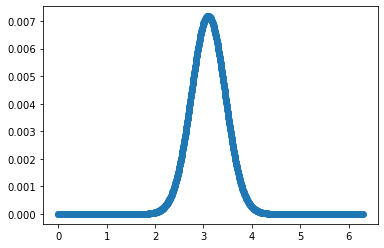

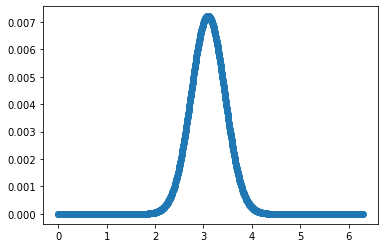

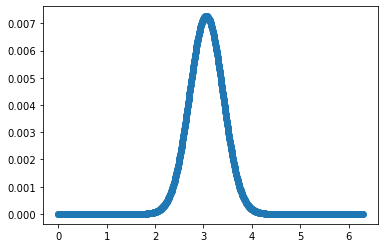

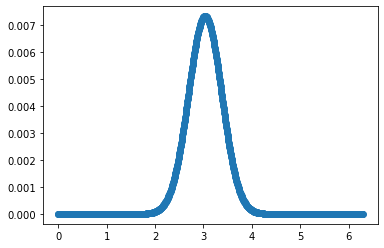

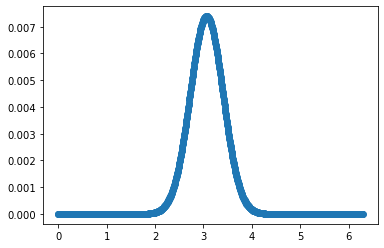

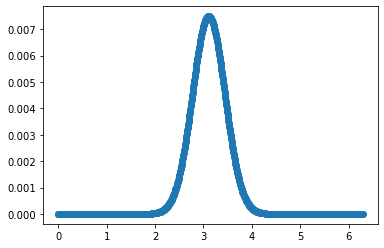

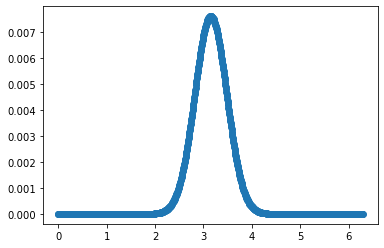

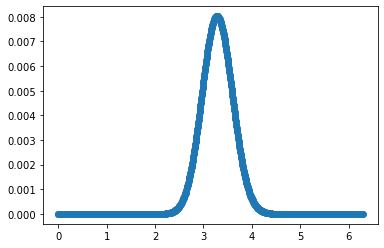

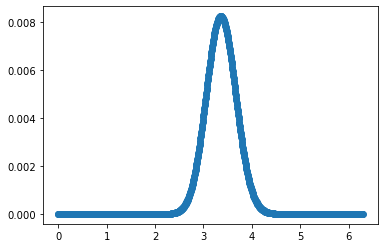

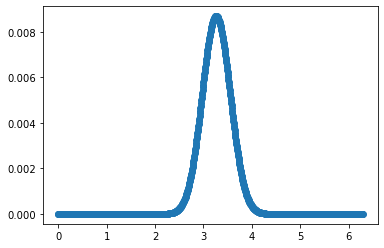

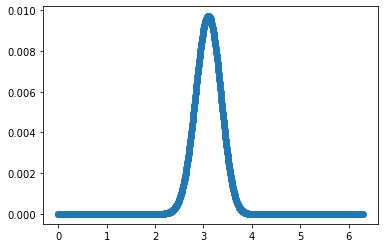

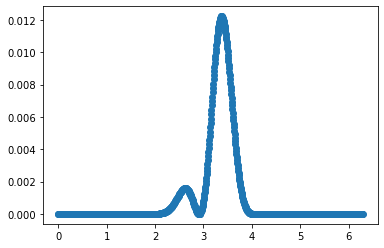

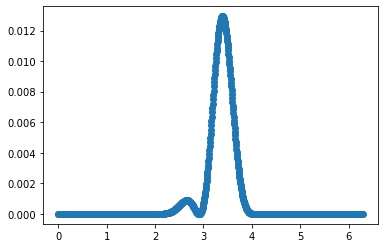

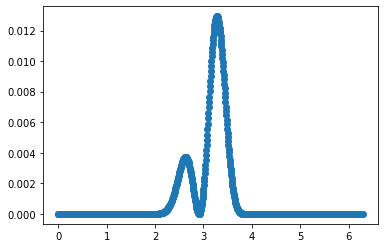

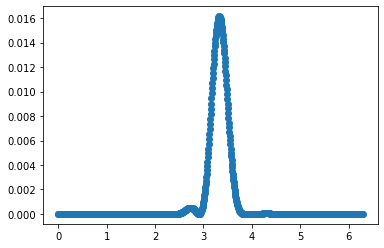

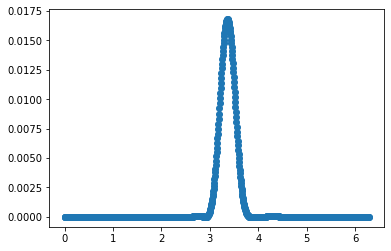

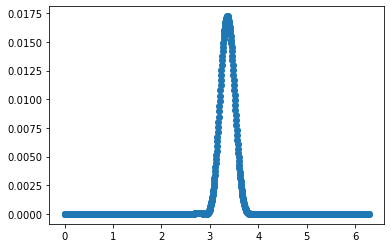

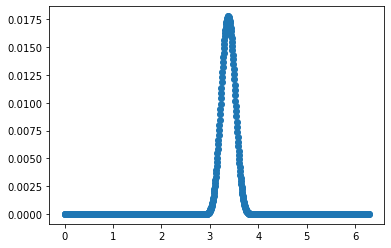

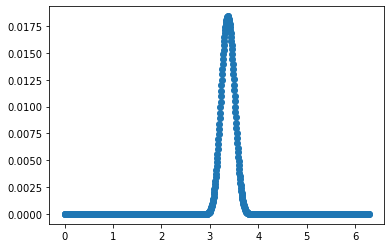

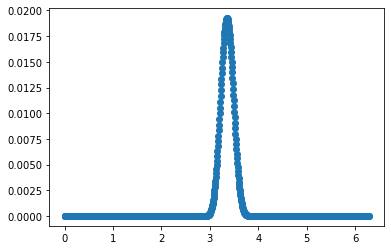

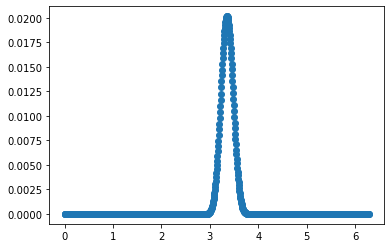

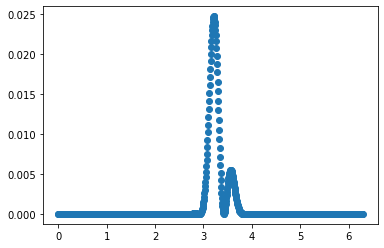

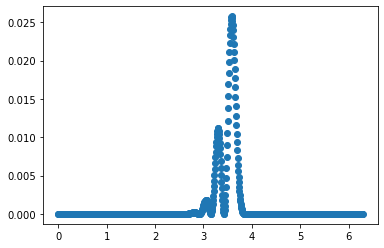

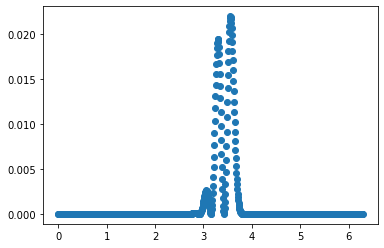

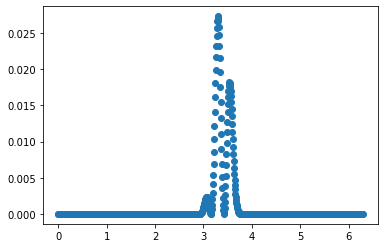

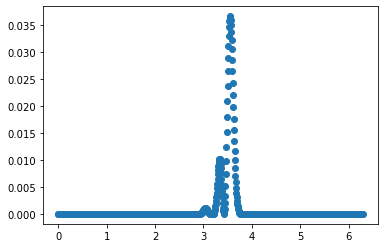

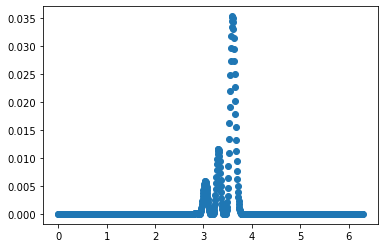

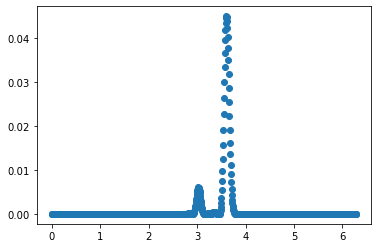

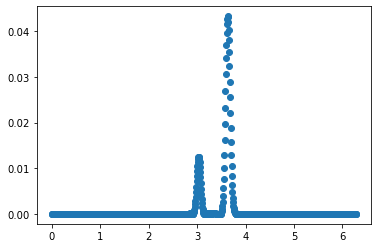

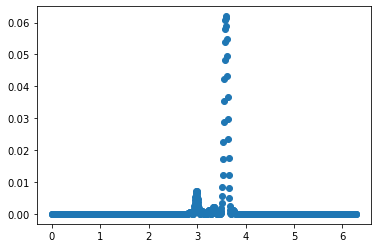

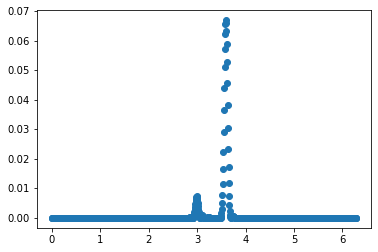

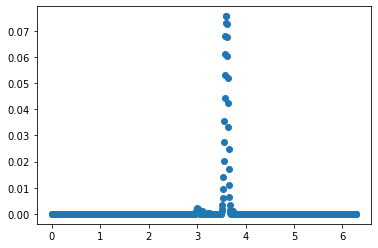

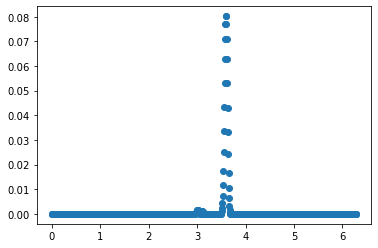

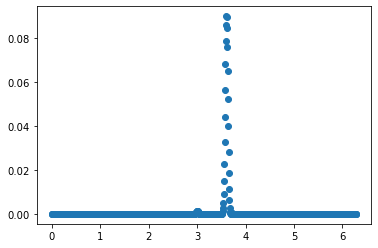

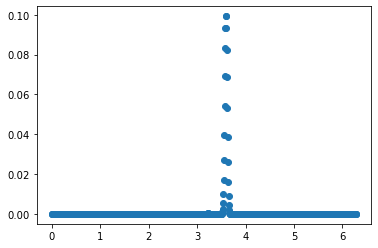

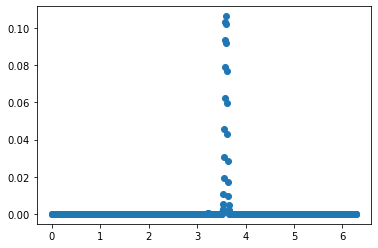

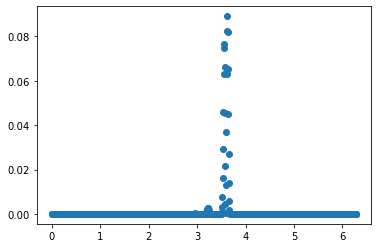

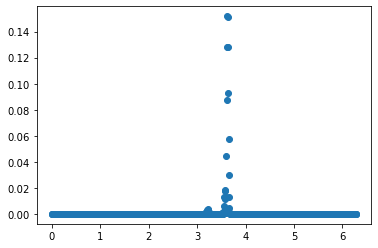

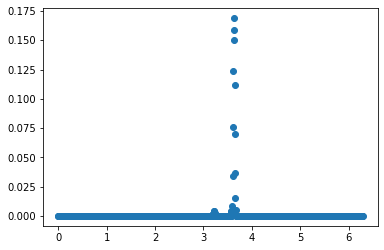

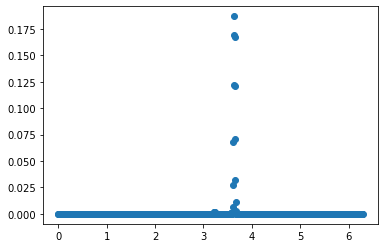

 45%|█████████████████████████████████████▎                                             | 9/20 [00:55<01:06,  6.08s/it]

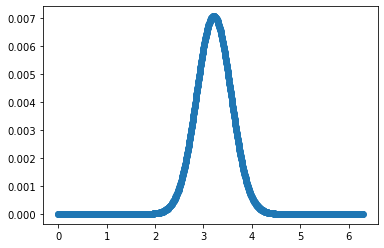

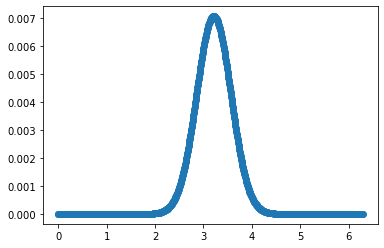

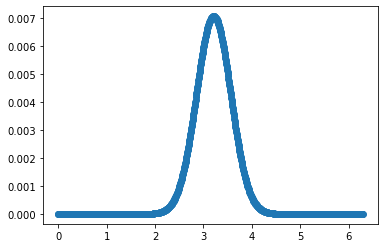

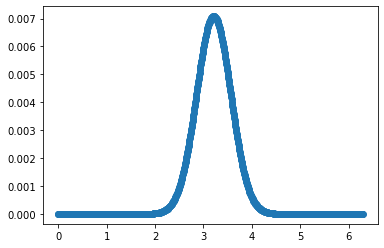

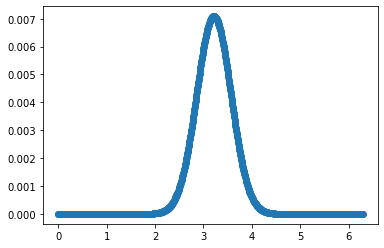

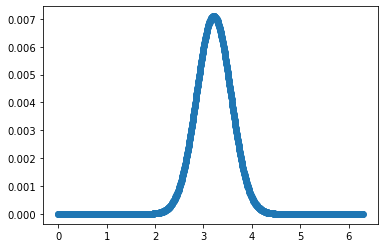

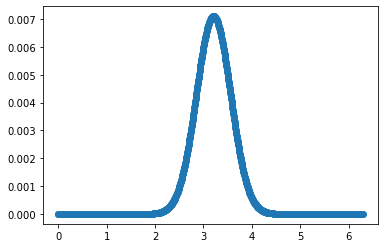

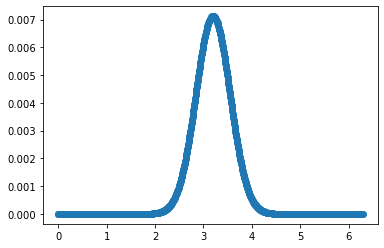

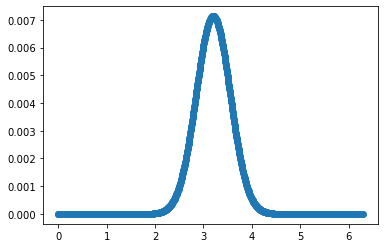

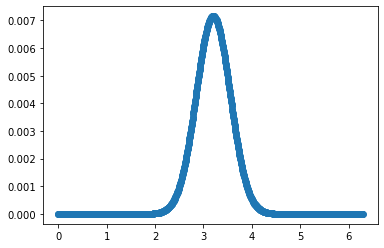

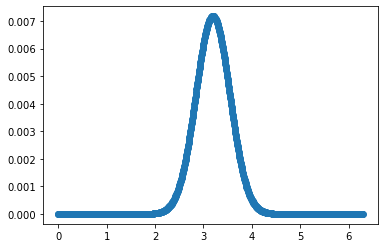

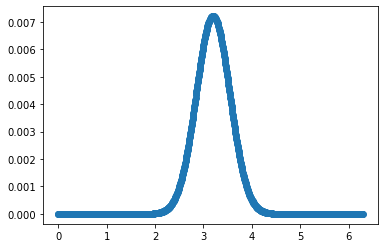

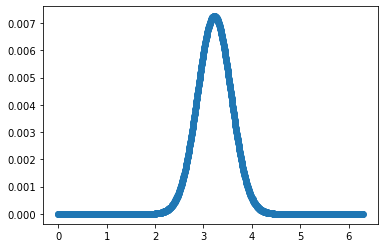

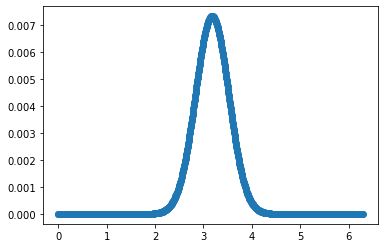

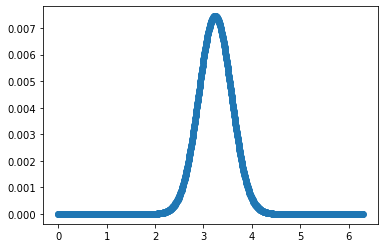

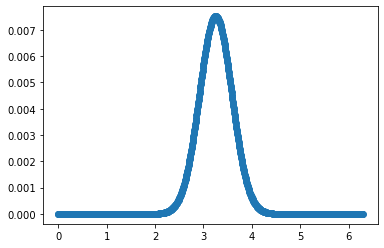

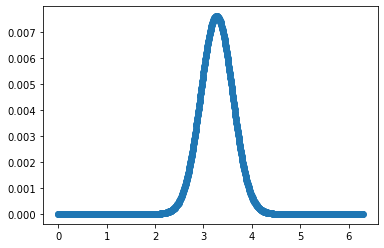

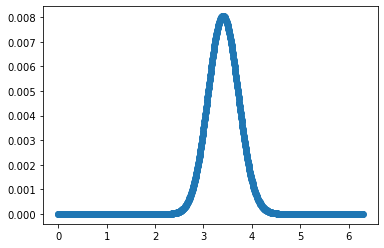

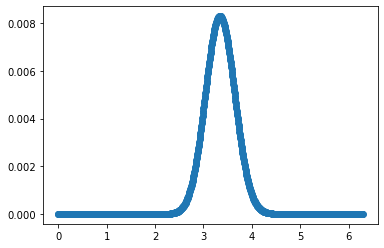

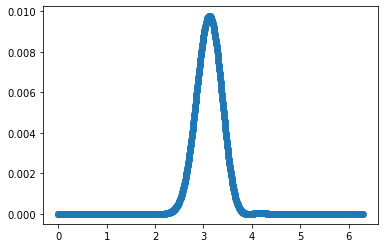

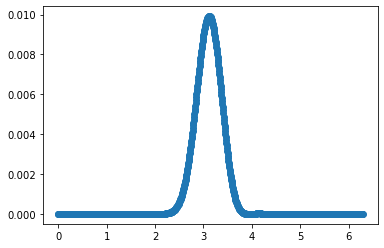

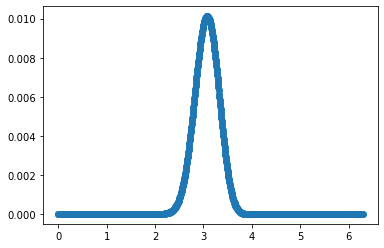

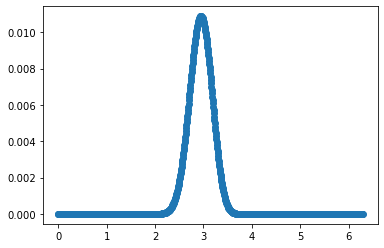

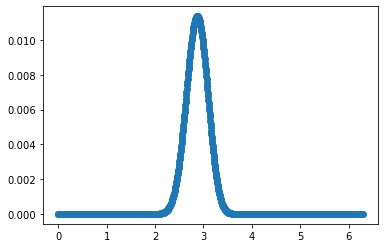

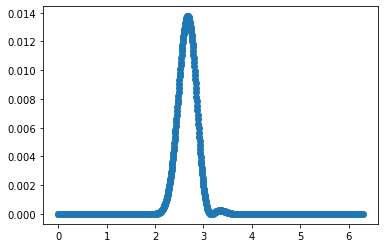

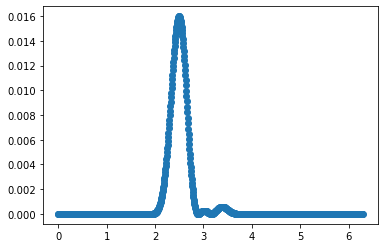

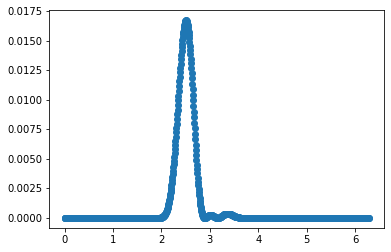

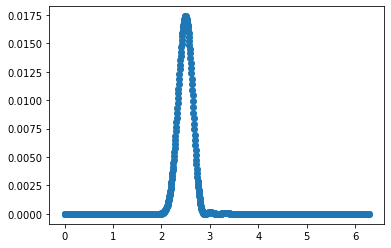

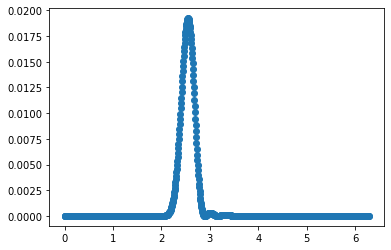

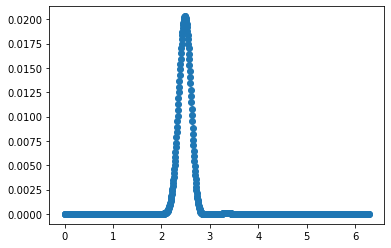

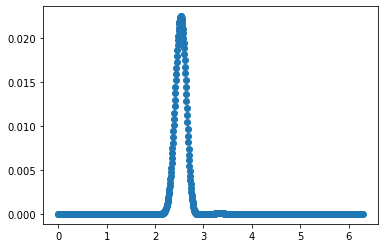

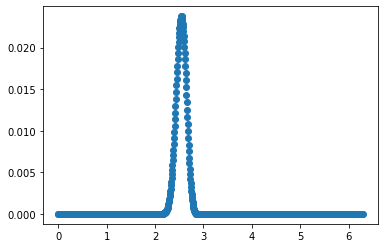

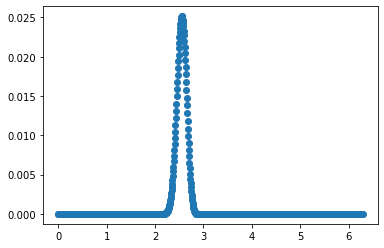

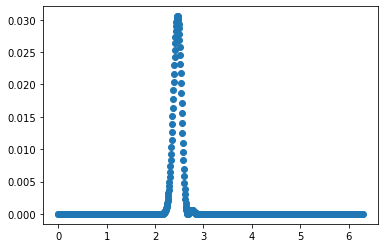

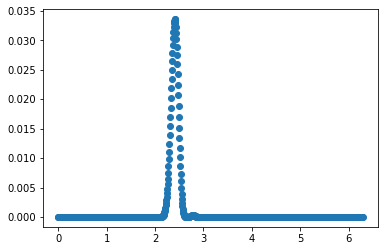

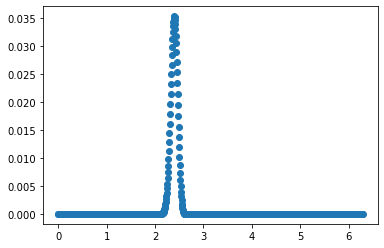

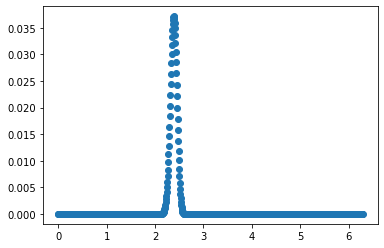

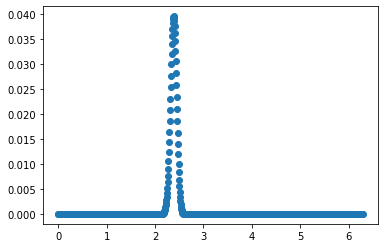

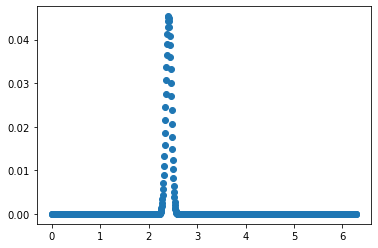

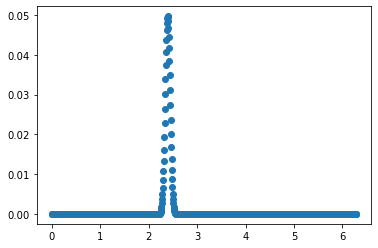

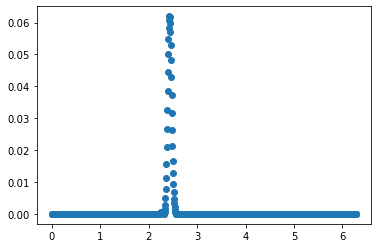

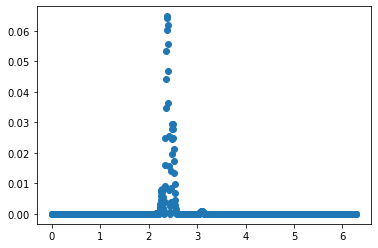

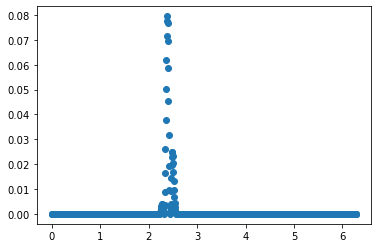

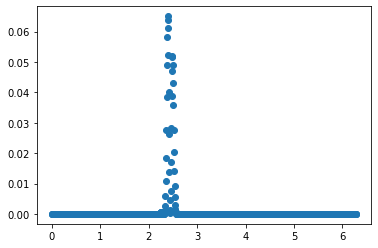

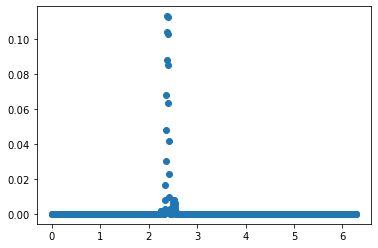

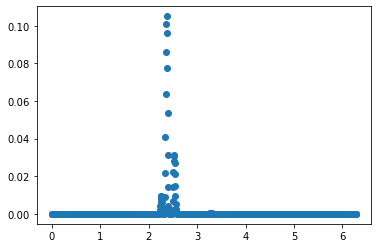

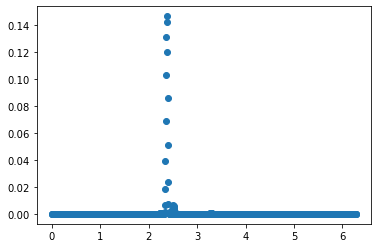

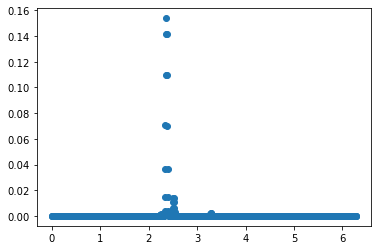

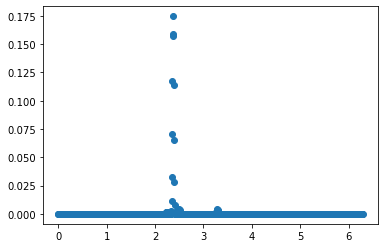

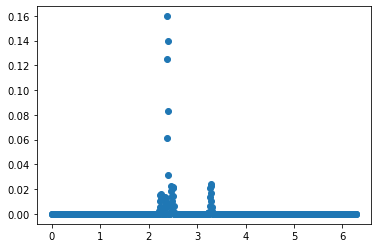

 50%|█████████████████████████████████████████                                         | 10/20 [01:01<01:01,  6.13s/it]

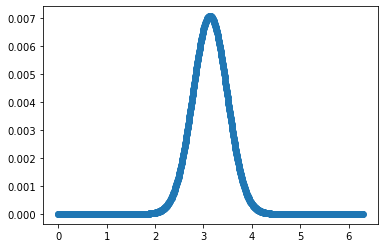

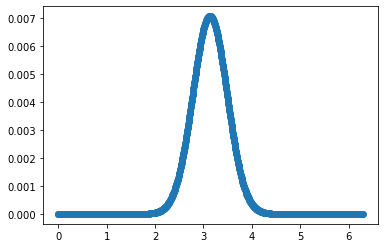

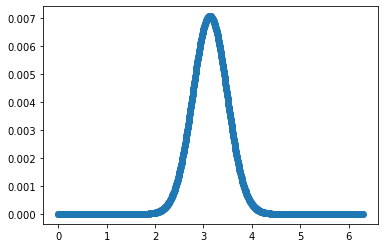

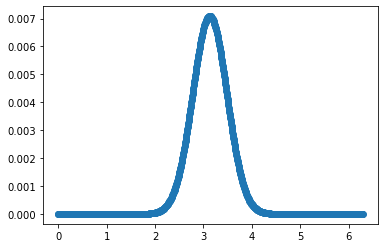

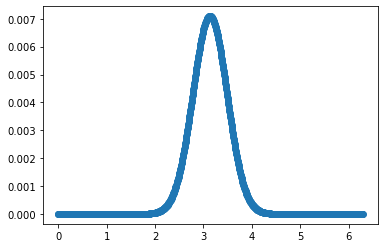

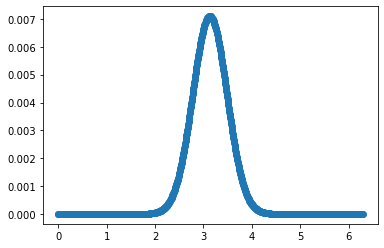

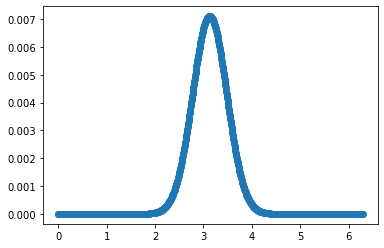

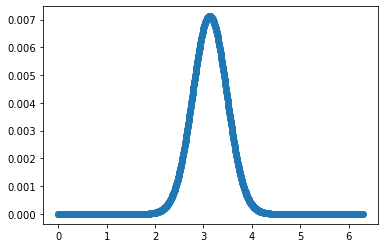

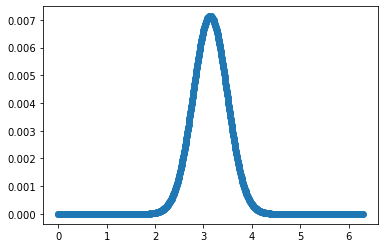

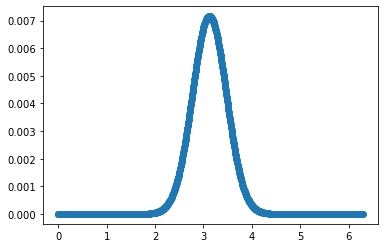

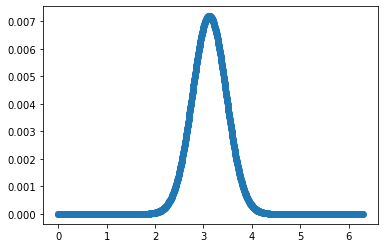

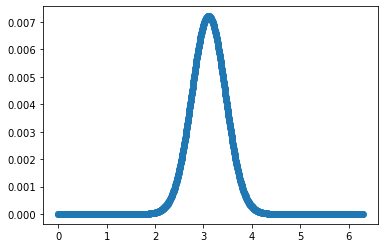

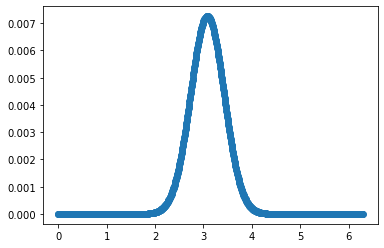

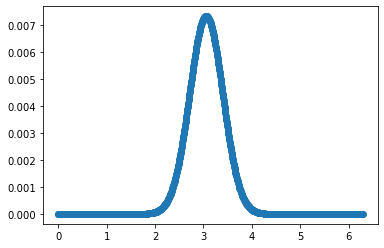

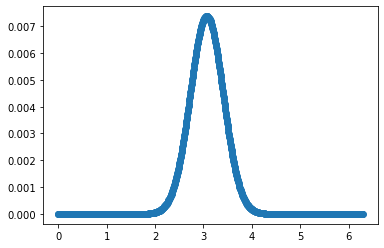

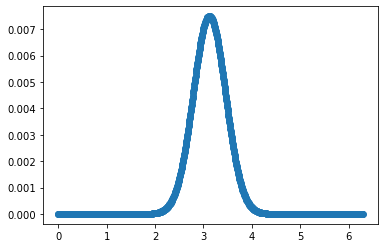

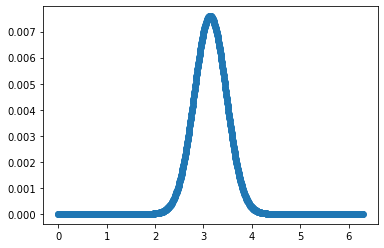

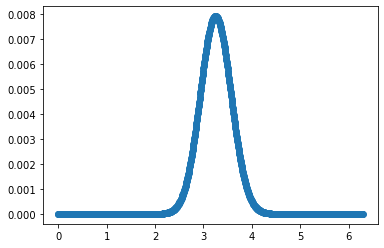

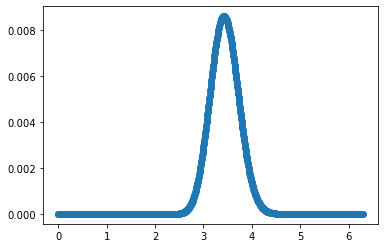

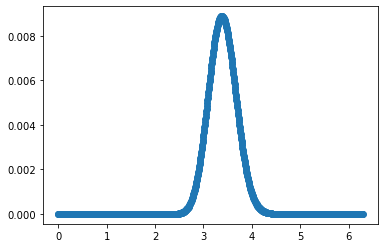

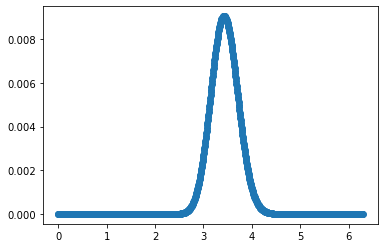

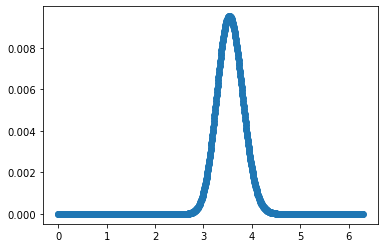

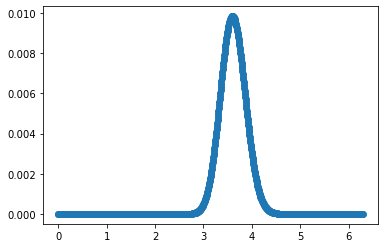

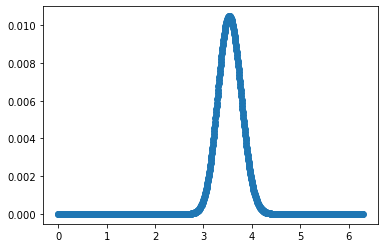

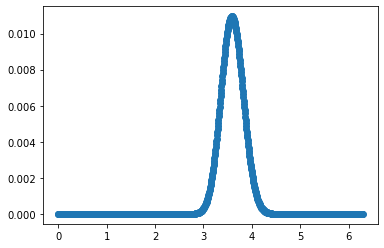

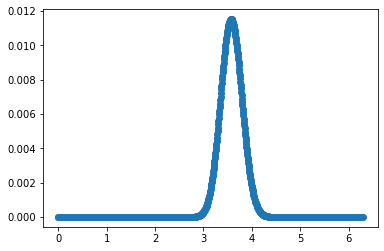

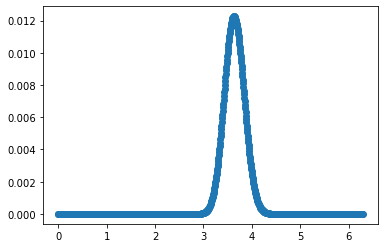

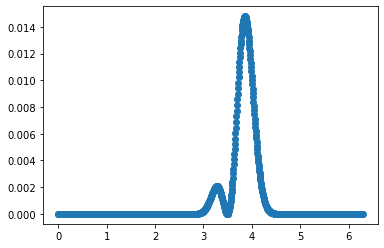

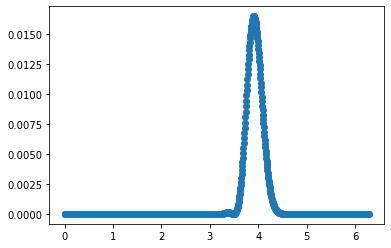

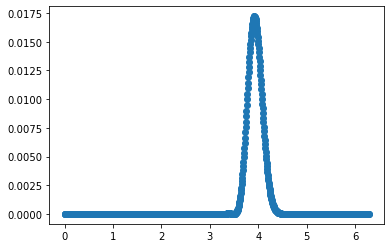

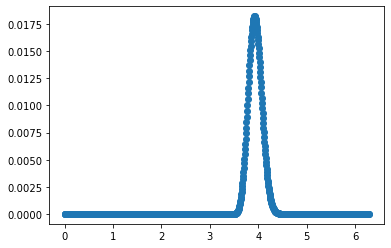

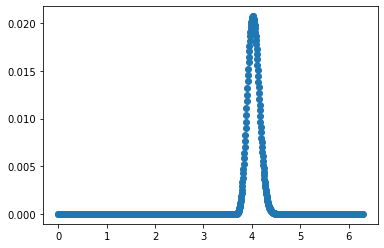

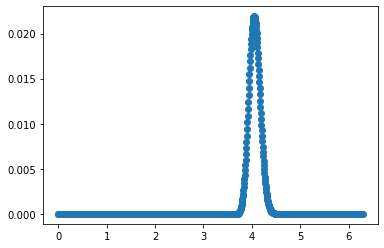

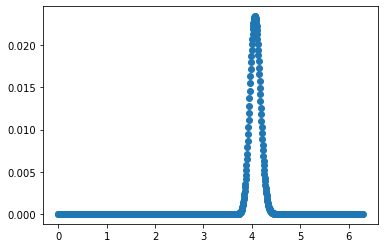

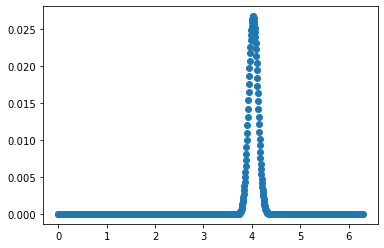

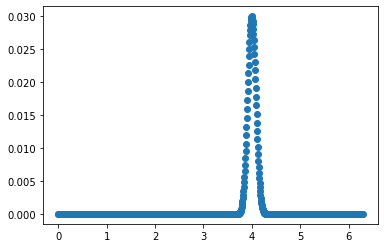

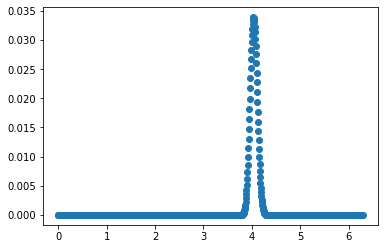

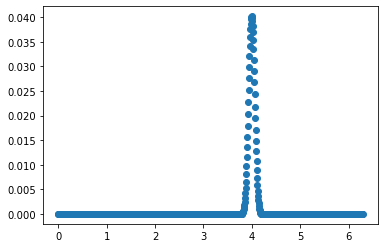

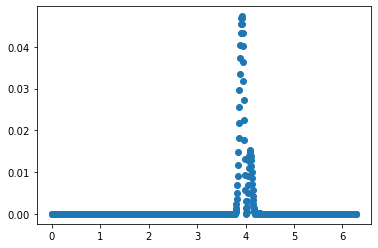

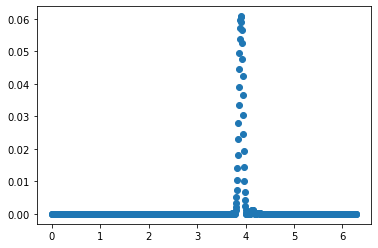

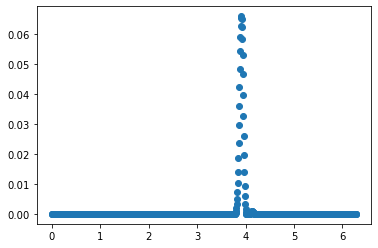

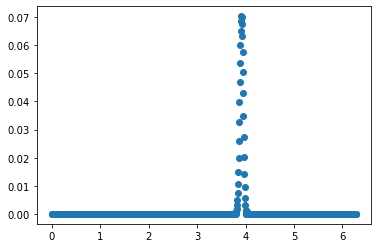

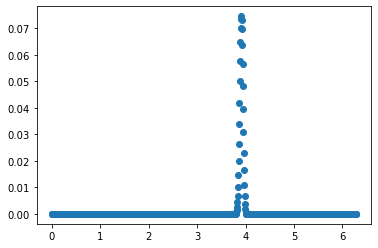

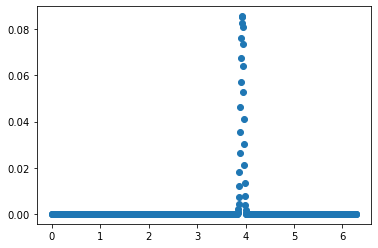

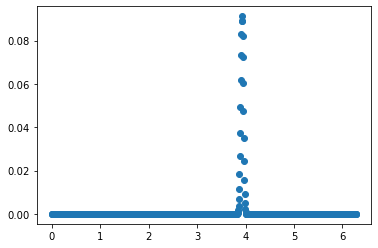

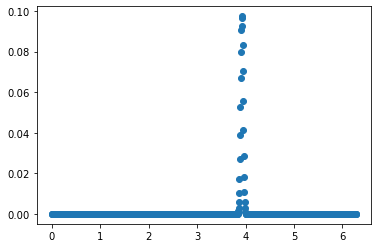

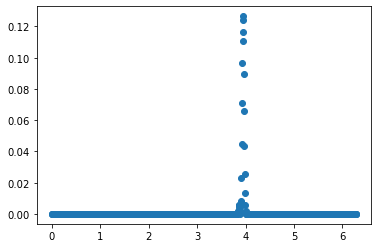

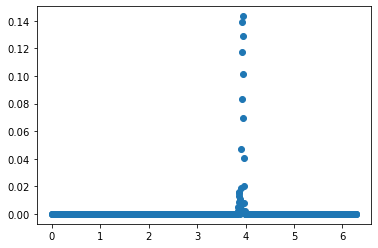

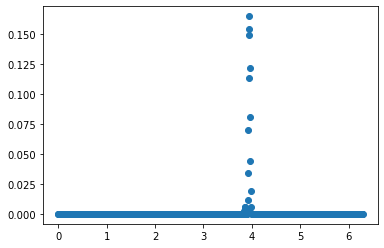

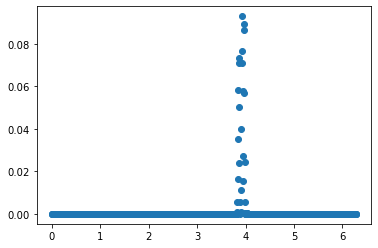

 55%|█████████████████████████████████████████████                                     | 11/20 [01:07<00:55,  6.13s/it]

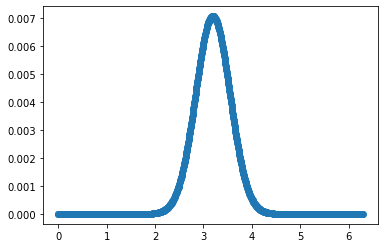

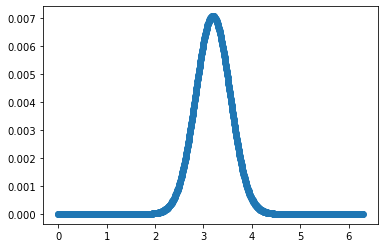

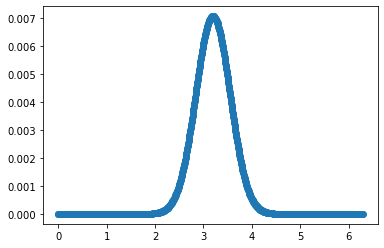

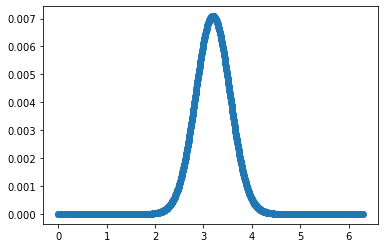

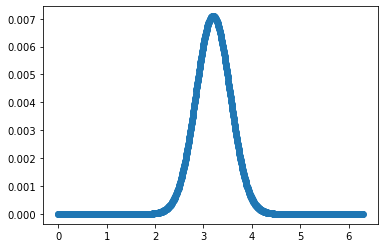

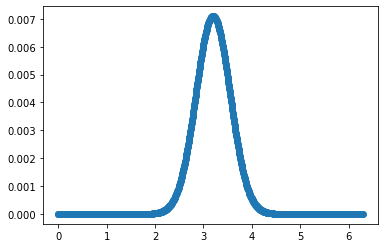

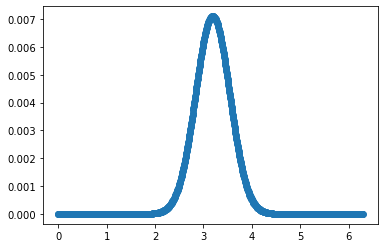

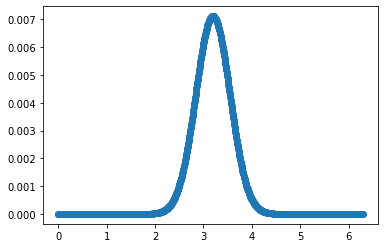

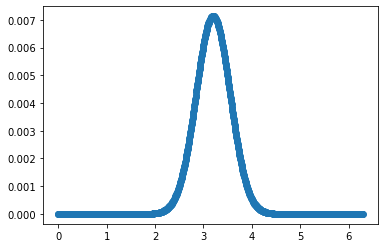

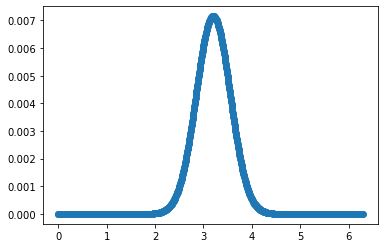

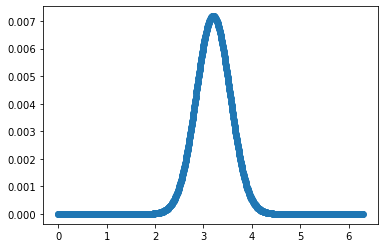

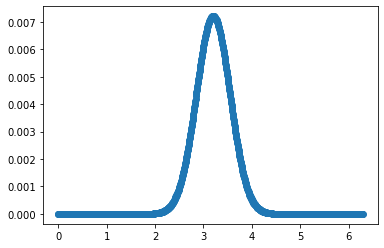

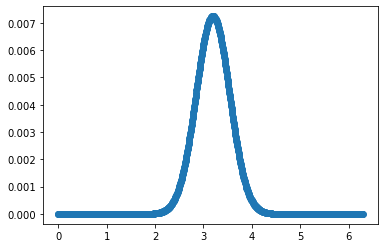

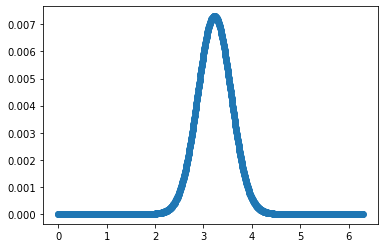

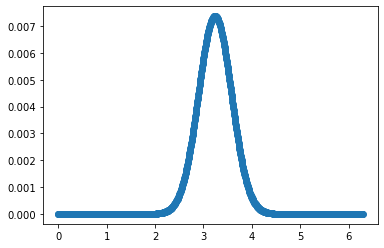

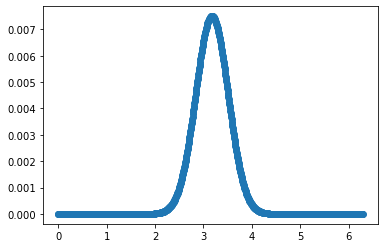

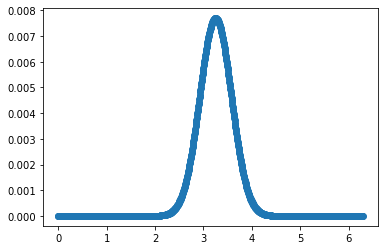

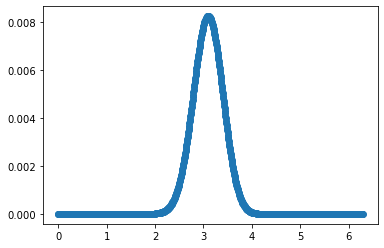

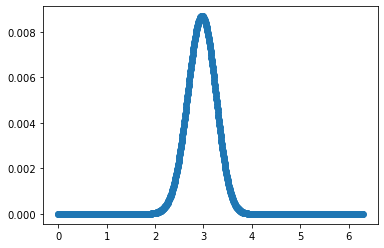

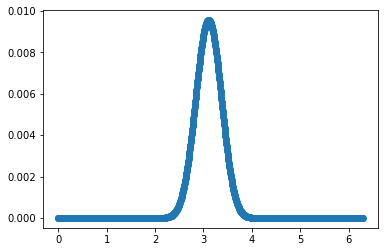

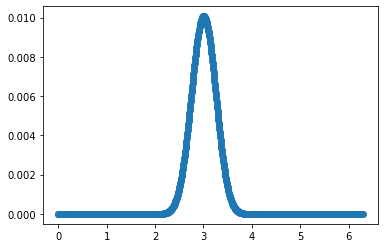

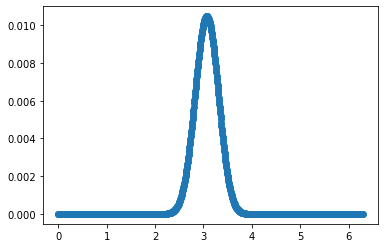

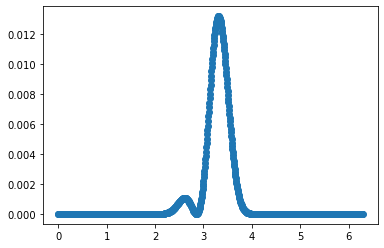

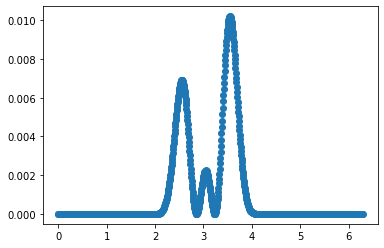

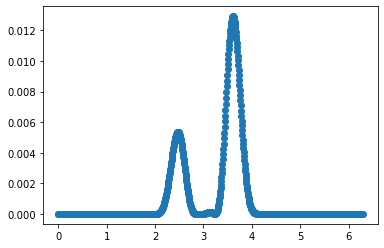

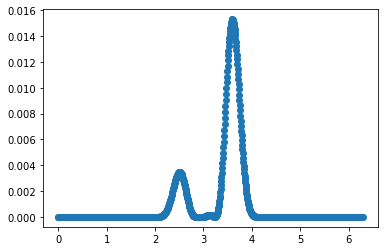

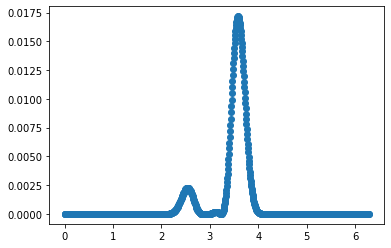

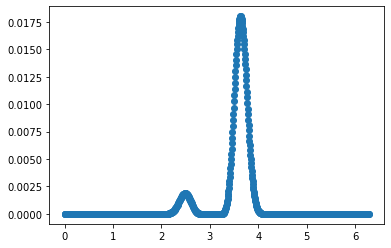

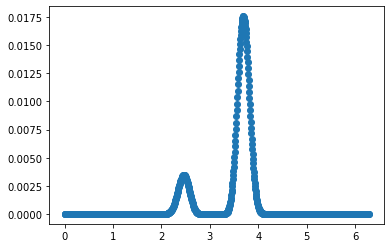

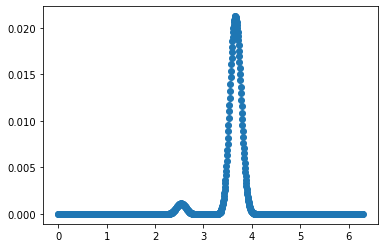

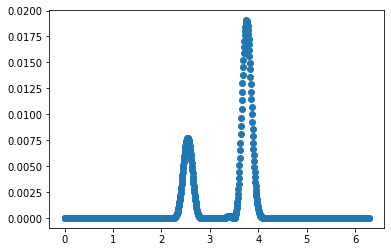

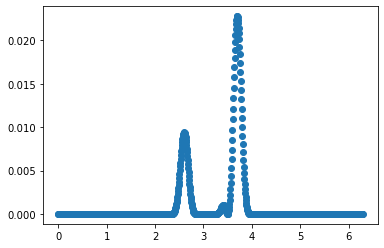

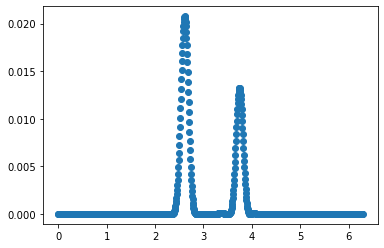

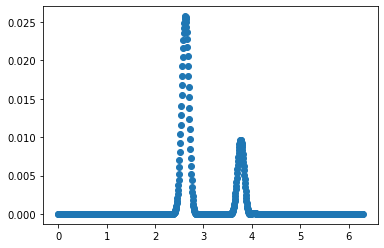

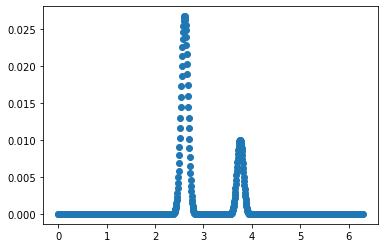

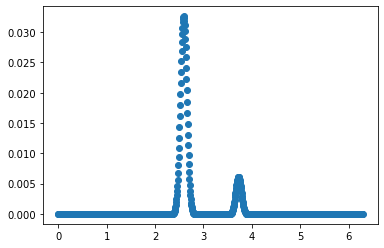

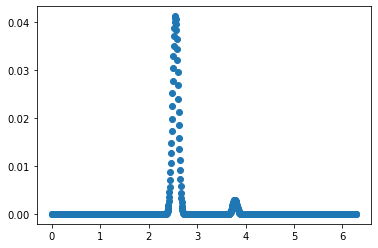

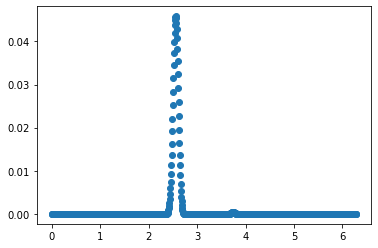

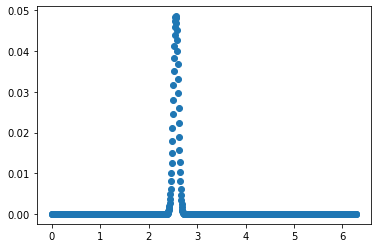

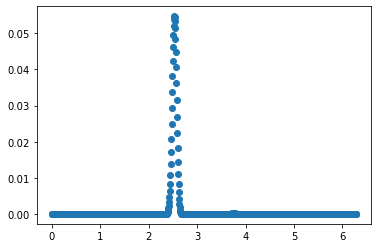

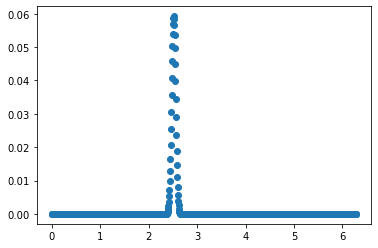

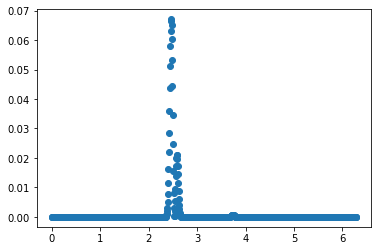

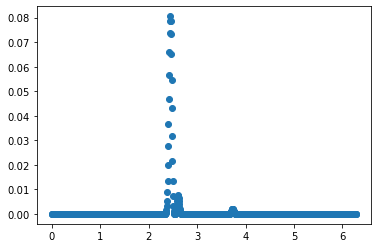

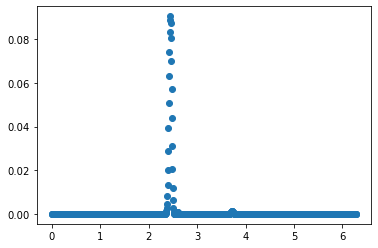

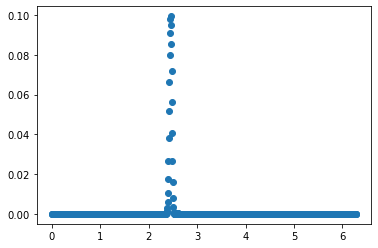

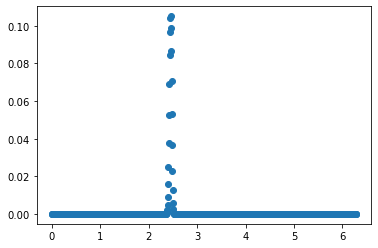

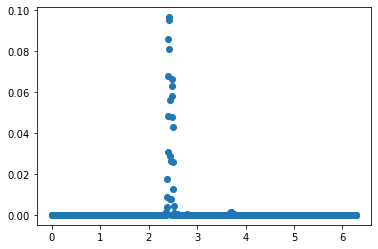

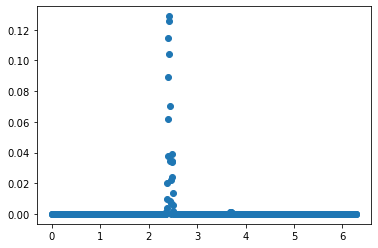

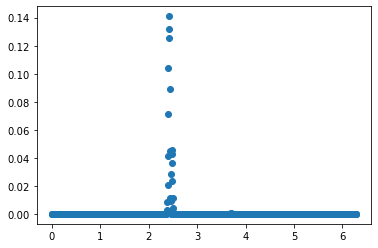

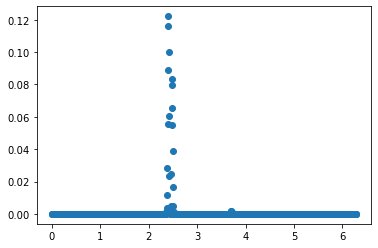

 60%|█████████████████████████████████████████████████▏                                | 12/20 [01:13<00:49,  6.15s/it]

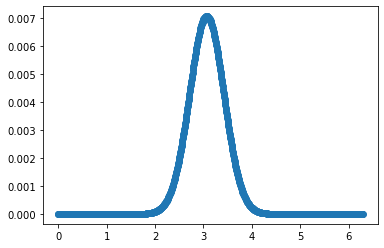

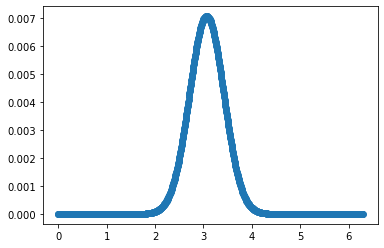

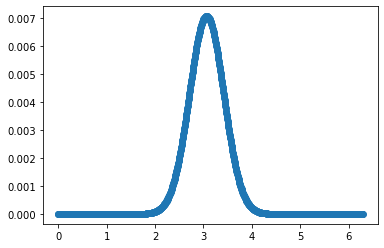

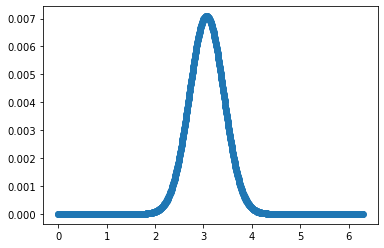

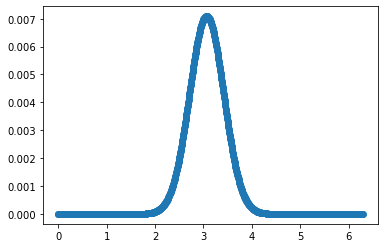

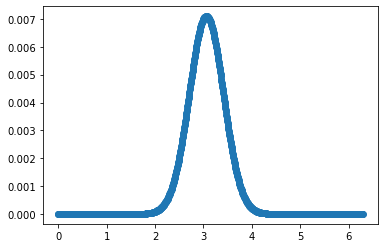

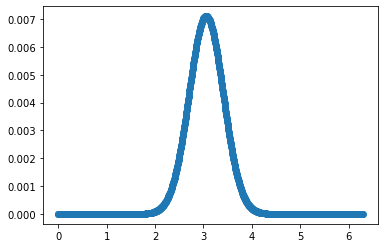

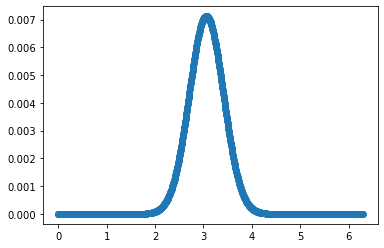

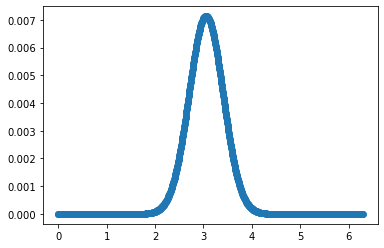

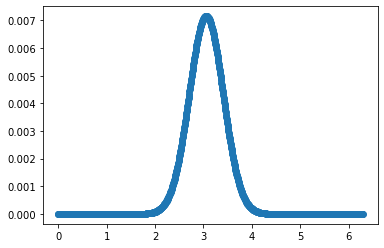

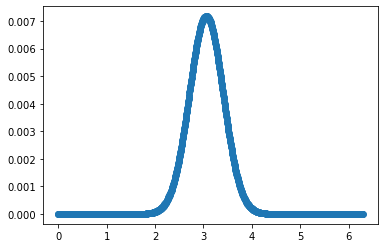

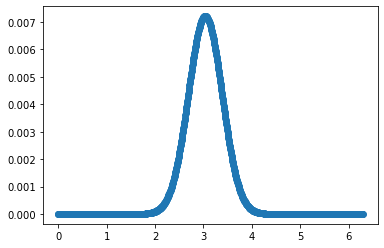

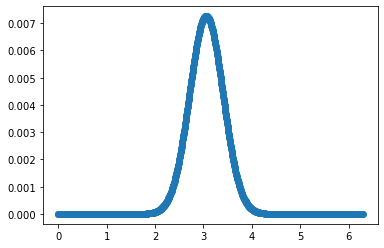

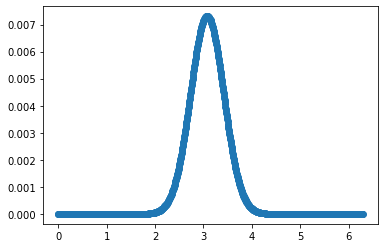

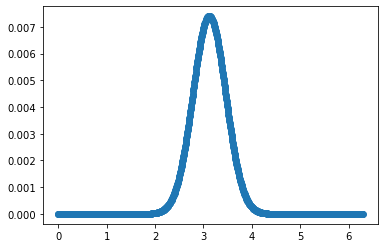

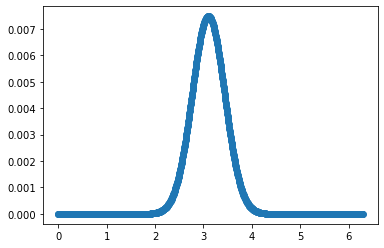

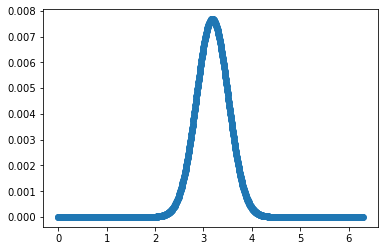

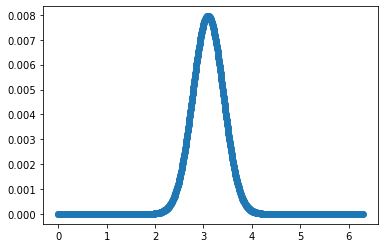

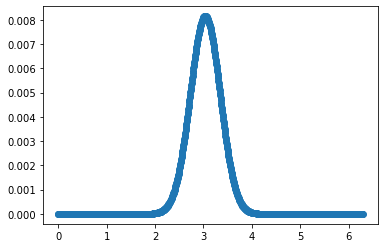

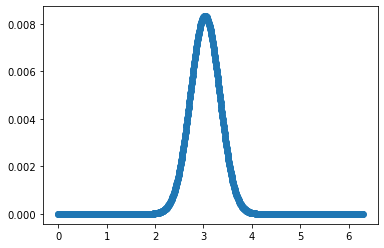

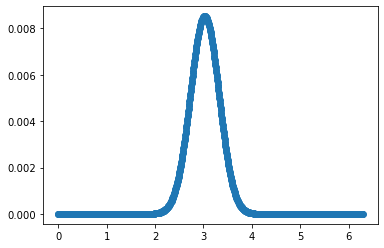

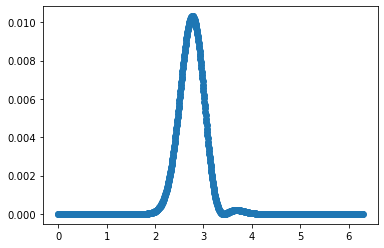

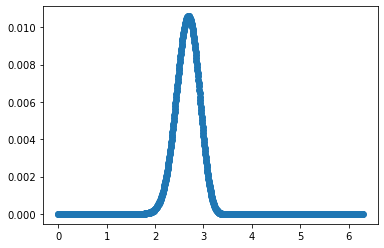

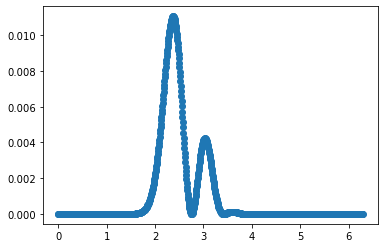

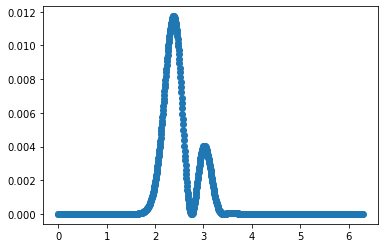

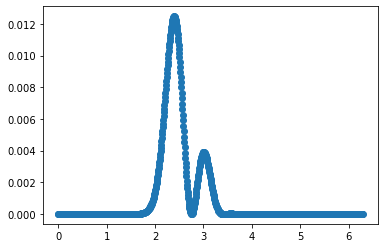

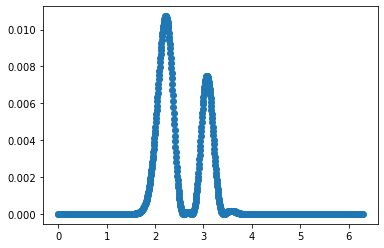

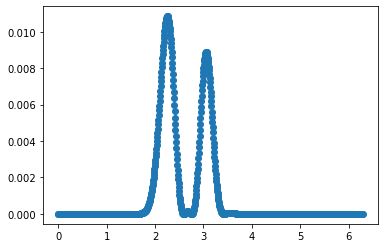

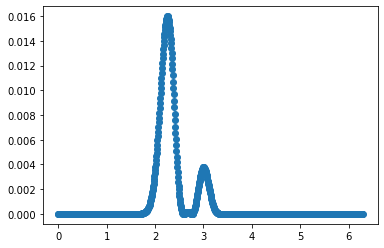

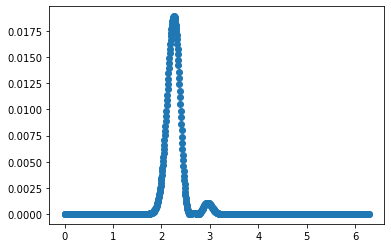

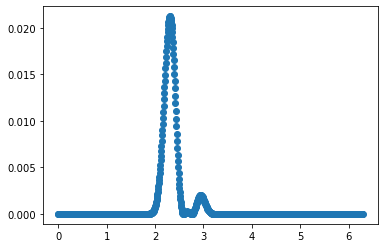

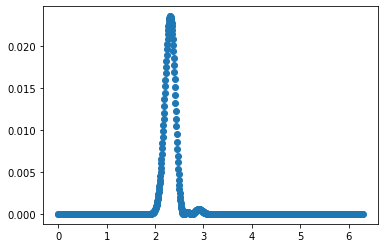

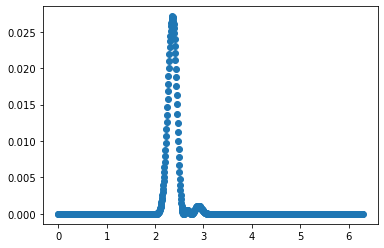

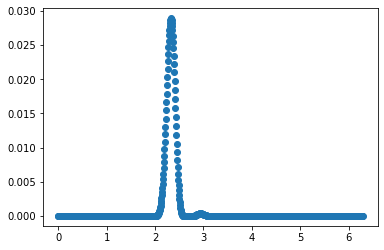

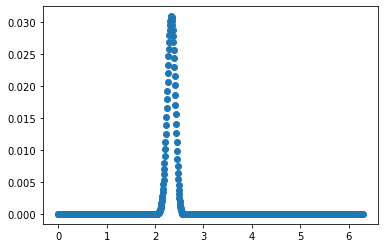

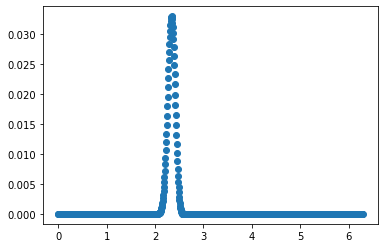

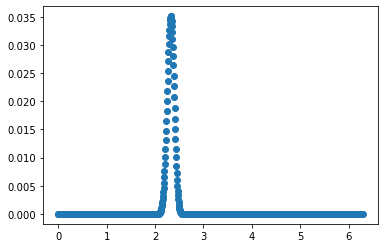

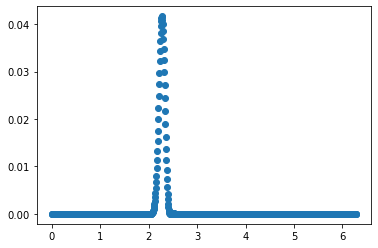

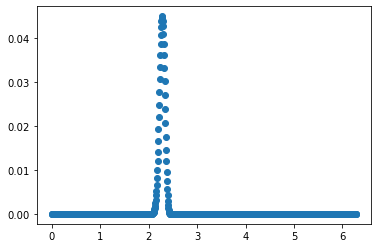

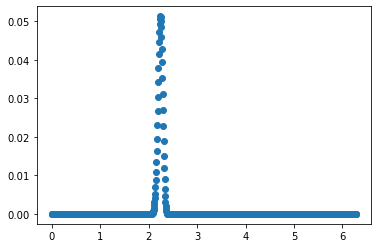

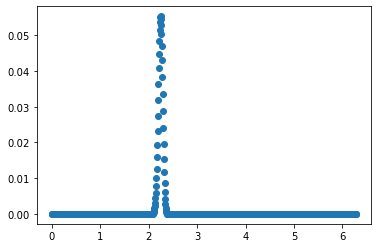

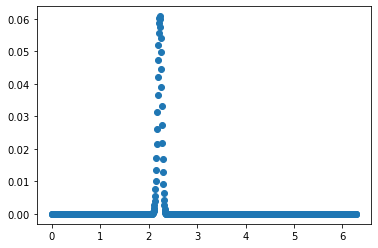

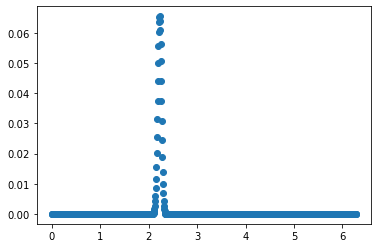

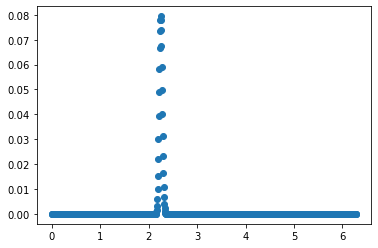

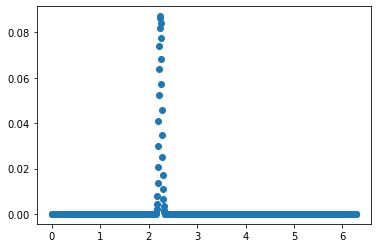

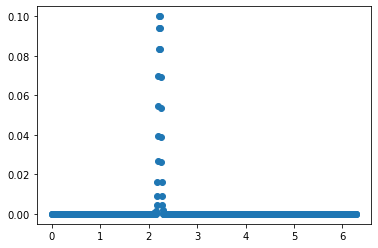

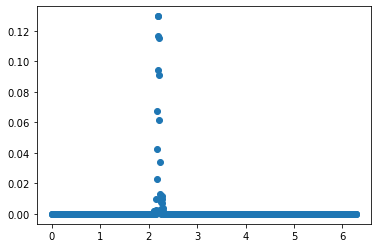

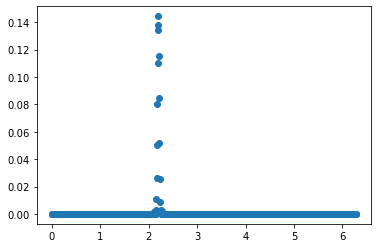

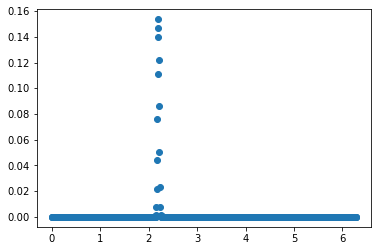

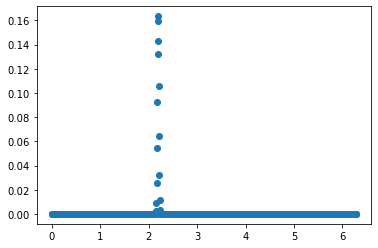

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [01:20<00:43,  6.16s/it]

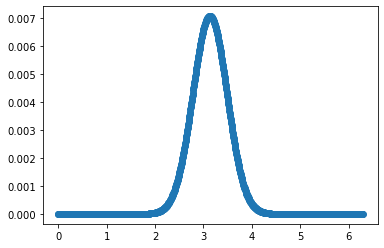

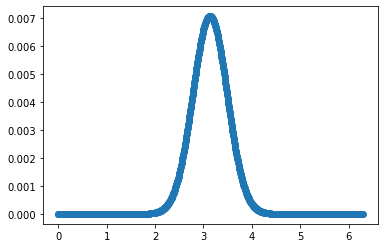

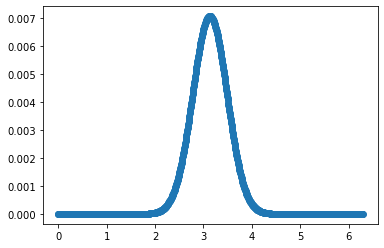

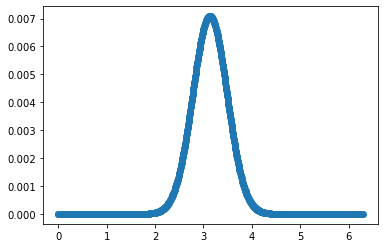

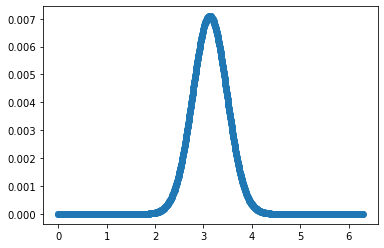

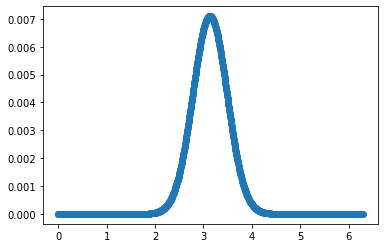

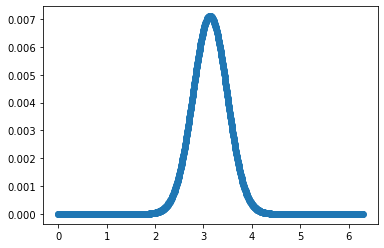

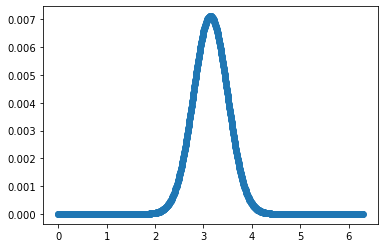

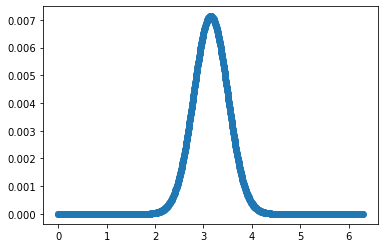

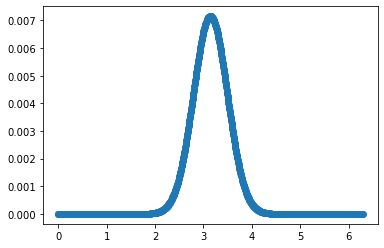

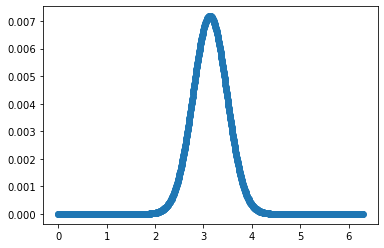

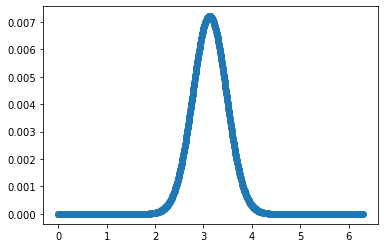

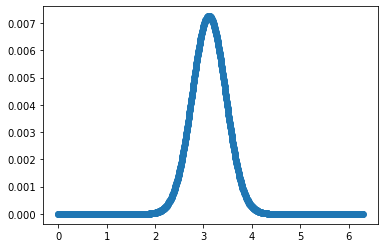

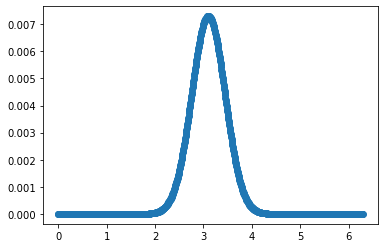

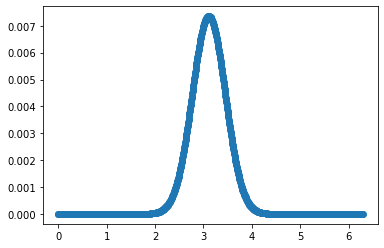

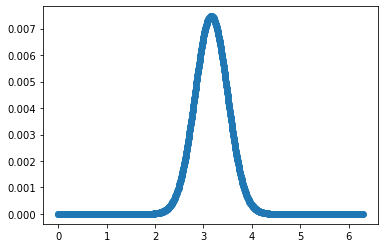

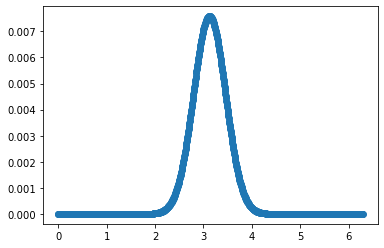

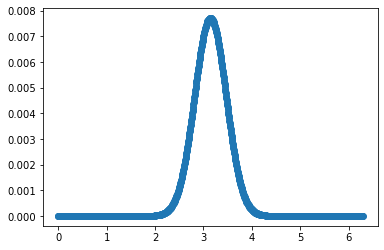

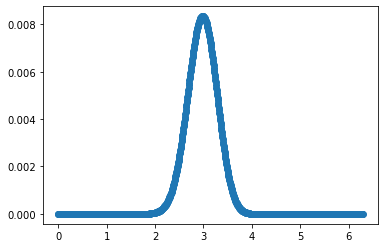

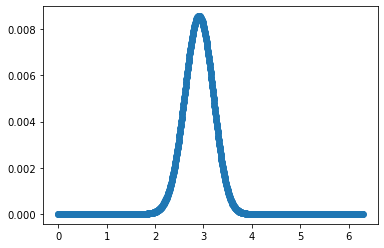

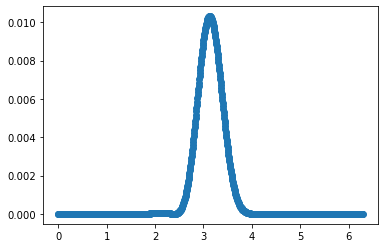

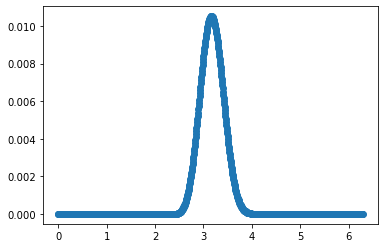

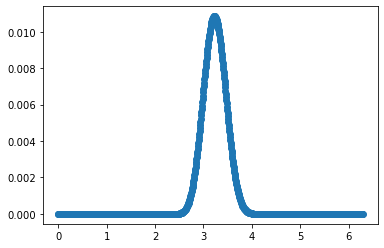

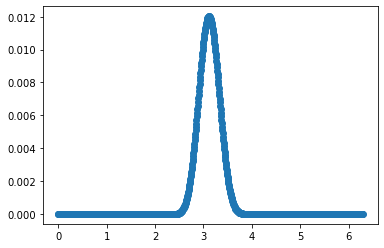

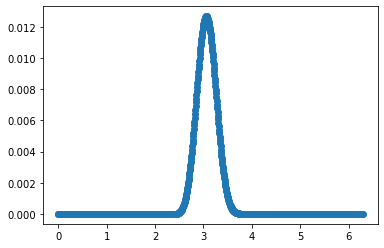

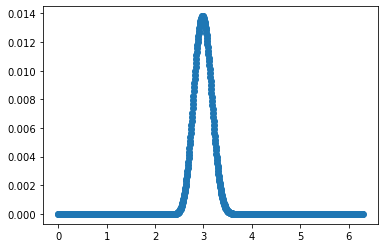

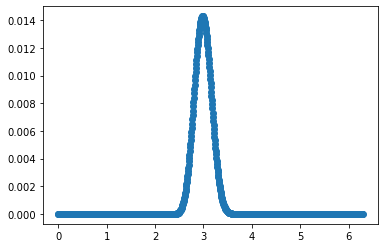

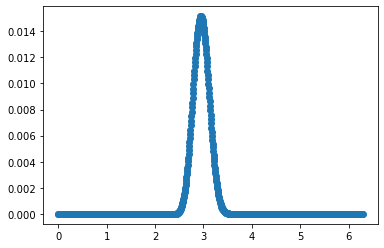

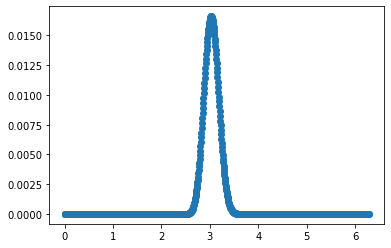

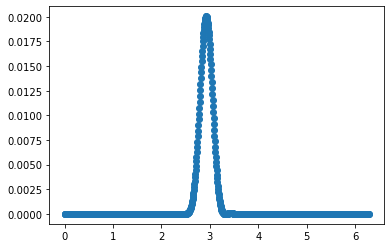

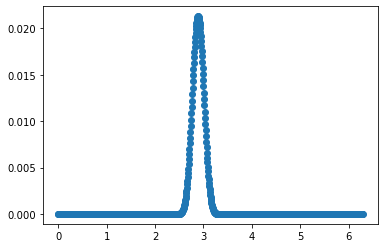

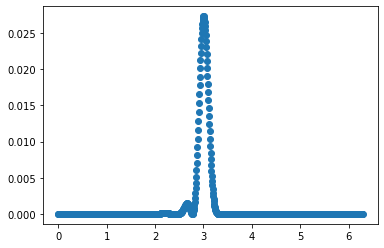

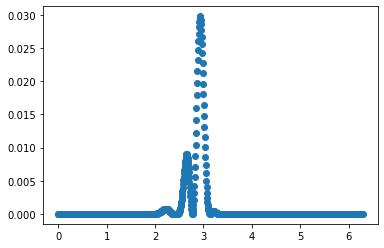

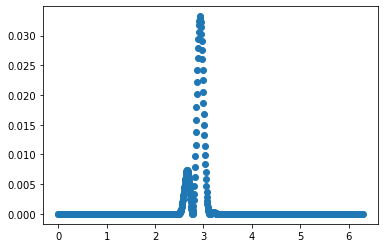

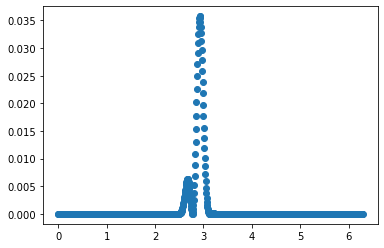

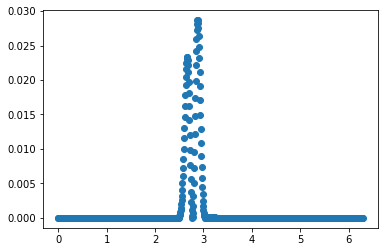

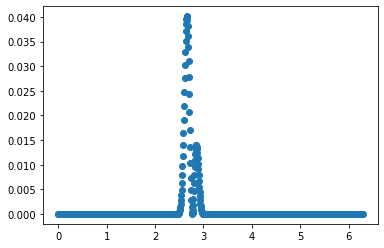

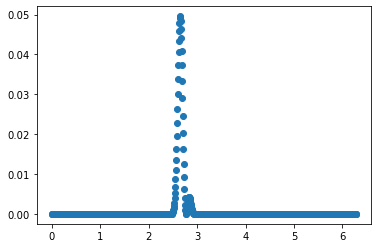

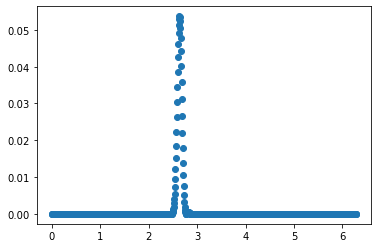

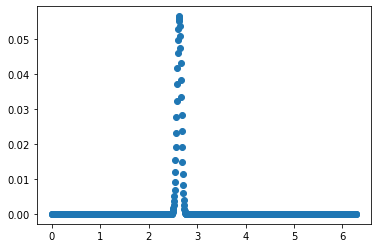

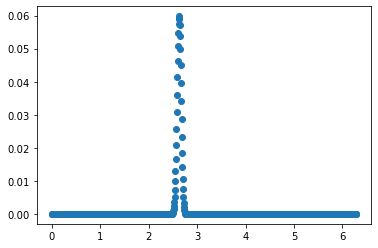

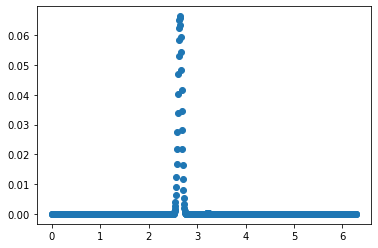

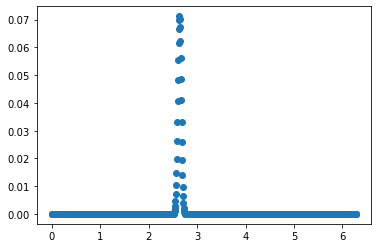

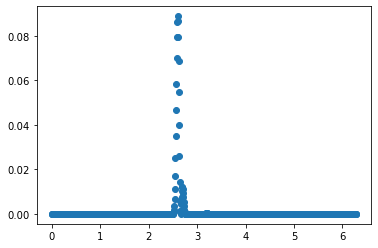

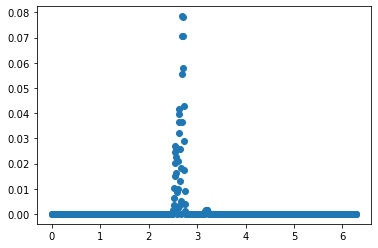

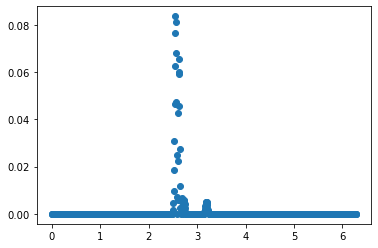

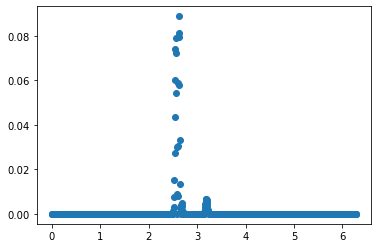

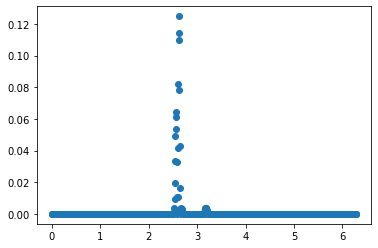

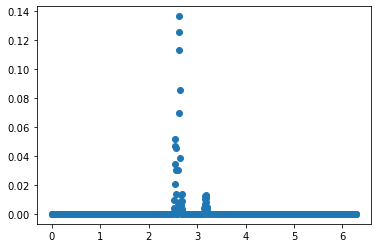

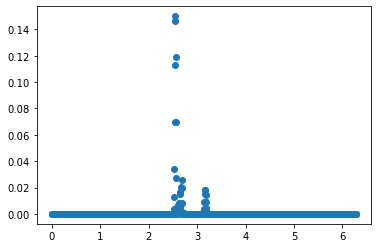

 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [01:26<00:36,  6.16s/it]

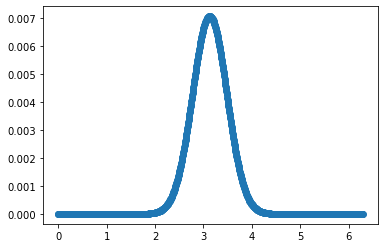

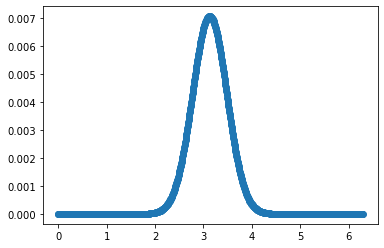

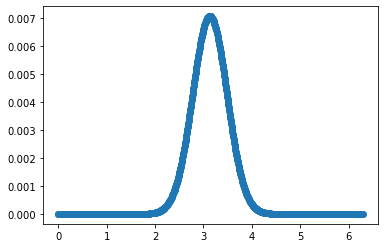

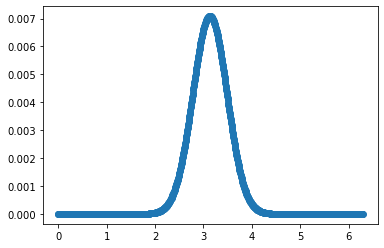

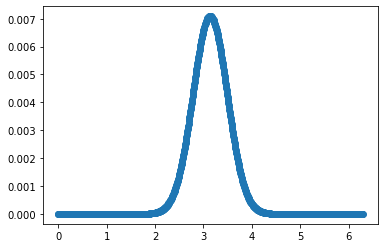

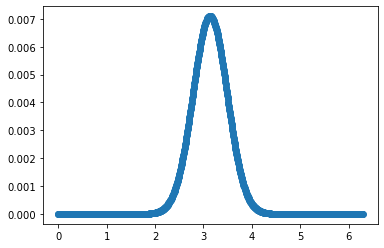

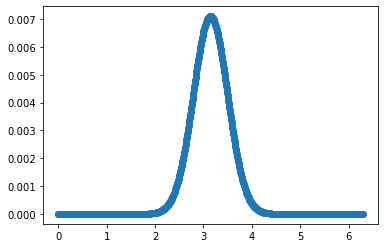

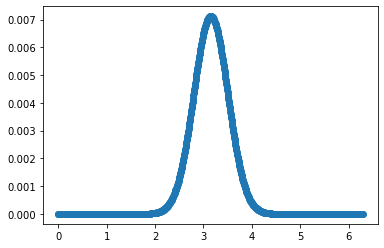

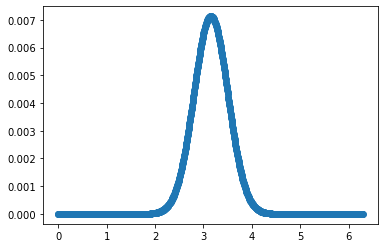

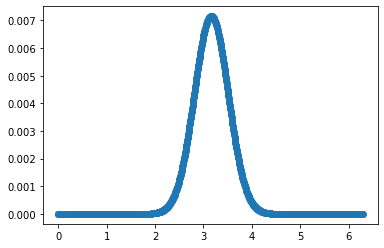

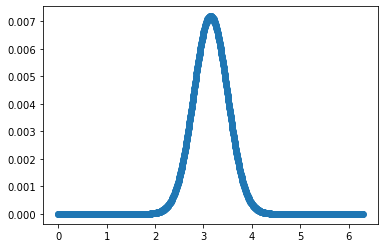

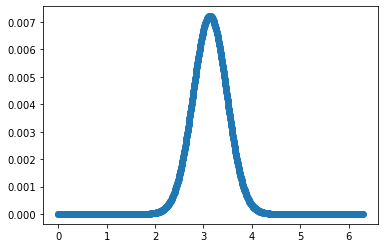

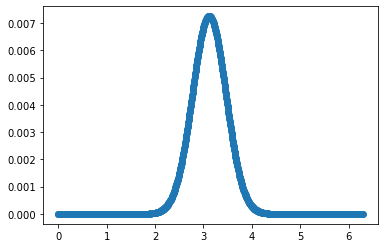

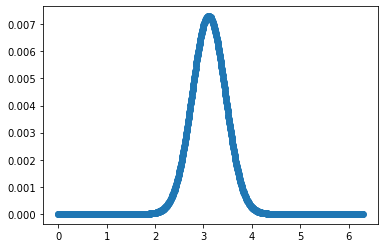

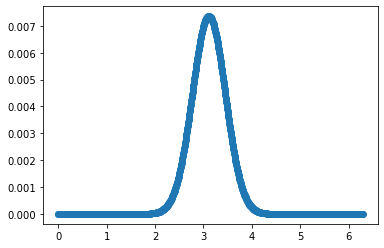

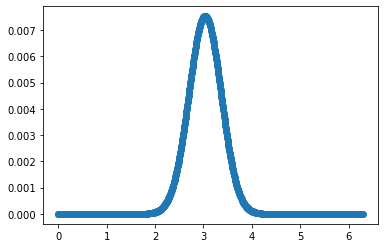

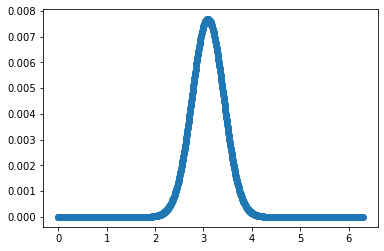

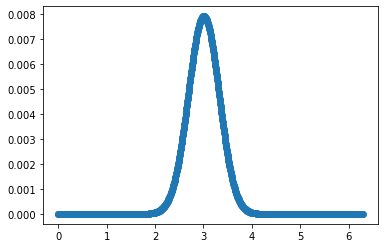

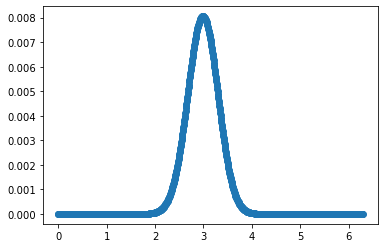

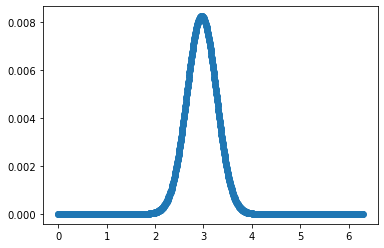

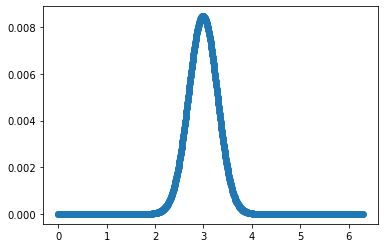

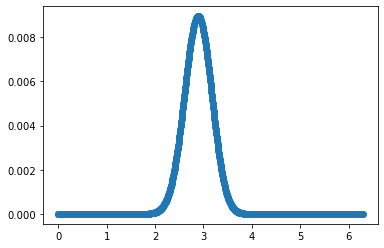

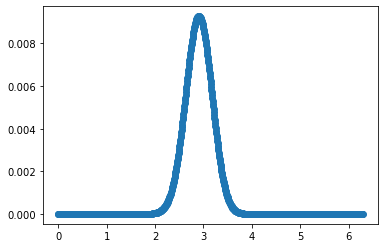

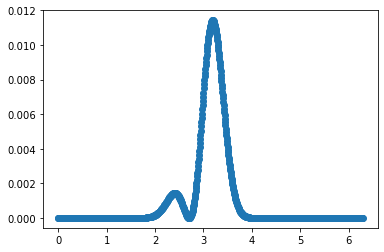

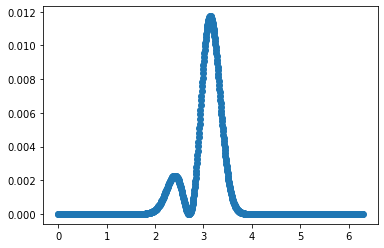

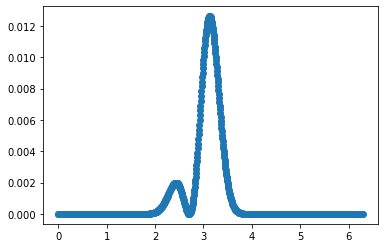

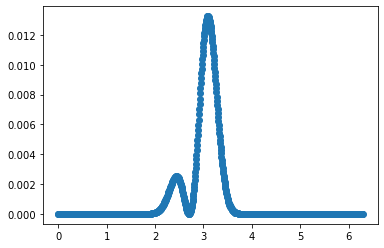

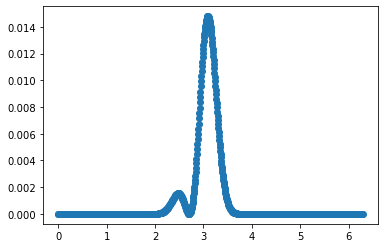

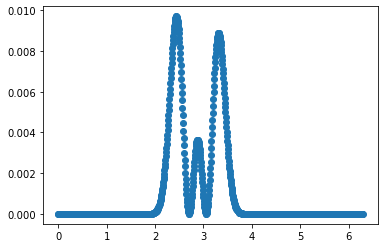

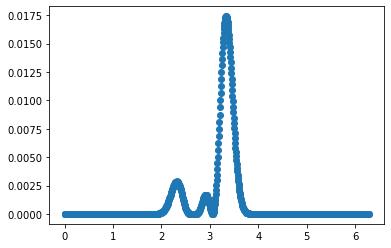

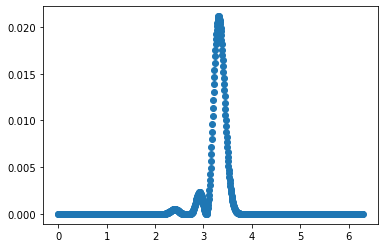

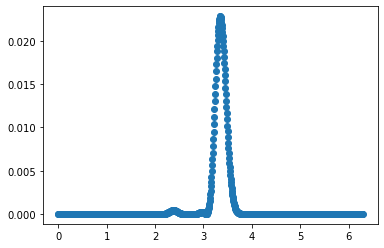

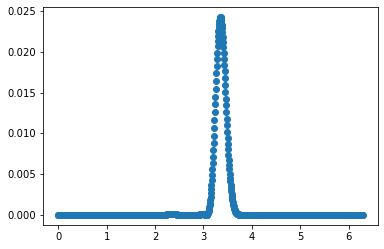

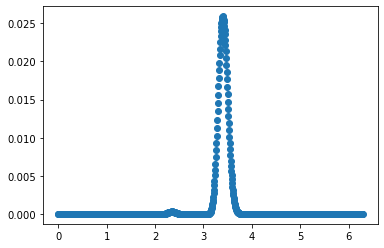

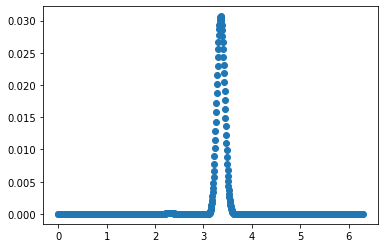

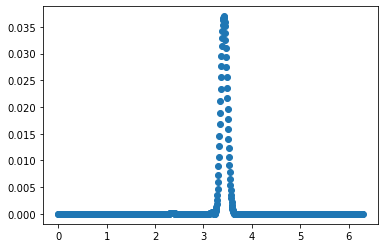

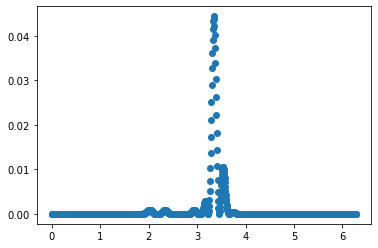

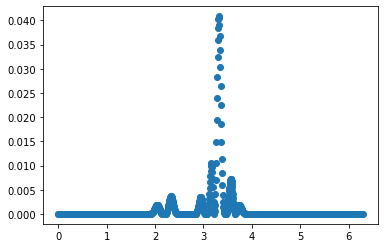

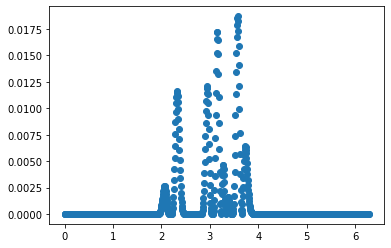

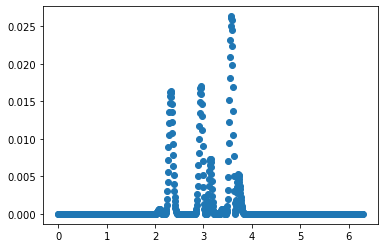

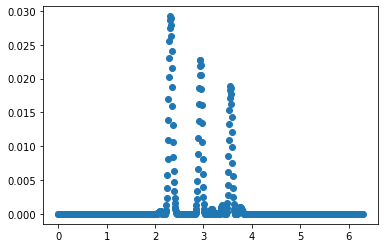

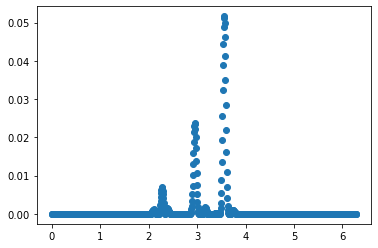

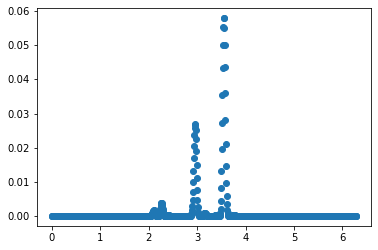

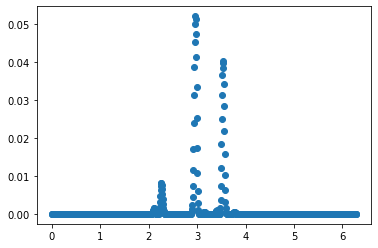

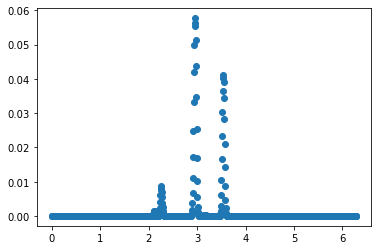

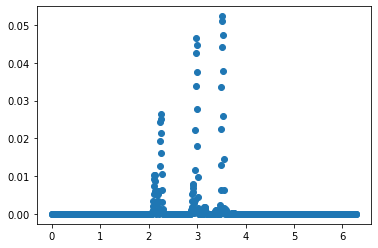

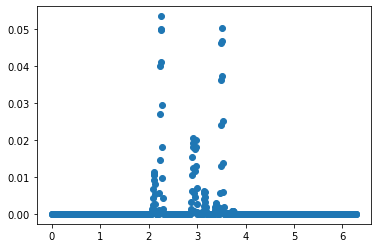

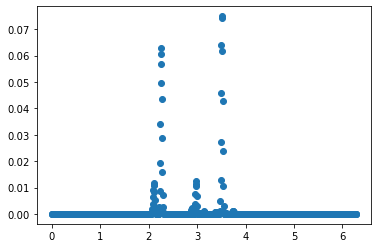

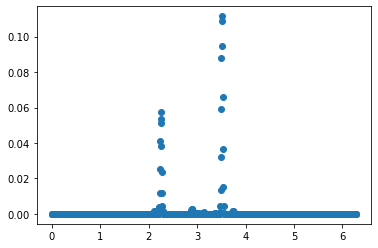

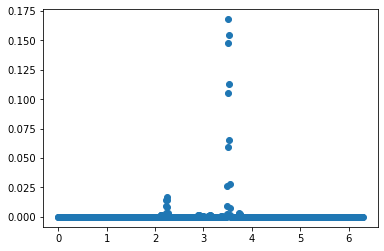

 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [01:32<00:30,  6.16s/it]

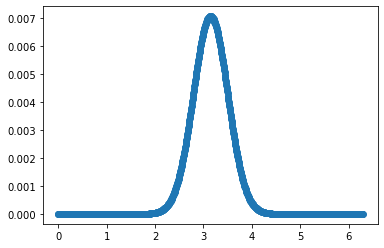

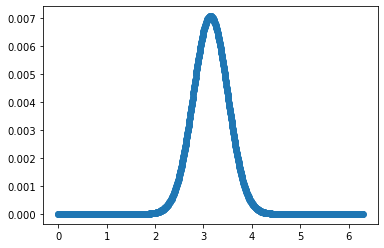

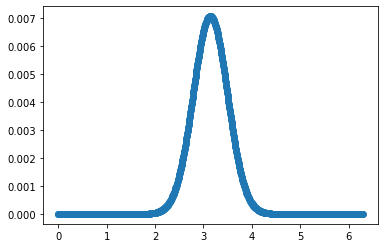

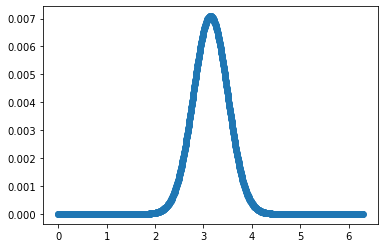

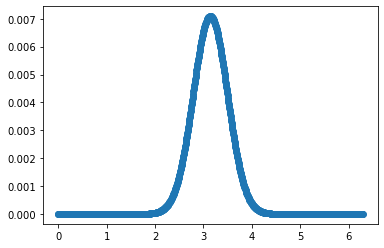

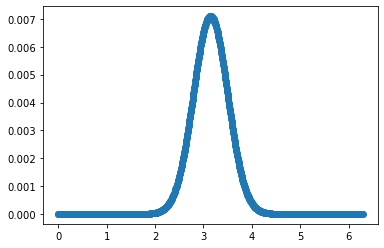

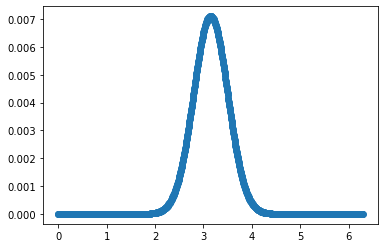

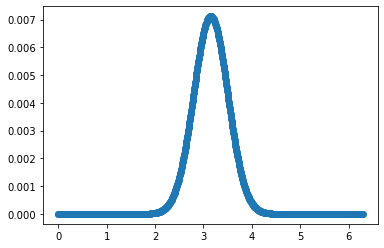

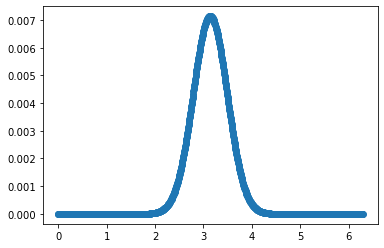

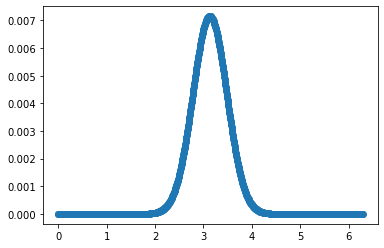

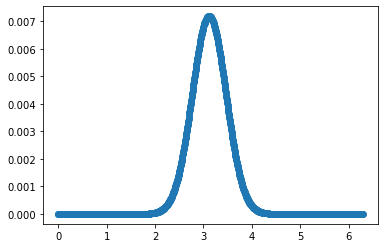

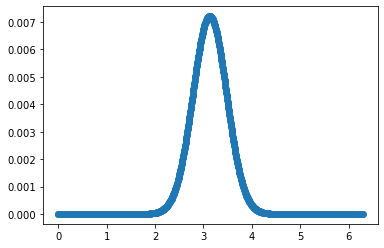

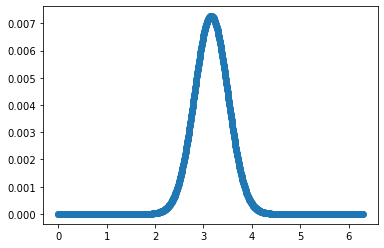

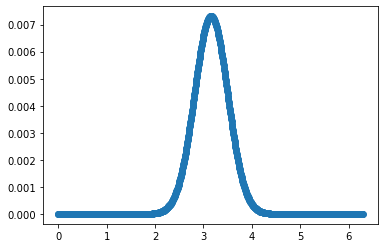

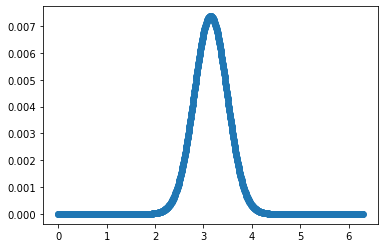

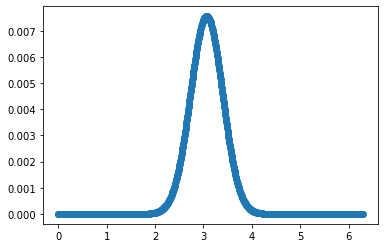

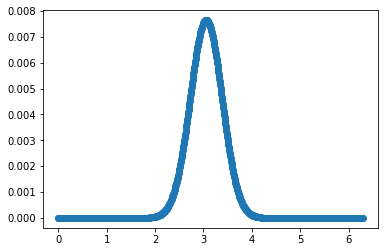

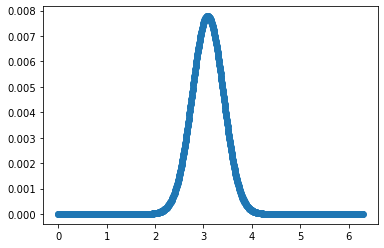

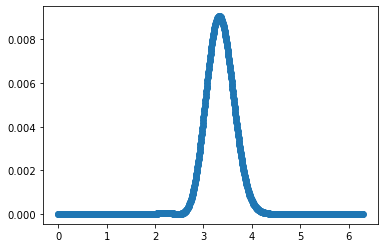

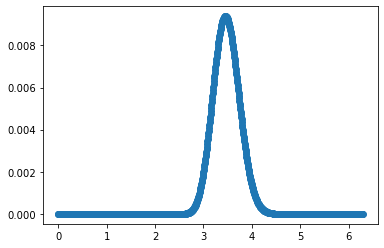

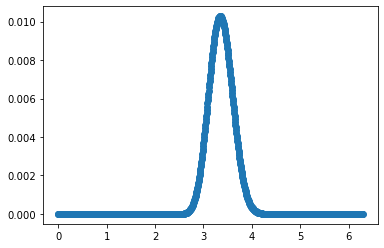

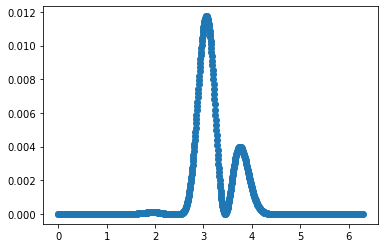

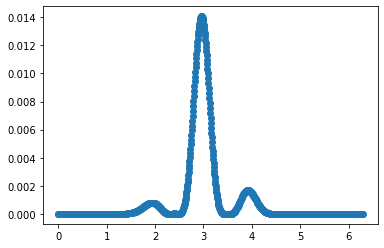

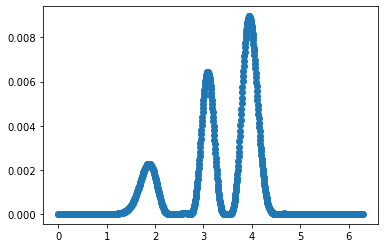

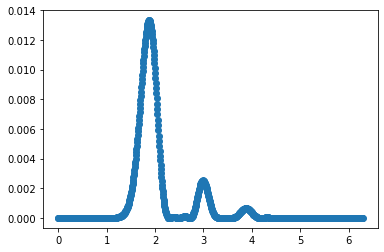

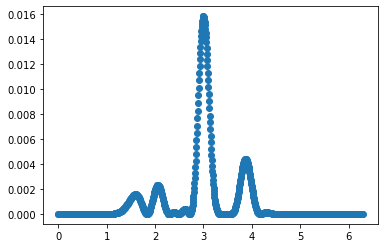

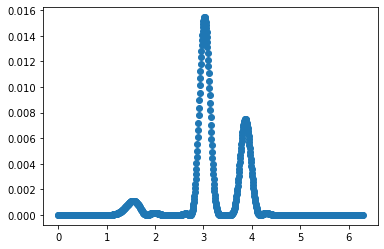

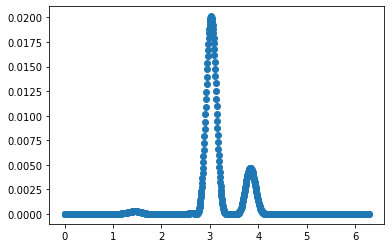

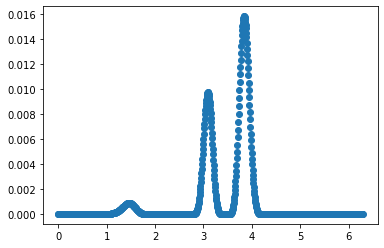

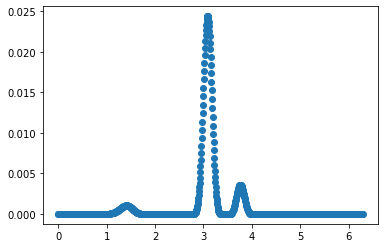

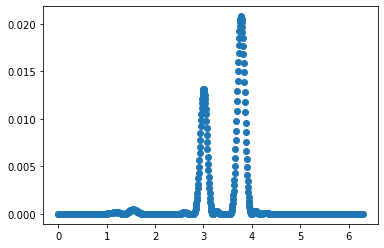

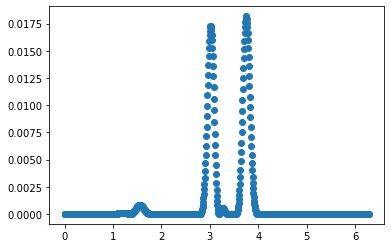

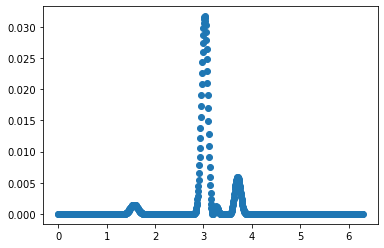

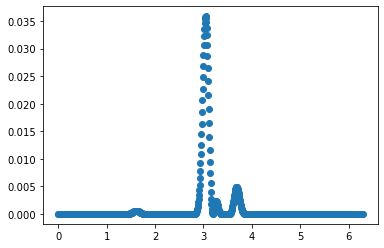

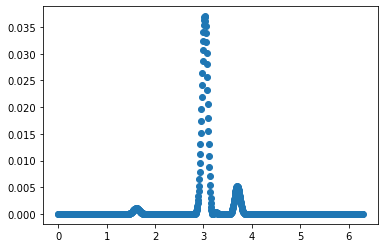

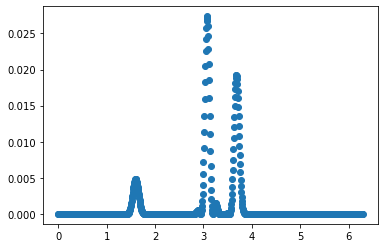

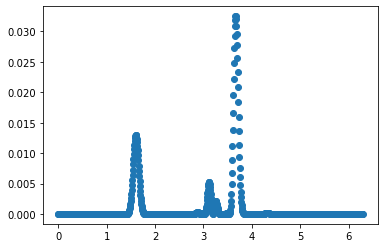

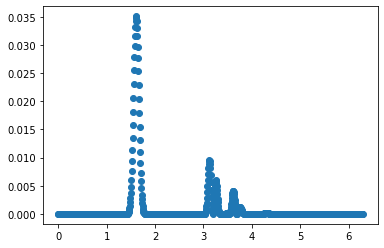

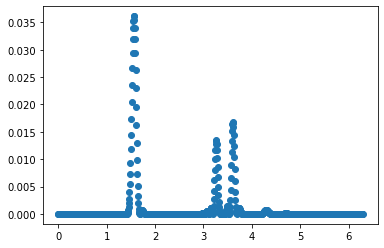

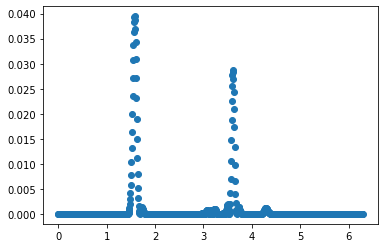

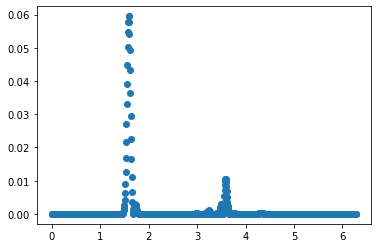

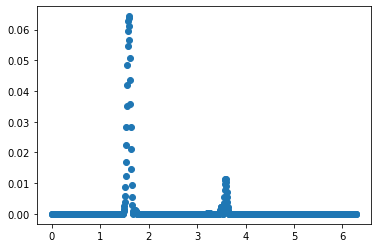

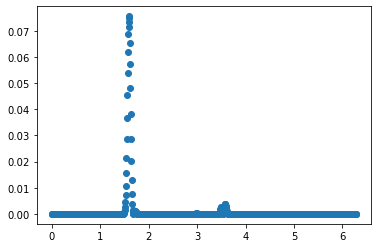

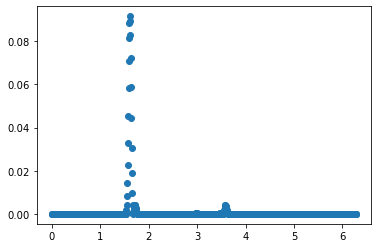

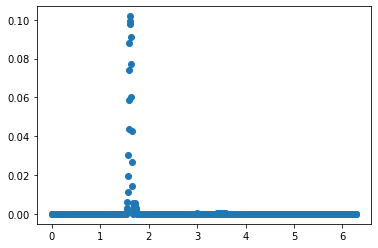

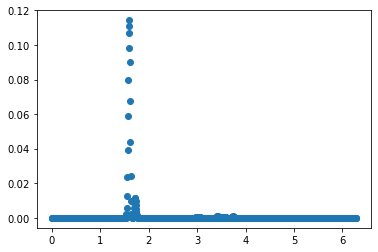

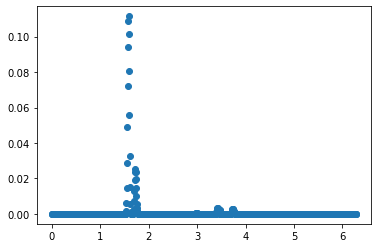

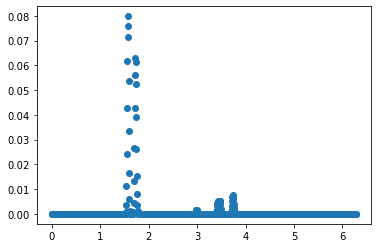

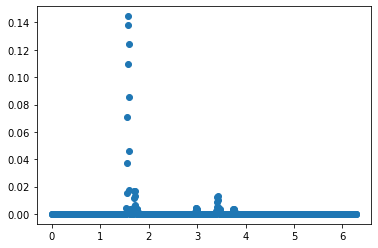

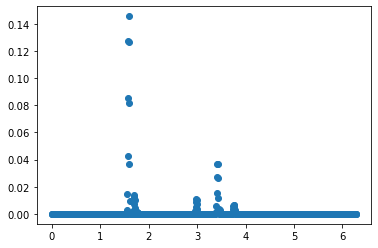

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [01:38<00:24,  6.22s/it]

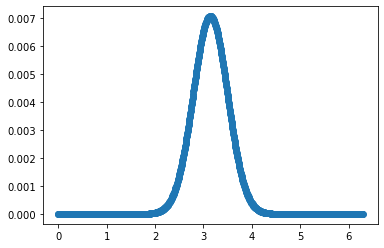

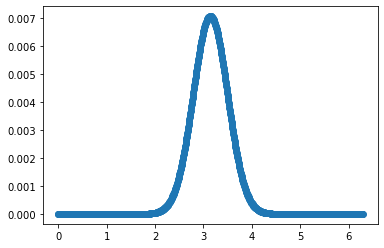

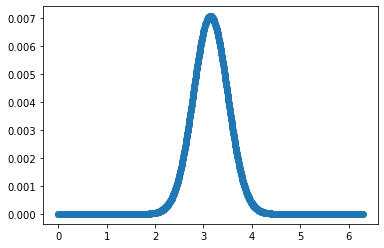

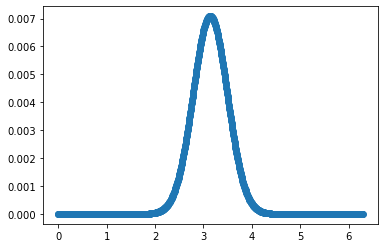

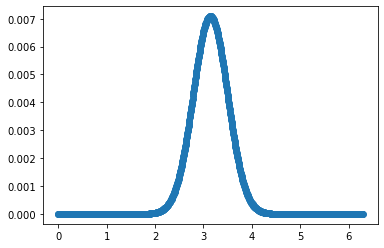

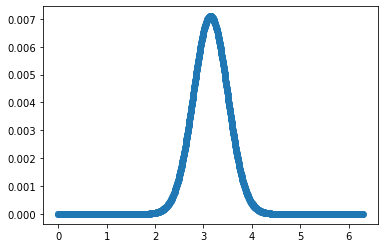

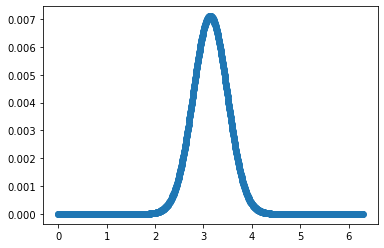

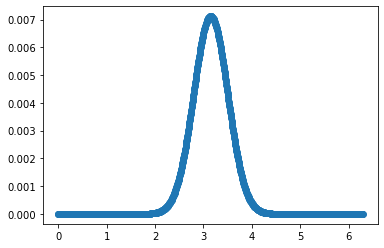

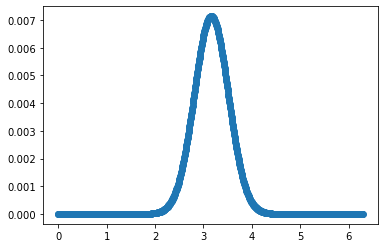

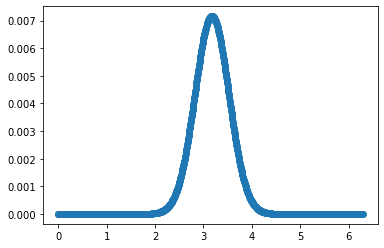

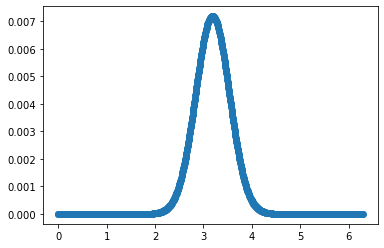

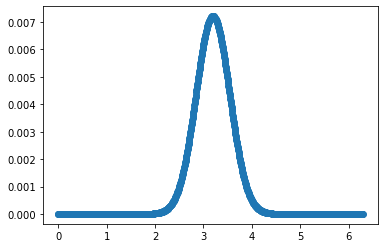

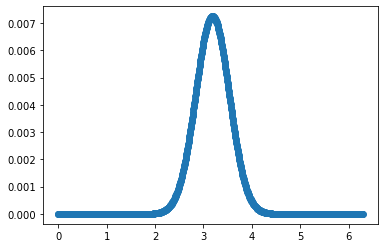

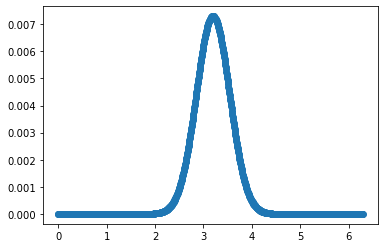

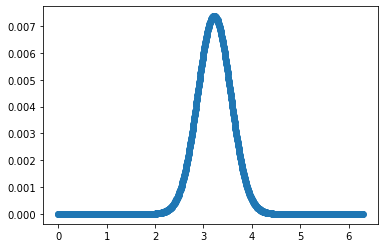

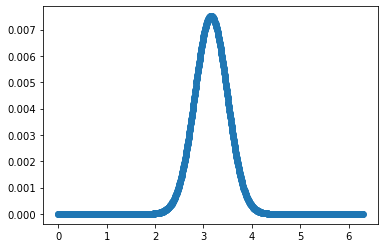

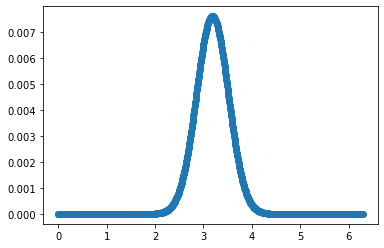

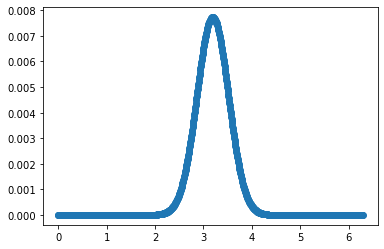

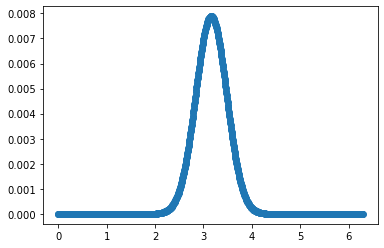

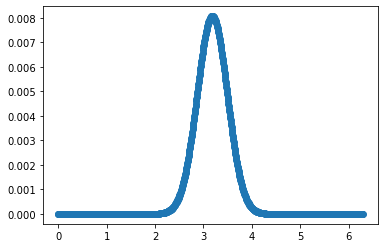

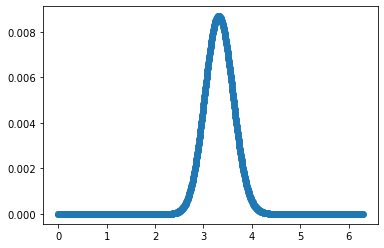

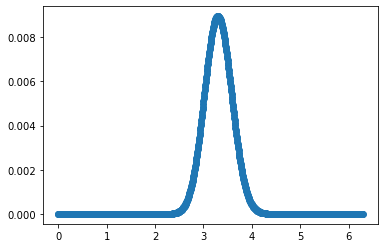

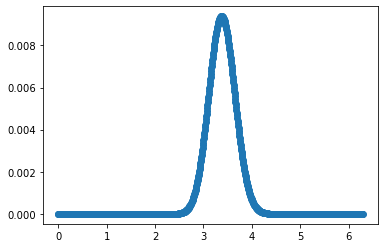

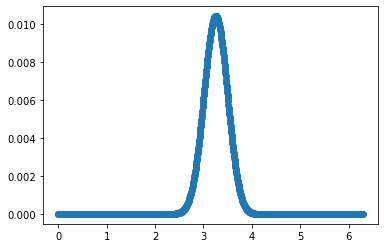

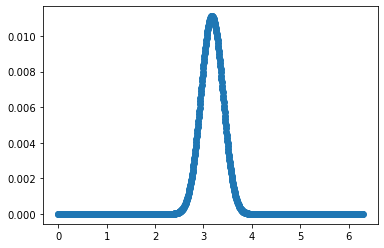

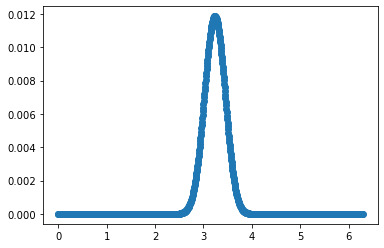

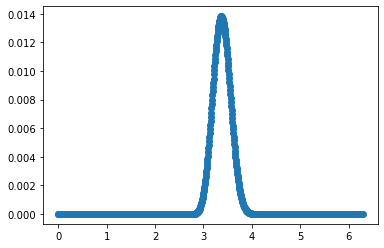

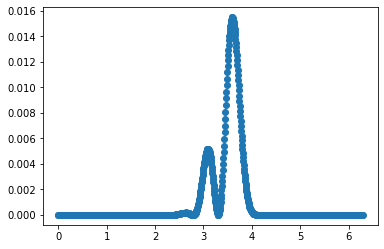

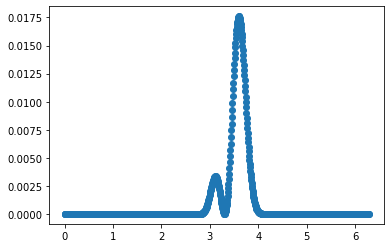

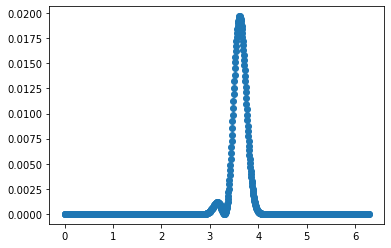

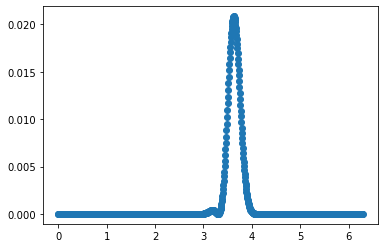

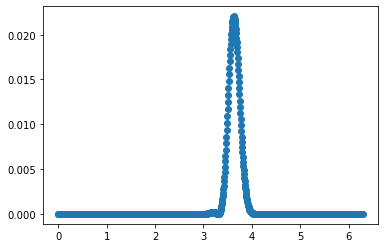

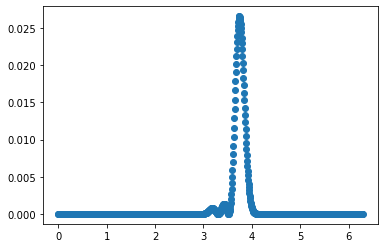

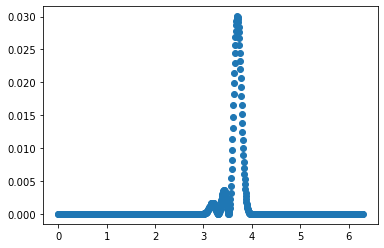

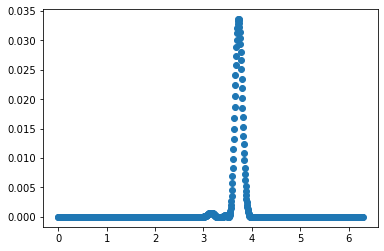

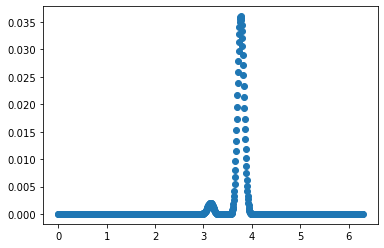

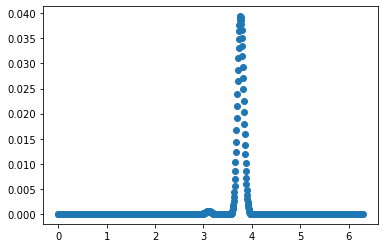

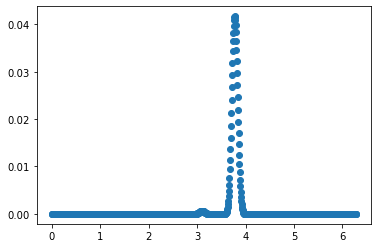

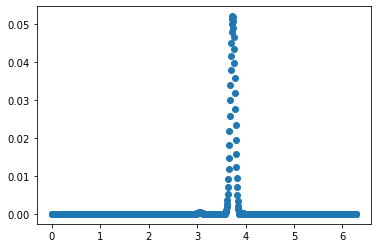

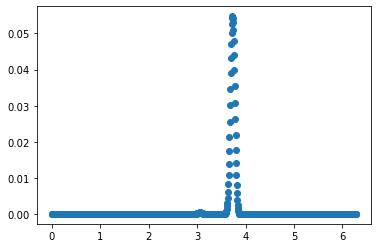

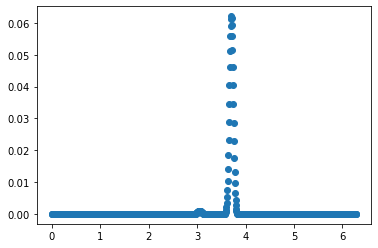

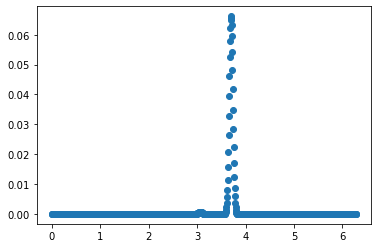

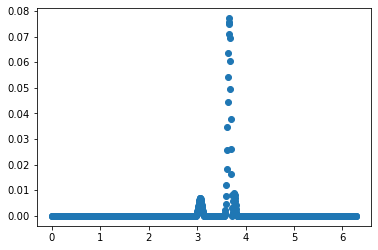

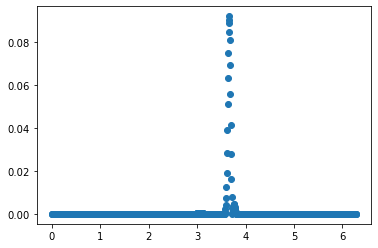

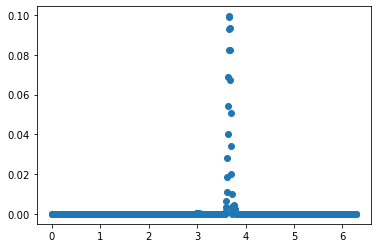

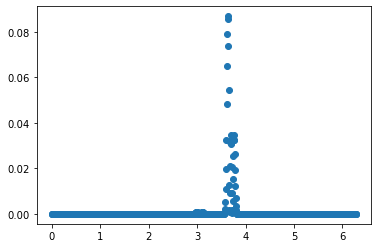

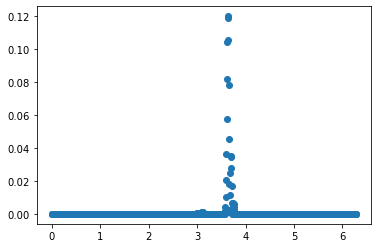

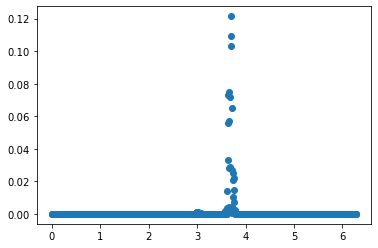

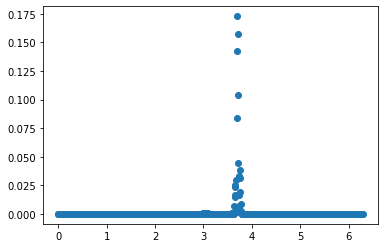

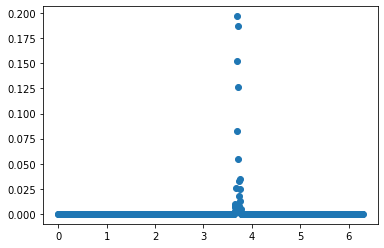

 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [01:44<00:18,  6.20s/it]

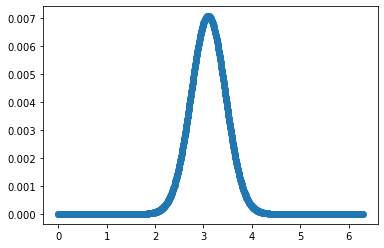

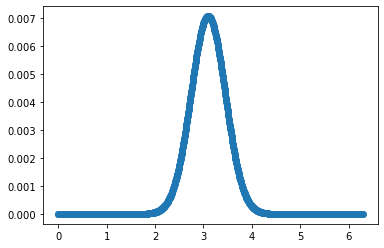

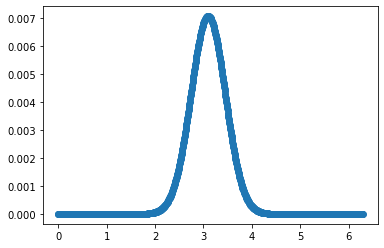

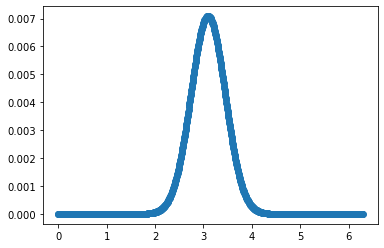

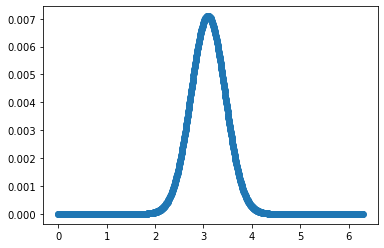

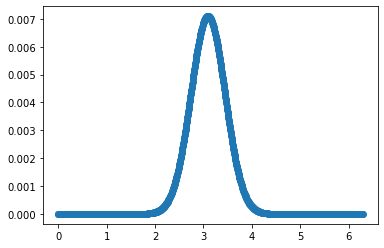

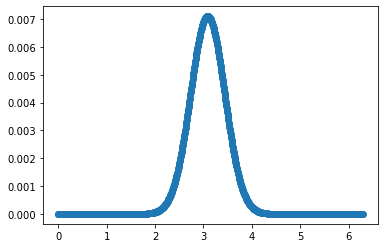

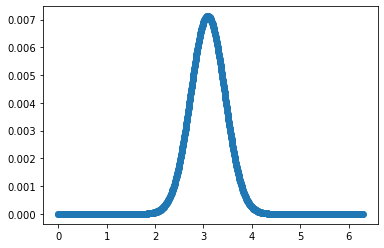

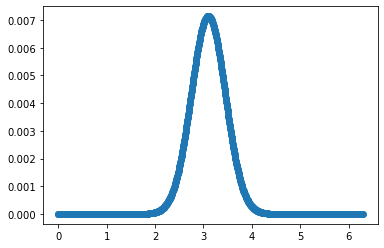

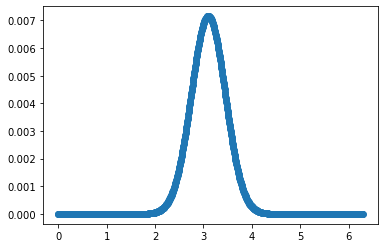

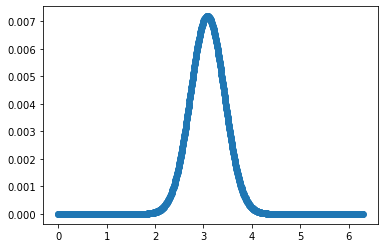

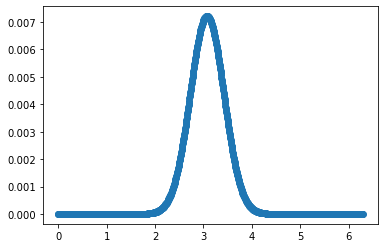

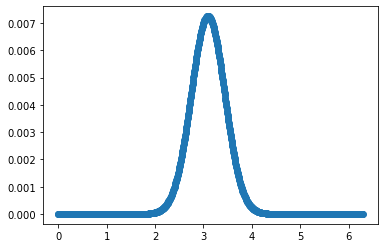

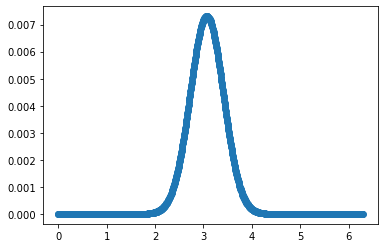

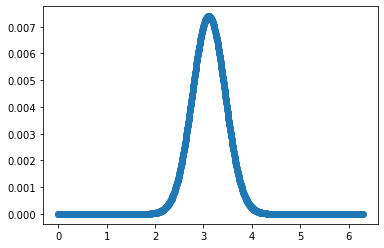

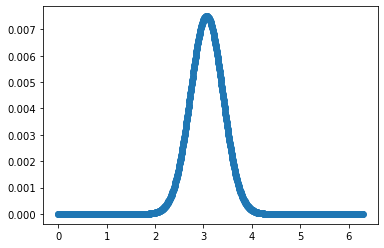

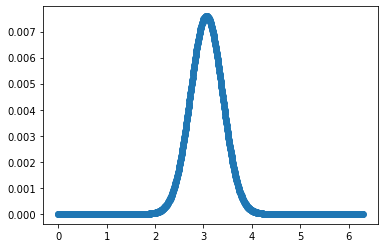

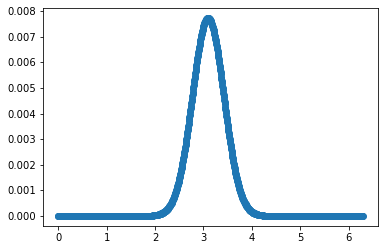

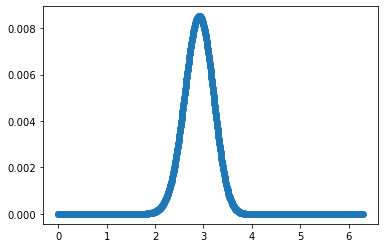

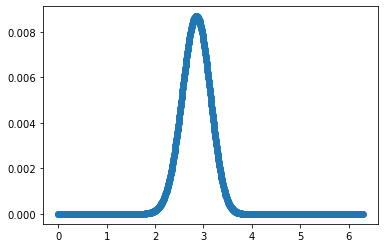

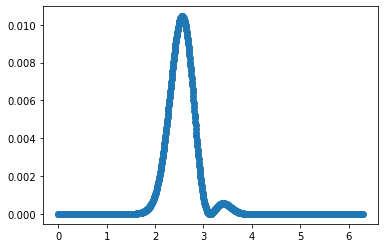

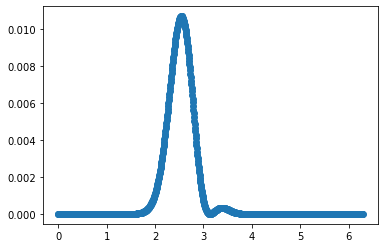

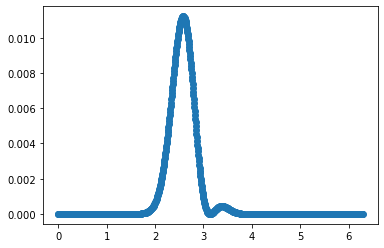

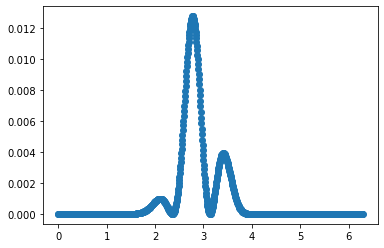

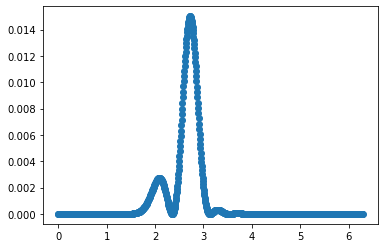

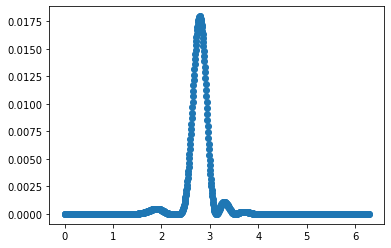

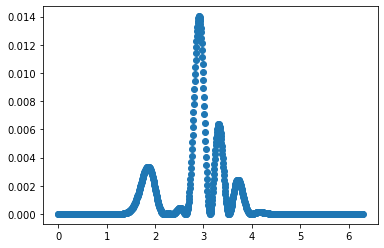

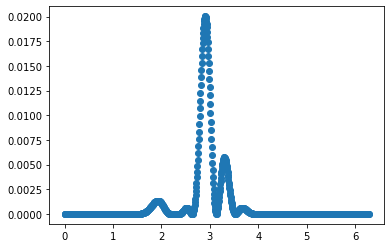

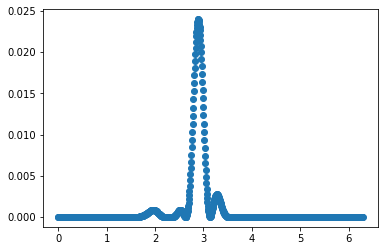

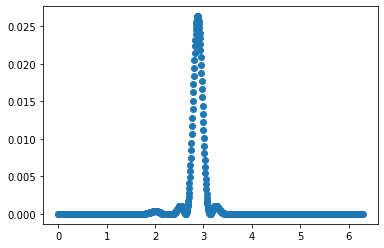

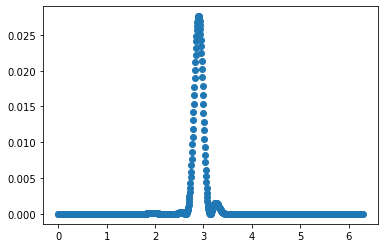

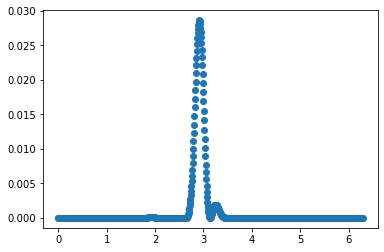

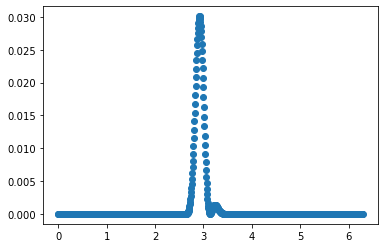

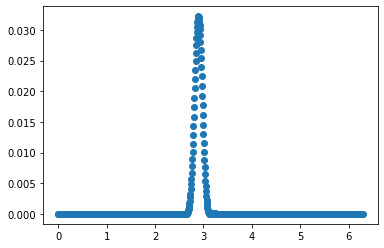

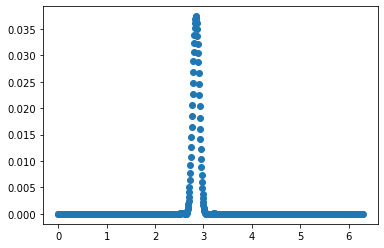

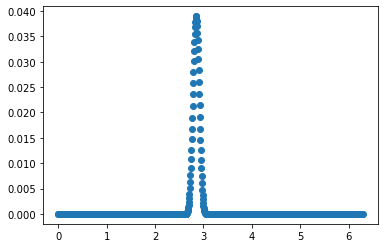

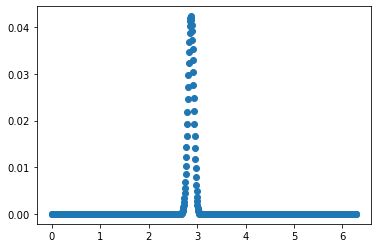

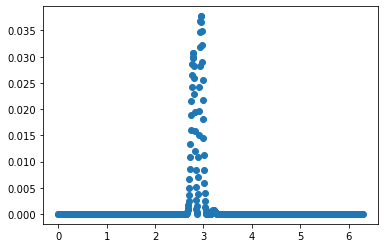

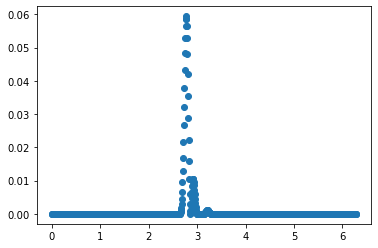

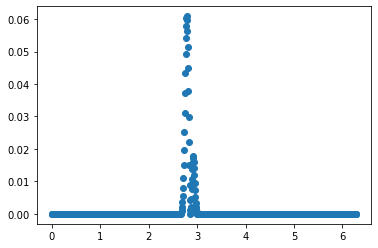

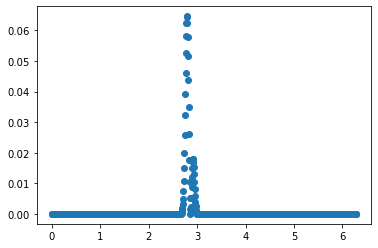

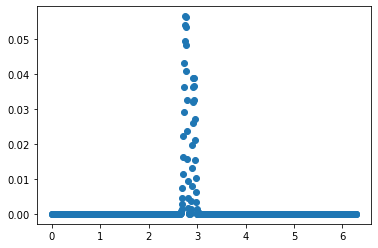

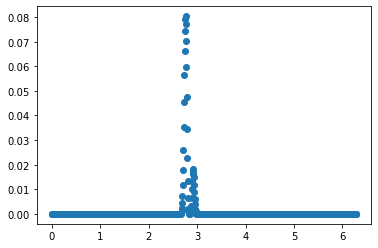

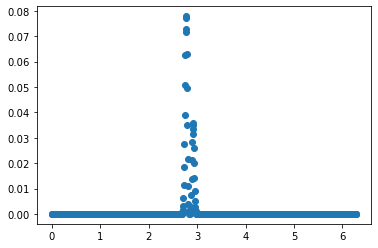

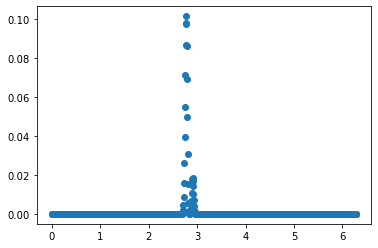

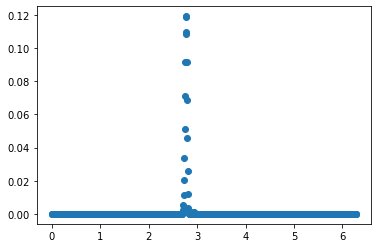

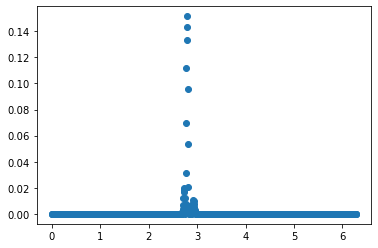

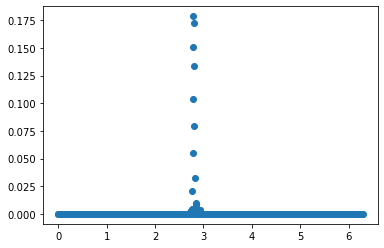

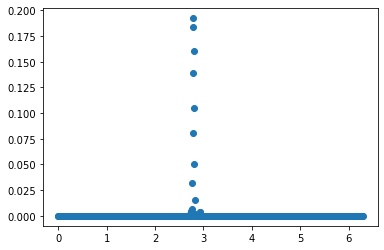

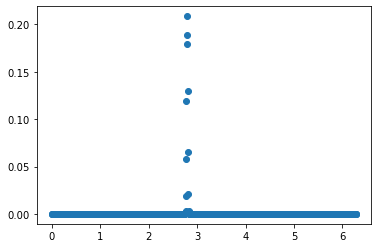

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [01:51<00:12,  6.16s/it]

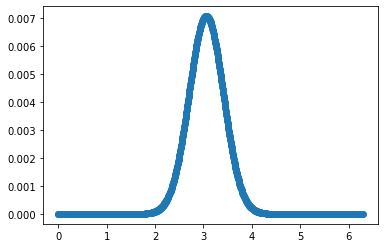

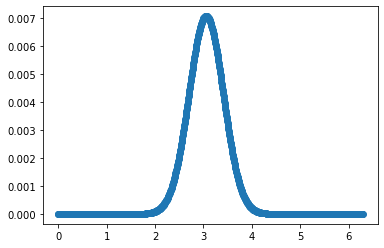

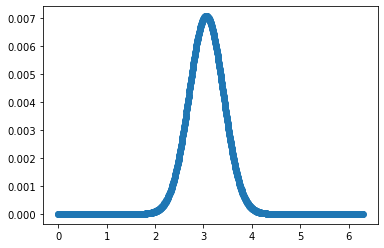

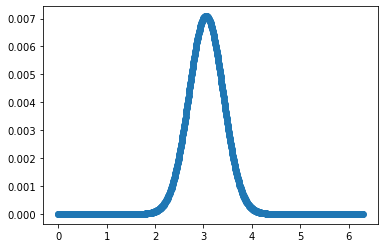

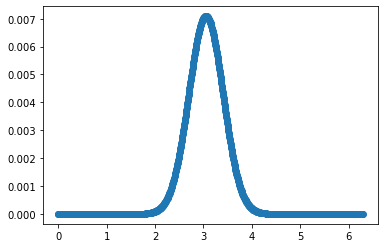

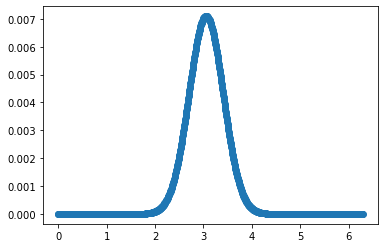

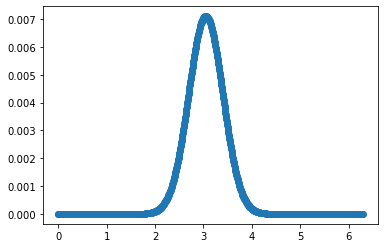

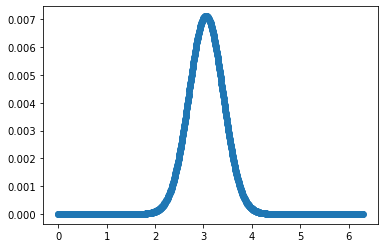

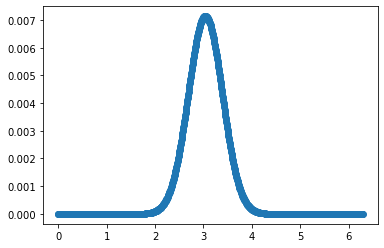

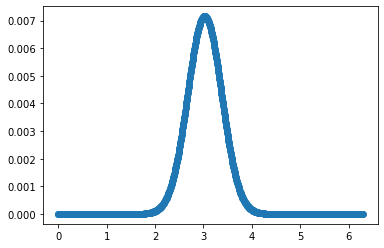

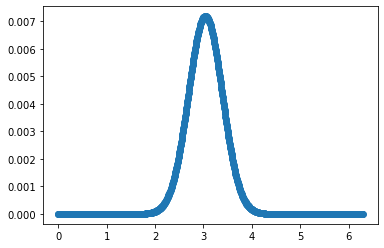

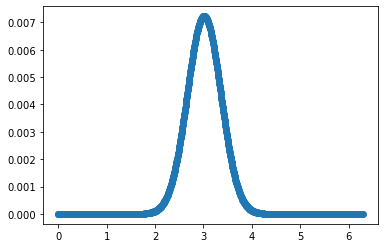

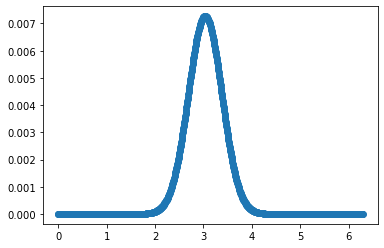

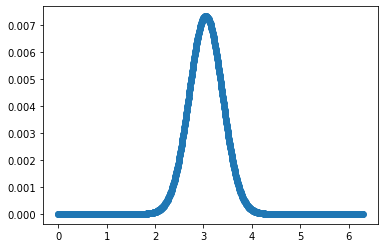

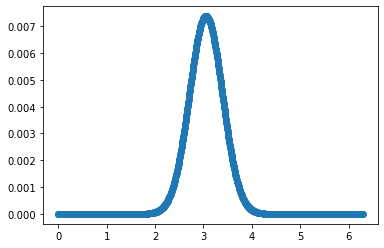

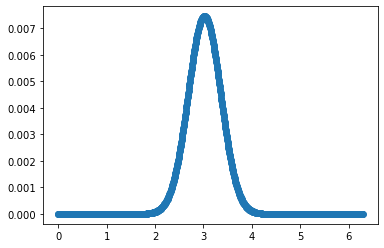

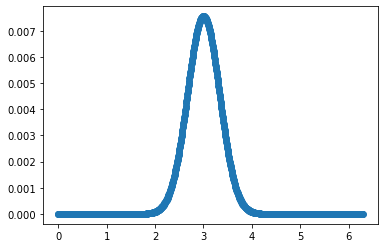

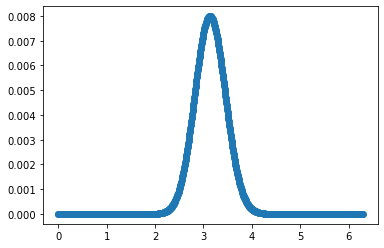

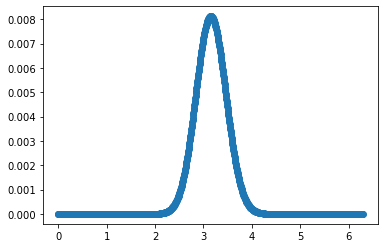

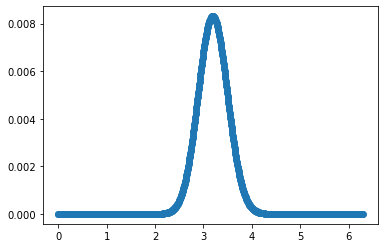

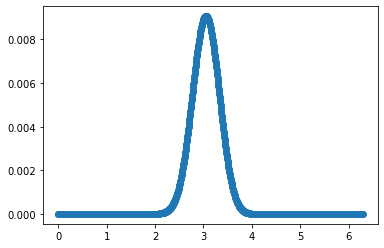

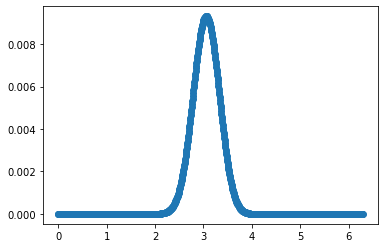

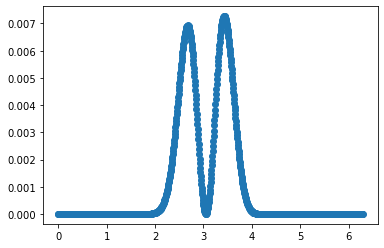

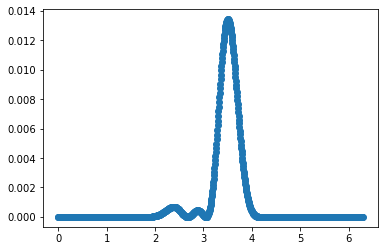

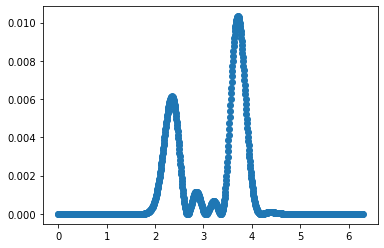

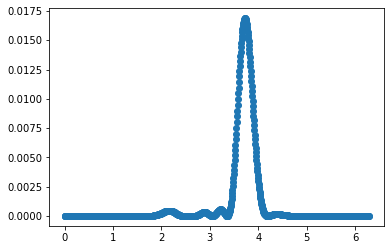

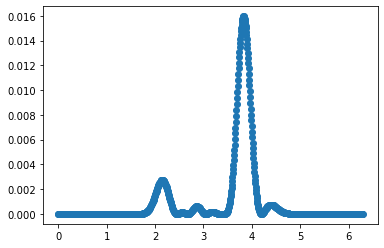

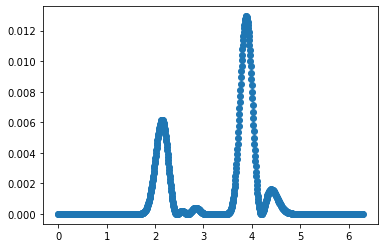

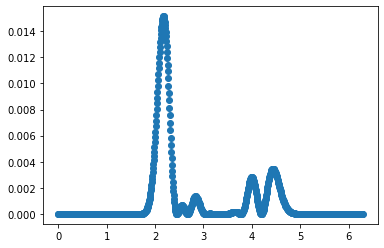

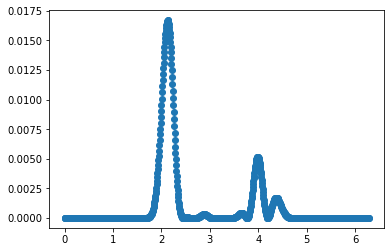

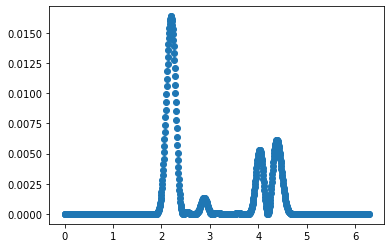

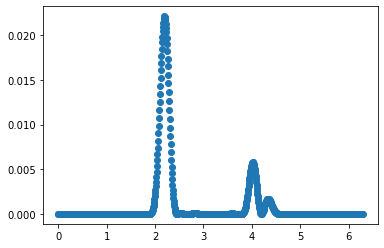

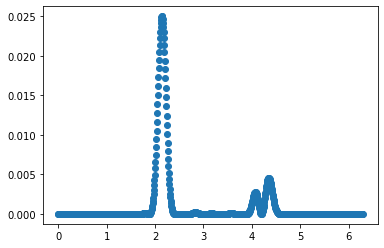

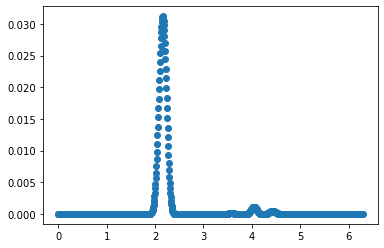

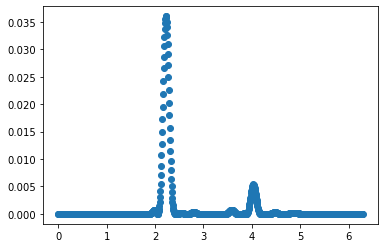

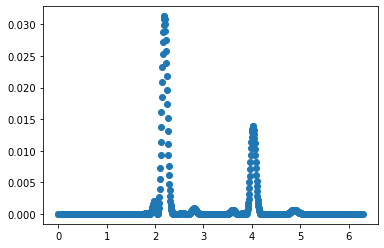

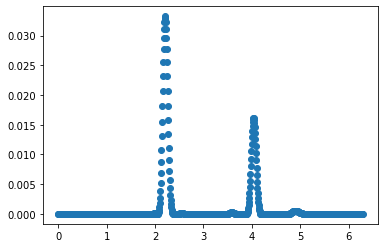

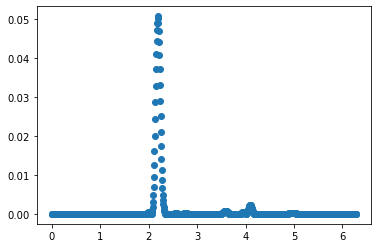

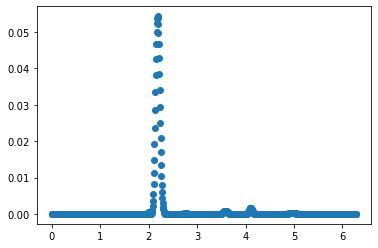

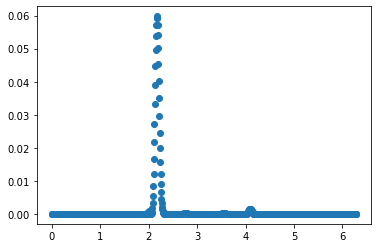

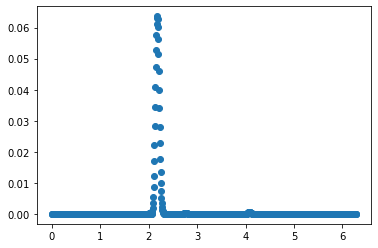

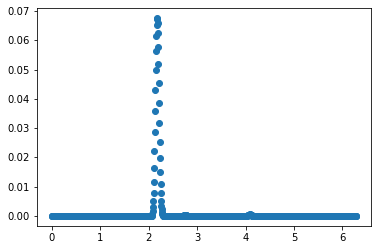

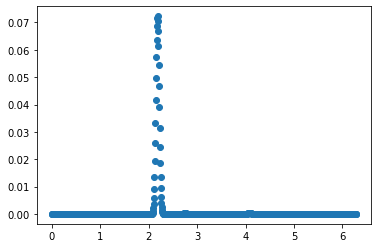

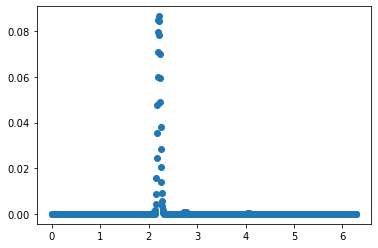

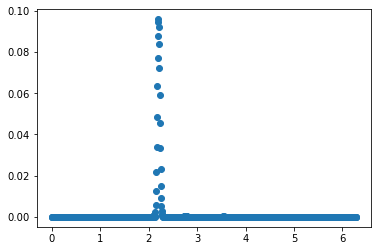

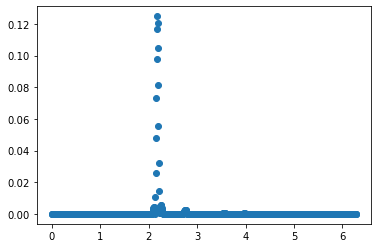

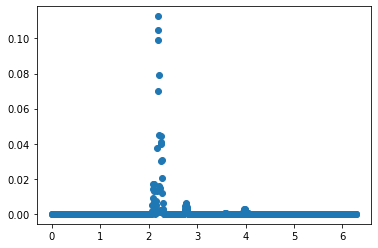

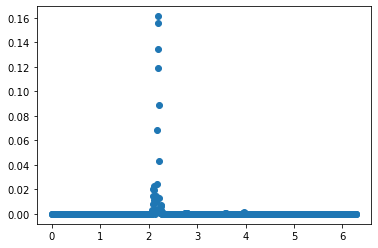

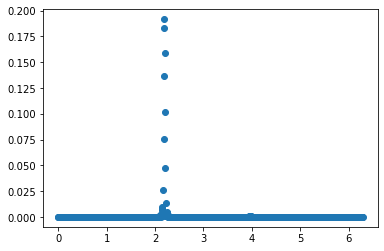

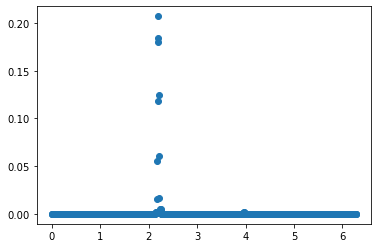

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [01:57<00:06,  6.16s/it]

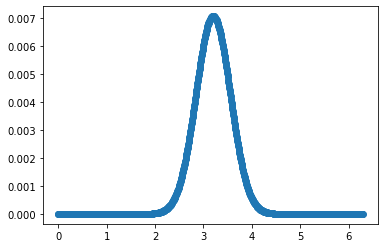

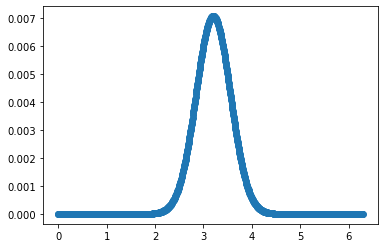

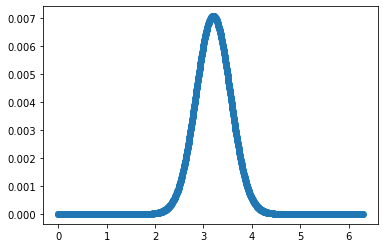

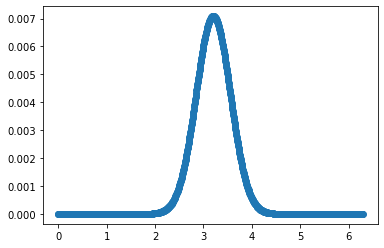

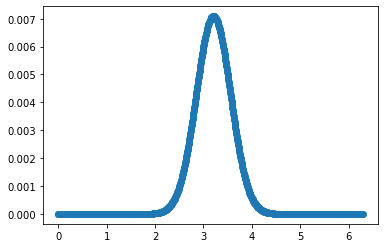

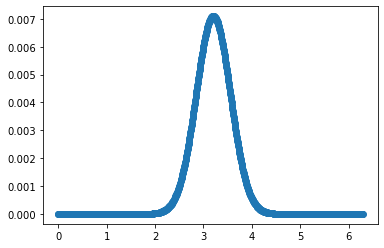

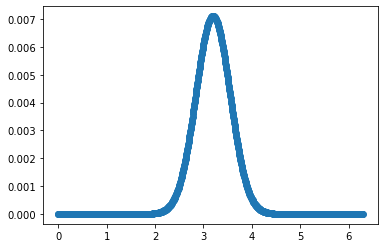

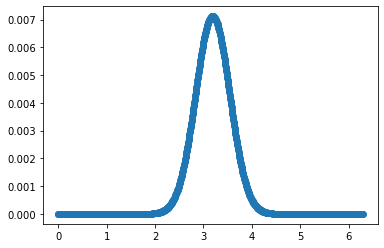

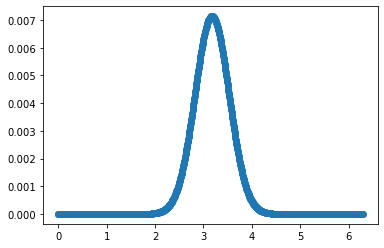

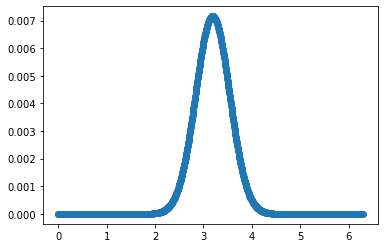

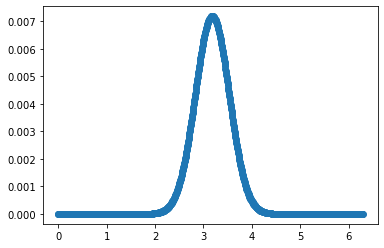

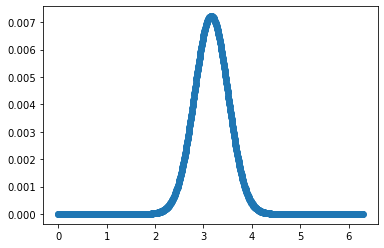

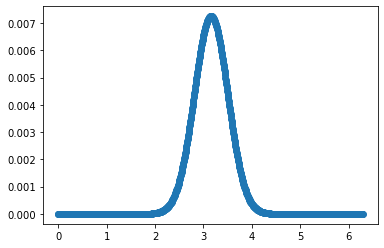

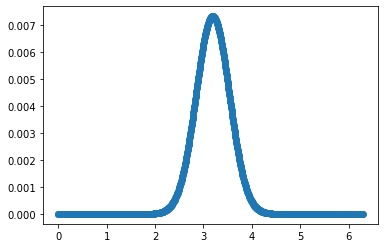

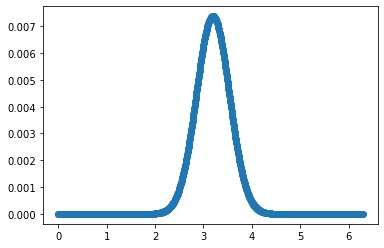

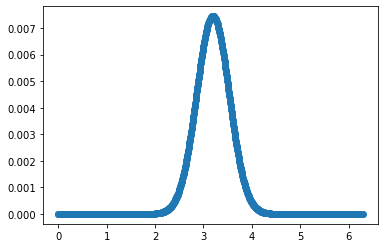

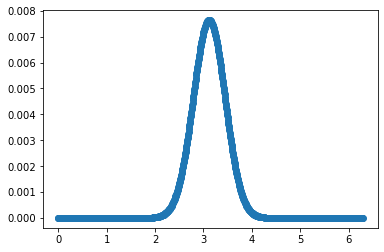

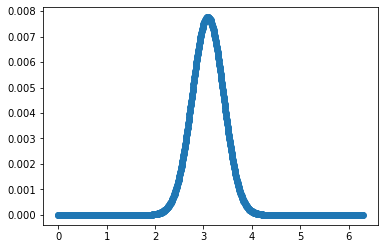

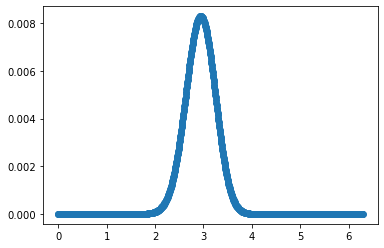

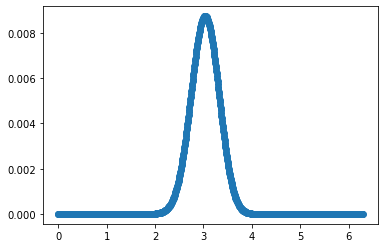

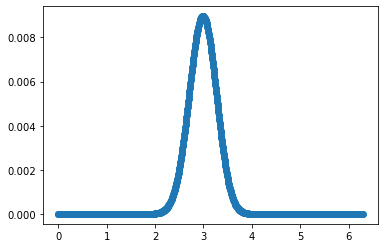

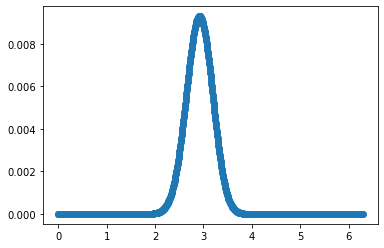

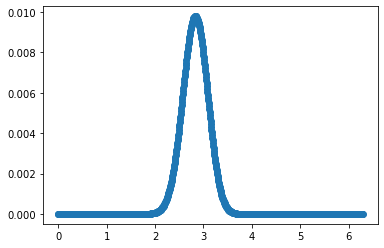

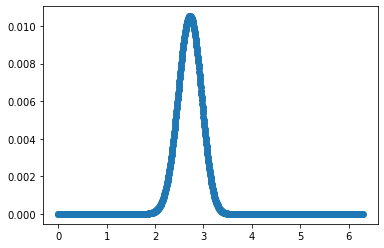

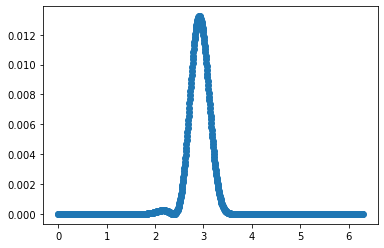

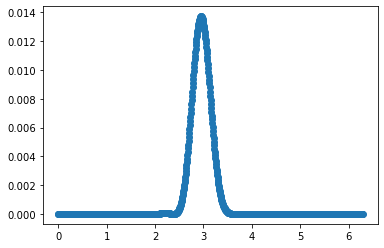

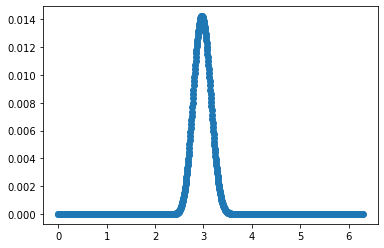

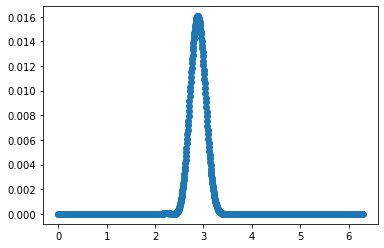

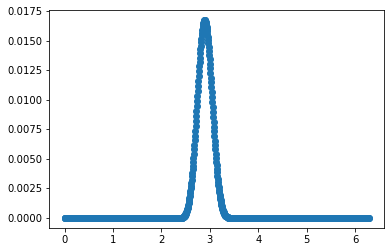

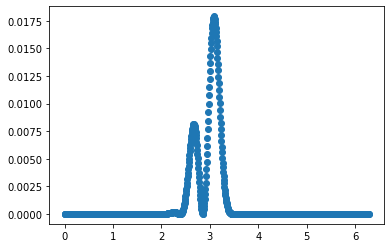

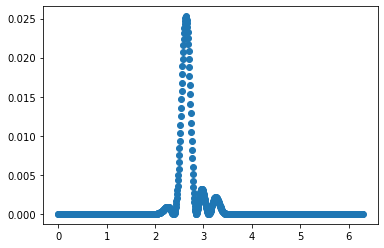

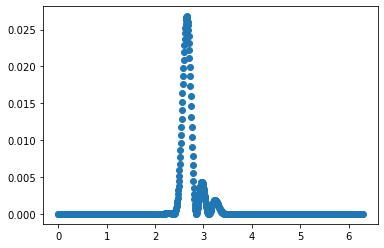

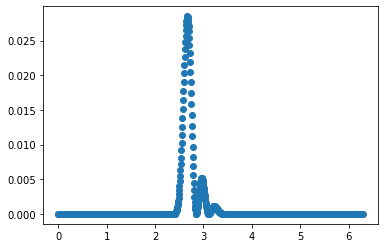

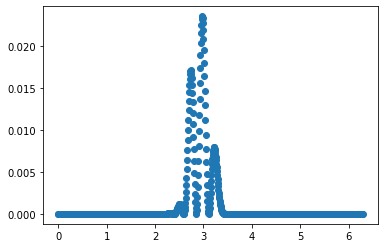

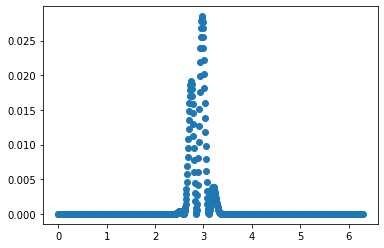

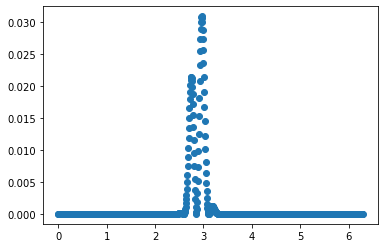

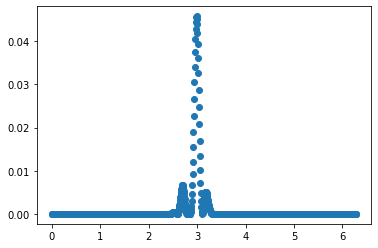

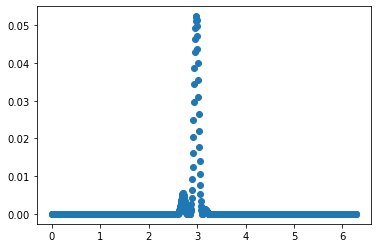

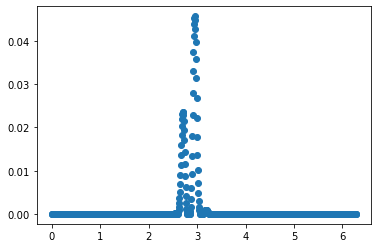

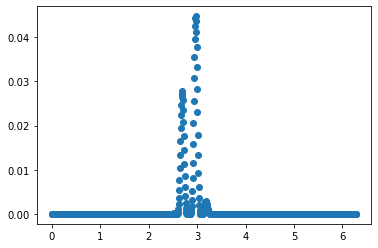

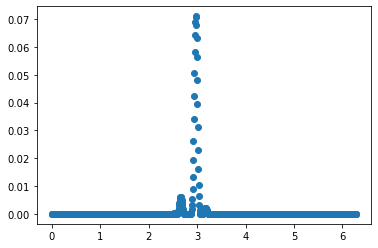

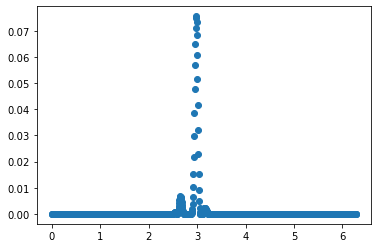

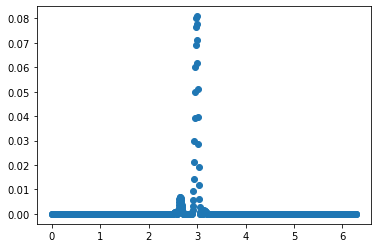

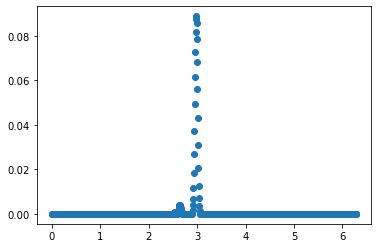

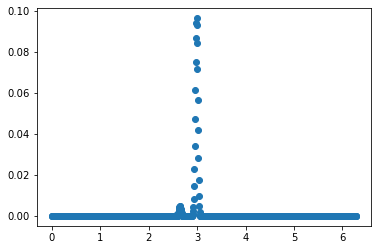

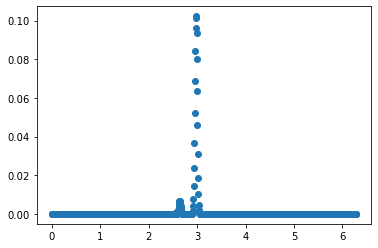

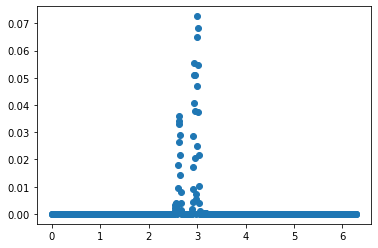

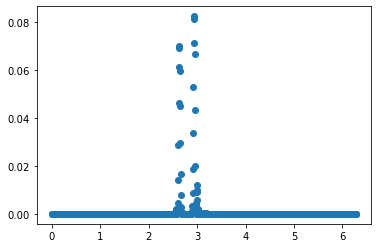

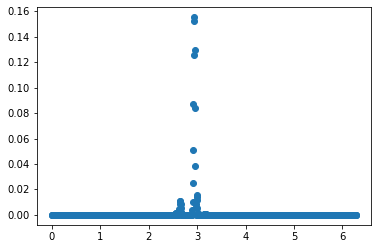

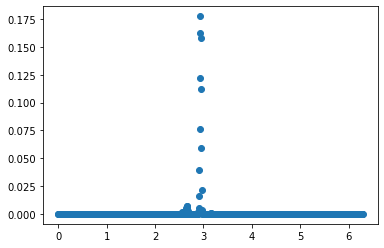

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:03<00:00,  6.16s/it]


In [26]:
for i in tqdm(range(20)): # outer loop for different experiments
    
    t0 = 0.1
    omega_star = np.random.uniform() * 2 * np.pi
    smc = phase_est_smc(omega_star, t0)
    smc.init_particles(num_particles)
    
    for i in range(50): # inner loop are updates for a single experiment

        particle_pos, particle_wgts = smc.update(threshold=num_particles/5, num_measurements=1)
        data = np.random.choice(particle_pos, size = 10000, p=particle_wgts)
        bins, edges_ = np.histogram(data, num_bins)
        bins = bins/num_data
        
        train_data = np.append(train_data, [bins], axis=0)
        train_edges = np.append(train_edges, [edges_], axis =0)
        
        plt.scatter(particle_pos, particle_wgts)
        plt.show()
        
#         edge_width = edges_[1] - edges_[0]
#         edges_plot = edges_[:-1]
#         plt.bar(edges_plot, bins, align='edge', width=edge_width)
#         plt.show()

        smc.update_t(factor=9/8)

In [27]:
np.save("train_data.npy", train_data)
np.save("train_edges.npy", train_edges)